# Machine learning project

**Содержание**

1. [Definition](#definition)
2. [Анализ данных](#data_analysis)
3. [Функции для обработки данных](#functions)
4. [Визуализация данных и анализ](#visualization)
5. [Создание и применение модели](#models)
6. [Выводы](#conclusions)

## 1. Definition <a class='anchor' id='definition'>

### Метрики

В качестве метрики для прокта принята R2_score

### Выбор модели

После анализа Cat Boost был выбран в качестве основной модели для получения предсказаний

### Импорт модулей

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, RepeatedKFold

In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [10]:
from random import randint, random

In [11]:
# garbage collector
import gc 

In [12]:
from catboost import CatBoostRegressor

In [13]:
import xgboost

## 2. Анализ данных <a class='anchor' id='data_analysis'>

Датасет, который был использован в данном проекте был взят по следующему адресу:
https://www.kaggle.com/c/realestatepriceprediction/data

Колонка Id может быть использована в качестве индекса при построении датафрэйма.

In [14]:
df = pd.read_csv("train.csv", index_col='Id' )
df_target = 'Price'

In [15]:
df.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

#### Признаки
- Id - идентификационный номер квартиры
- DistrictId - идентификационный номер района
- Rooms - количество комнат
- Square - площадь
- LifeSquare - жилая площадь
- KitchenSquare - площадь кухни
- Floor - этаж
- HouseFloor - количество этажей в доме
- HouseYear - год постройки дома
- Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
- Social_1, Social_2, Social_3 - социальные показатели местности
- Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
- Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
- Price - цена квартиры

In [16]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [17]:
df.shape

(10000, 19)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01
Social_1,10000.0,24.687000,17.532614,0.000000,6.000000,25.000000,36.000000,7.400000e+01


У большинства полей наблюдаются выбросы.

Распределение целевой переменной:

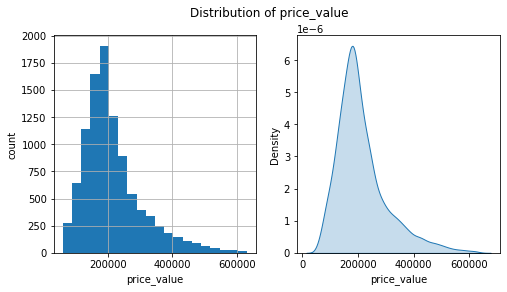

In [19]:
plt.figure(figsize = (8, 4))

plt.subplot(121)
df['Price'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('price_value')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('price_value')

plt.suptitle('Distribution of price_value')
plt.show()

In [20]:
df['Price'].describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

Распределение целевой переменной по форме достаточно близко к нормальному, но со смещением.
Дополнительная обработка целевой переменной не требуется.

### Колонки с null 

In [21]:
df.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

'LifeSquare' and 'Healthcare_1' содержат null значения.

Процент null значений для 'LifeSquare' равен 21.13, для  Healthcare_1 равен 47.98.

#### Колонки с аномалиями и выбросами.

Kitchen Square или Life Square больше Square 

In [22]:
df[(df['KitchenSquare'] > df['Square']) | (df['LifeSquare'] > df['Square'])]['Square'].count()

486

Количество строк, где этаж квартиры больше, чем этаж дома.

In [23]:
df[df['Floor'] > df['HouseFloor']]['Floor'].count()

1825

#### Категориальные переменные

Категориальные переменные в текущем датасете:
- Ecology_2 
- Ecology_3
- Shops_2 

Также, потенциально, к категориальным переменным могут быть отнесены 'DistrictId', 'HouseFloor' и 'Floor'

In [24]:
df.select_dtypes(include=['object', 'category']).nunique()

Ecology_2    2
Ecology_3    2
Shops_2      2
dtype: int64

## 3. Функции для обработки данных <a class='anchor' id='functions'>

В данном разделе содержаться функции для обработки данных.

In [25]:
def evaluate_preds(true_values, pred_values, save=False):
    """Evaluation of model quality preds vs true"""
    
    print("R2:\t" + str(round(r2_score(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mean_squared_error(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mean_squared_error(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # line where true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

In [26]:
class Data_preprocessing():
    def __init__(self):
        # Treshold values.
        self.min_rooms_trsh = 1
        self.max_rooms_trsh = 5
        
        self.min_sq_trsh = 20
        self.max_sq_trsh = 300
        
        self.min_kitchen_trsh = 3        
        self.max_kitchen_trsh = 100
        
        self.min_ls_trsh = 5
        self.max_ls_trsh = 250
        
        self.extra_square = 3 #probably, betterr to exclude....
        
        #median values intializing
        self.kc_median = None
        self.ls_median = None
        self.yr_median = None
        self.hf_median = None
        self.rm_median = None
        
        #temporary dataframes for validation processing
        df_prices_district = None
        
        #functions that transforms dataset and add new data
    def median_calculation(self, dfr):
        """Function calculates median values and then these values can be used for gaps filling"""
        # all changes for dataframe in this function were made according to feature analysis in section 4
        # median values for dataframes. Median values will be used for data preprocessing and gaps filling.
        self.kc_median = dfr['KitchenSquare'].median()
        self.ls_median = dfr['LifeSquare'].median()
        self.yr_median = dfr['HouseYear'].median()
        self.hf_median = dfr['HouseFloor'].median()
        self.rm_median = dfr['Rooms'].median()
    
    
    def add_features(self, dfr):
        """Adds some new features"""
        # Average square per room in each appartment
        dfr = self.apprtmnt_amr_per_district(self, dfr)

        return dfr
    


    def data_clearing (self, dfr):
        """function is need to dataset processing and clearing of data"""  
        
        
        # Rooms
        dfr.loc[dfr['Rooms'] < self.min_rooms_trsh, 'Rooms'] = self.min_rooms_trsh
        dfr.loc[dfr['Rooms'] > self.max_rooms_trsh, 'Rooms'] = self.max_rooms_trsh 
        #self.rm_median #or can be set to 5? Change condition to 5 too?
        
        
        #General square
        dfr.loc[dfr['Square'] < self.min_sq_trsh, 'Square'] = self.min_sq_trsh
        dfr.loc[dfr['Square'] > self.max_sq_trsh, 'Square'] = self.max_sq_trsh 
        
        
        #life Square
        dfr = self.null_populating_ls(self,dfr)
        dfr.loc[dfr['LifeSquare'] < self.min_ls_trsh, 'LifeSquare'] = self.min_ls_trsh
        dfr.loc[dfr['LifeSquare'] > self.max_ls_trsh, 'LifeSquare'] = self.max_ls_trsh
        
        
    
        #Kitchen square
        dfr.loc[dfr['KitchenSquare'] < self.min_kitchen_trsh, 'KitchenSquare'] = self.min_kitchen_trsh
        dfr.loc[dfr['KitchenSquare'] > self.max_kitchen_trsh, 'KitchenSquare'] = self.min_kitchen_trsh #self.kc_median
        #dfr.loc[dfr['KitchenSquare'] > dfr['Square'], 'KitchenSquare'] = self.kc_median # ????????????????????????????
    
        
        #House Floor and Floor        
        dfr.loc[dfr['HouseFloor']==0, 'HouseFloor'] = dfr['Floor'] #or would be better to 1?
        dfr.loc[(dfr['Floor'] > dfr['HouseFloor']), 'Floor'] = round(dfr['HouseFloor'] * random(), 0)
    
        #House Year
        dfr.loc[dfr['HouseYear'] > 2021, 'HouseYear'] = self.yr_median
        
        
        #Healthcare_1
        dfr =  self.null_populating_hc(self, dfr)
    
        #district_id
        dfr = self.district_id_processing(self, dfr)
        
        
        return dfr
    
    
    @staticmethod
    def null_populating_ls(self, dfr, action = 'm'):
        """Fill null values for LifeSquare"""
        #LifeSquare
        #comparing_condition = ((dfr['LifeSquare'].isnull())) | (dfr['LifeSquare'] > (dfr['Square'] - dfr['KitchenSquare'])))
        #dfr.loc[comparing_condition, 'LifeSquare'] = \
        #dfr.loc[comparing_condition, 'Square'] - dfr.loc[comparing_condition, 'KitchenSquare'] - self.extra_square
        dfr['LifeSquare'] = dfr['LifeSquare'].fillna(self.ls_median)
        # or populating by median value for district id
        #Avg_life_sq_per_district = dfr.groupby(['DistrictId'], as_index = False).agg({'LifeSquare':'median'})
        
        
        return dfr
    
  

    @staticmethod
    def null_populating_hc(self, dfr, action = 'm'):
        """Function will populate null values for Healthcare_1 in dataframe based on accepted descision"""
        #Healthcare_1
        if 'Healthcare_1' in dfr.columns:
            if action == 'd':
                dfr = dfr.drop('Healthcare_1', axis = 1)
            elif action == 'm':
                healthcare_per_district = dfr.groupby(['DistrictId'], as_index = False).agg({'Healthcare_1':'median'})                
                healthcare_per_district = healthcare_per_district.rename(columns={'Healthcare_1':'hl_pd'})
                
                idx = dfr.index
                dfr = dfr.merge(healthcare_per_district, how = 'left', on='DistrictId')
                dfr = dfr.set_index(idx)
                
                #dfr['hl_pd'] = pd.to_numeric(dfr['hl_pd']downcast='float')
                
                #fill na if after merge we will have any gaps
                if dfr['Healthcare_1'].isnull().sum() != 0:
                    dfr['Healthcare_1'] = dfr.fillna(dfr['hl_pd'].median())
                    dfr['hl_pd'] = dfr.fillna(dfr['hl_pd'].median())
        
        dfr['Healthcare_1'] = dfr['Healthcare_1'].astype('int8')
        dfr['hl_pd'] = dfr['hl_pd'].astype('float32')
        return dfr

    


       
    @staticmethod
    def district_id_processing(self, dfr):
        """Function converts DistrictId to AvgPrice per district. In case of validation dataset uses Price 
            from train dataset.
        """
        if 'Price' in dfr.columns:
            self.df_prices_district = dfr[['Price', 'DistrictId']].copy()
            self.df_prices_district['Avg_Price_per_district'] = round(\
                                                         self.df_prices_district.groupby('DistrictId')['Price']\
                                                         .transform('mean'), 0)
            self.df_prices_district = self.df_prices_district.drop('Price', axis = 1)
            dfr = dfr.merge(self.df_prices_district['Avg_Price_per_district'], how = 'left', left_index=True, right_index=True)
            self.distric_price_median = self.df_prices_district['Avg_Price_per_district'].median()
                        
        else:
            df_prices_distinct = self.df_prices_district.drop_duplicates('DistrictId')
            idx = dfr.index
            dfr = dfr.merge(df_prices_distinct, how = 'left', on='DistrictId')
            dfr = dfr.set_index(idx)
            if dfr['Avg_Price_per_district'].isnull().sum() != 0:
                dfr = dfr.fillna(self.distric_price_median) #also other mothods like pad can be used
            
        
        return dfr
    
    @staticmethod
    def apprtmnt_amr_per_district(self, dfr):
        """Function calculates amount of flats for each district"""
        idx = dfr.index
        app_amt = dfr.groupby('DistrictId').agg({'DistrictId':'count'})
        app_amt = app_amt.rename(columns={'DistrictId': 'AppCount'}).astype('int')\
                                                        .reset_index()
        dfr = dfr.merge(app_amt, how='left', on='DistrictId')
        dfr = dfr.set_index(idx)
        
        if dfr['AppCount'].isnull().sum() != 0:
               dfr = dfr['AppCount'].fillna(dfr['AppCount'].median()) 
        return dfr
    


## 4. Визуализация данных и препроцессинг <a class='anchor' id='visualization'>

In [27]:
df_fill = df.copy()

In [28]:
df_num_features = df_fill.select_dtypes(include=['float64', 'float32', 'float16', 'int64', 'int32', 'int16', 'int8'])
df_num_features.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644


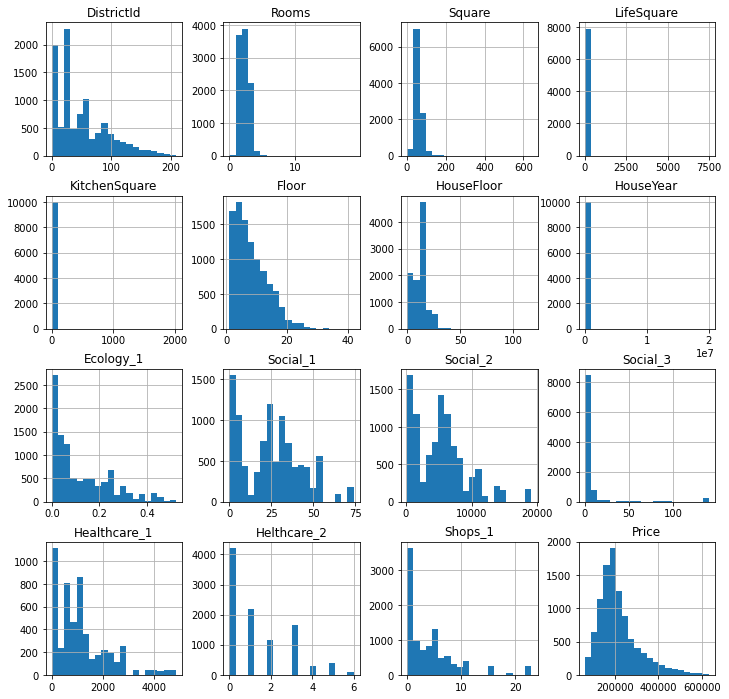

In [29]:
df_num_features.hist(figsize=(12,12), bins=20, grid=True);

### Обработка признаков

**Rooms**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


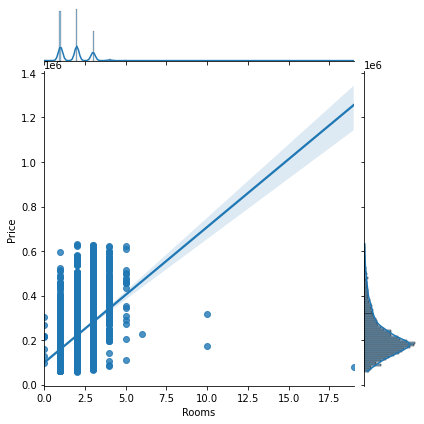

In [30]:
grid = sns.jointplot(df_fill['Rooms'], df_fill['Price'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


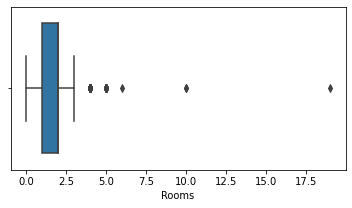

In [31]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['Rooms'])
plt.xlabel('Rooms')
plt.show()

In [32]:
df_fill['Rooms'].describe()

count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64

In [33]:
df_fill['Rooms'].value_counts().sort_values()

6.0        1
19.0       1
10.0       2
0.0        8
5.0       18
4.0      150
3.0     2235
1.0     3705
2.0     3880
Name: Rooms, dtype: int64

Все параметрыдля комнат, которые эквивалентны 0 будут изменены на 1

Обработка выбросов
   - Все величины меньшие 1 будут преобразованы в 1
   - Все величины больште 5 или 6 будут конвертированы.

**Square**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


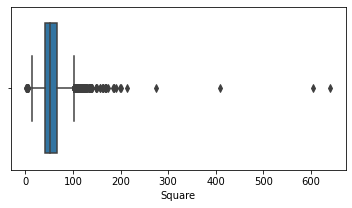

In [34]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['Square'])
plt.xlabel('Square')
plt.show()

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


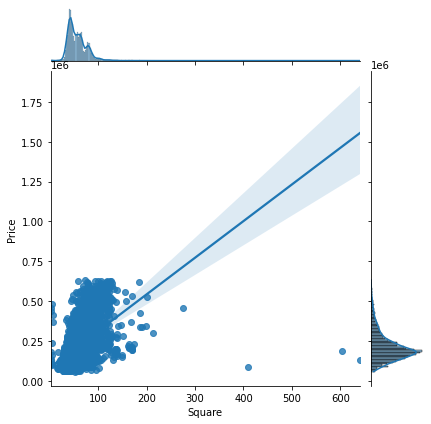

In [35]:
grid = sns.jointplot(df_num_features['Square'], df_num_features['Price'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

In [36]:
df_num_features[df_num_features['Square'] < 20].count()

DistrictId       21
Rooms            21
Square           21
LifeSquare       20
KitchenSquare    21
Floor            21
HouseFloor       21
HouseYear        21
Ecology_1        21
Social_1         21
Social_2         21
Social_3         21
Healthcare_1     10
Helthcare_2      21
Shops_1          21
Price            21
dtype: int64

**Life square**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


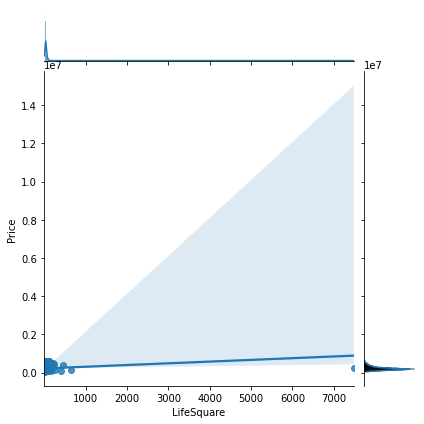

In [37]:
grid = sns.jointplot(df_num_features['LifeSquare'], df_num_features['Price'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


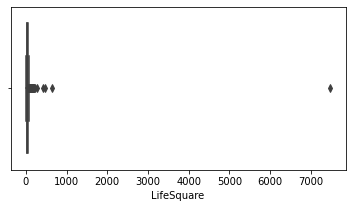

In [38]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_num_features['LifeSquare'])
plt.xlabel('LifeSquare')
plt.show()

In [39]:
df_num_features = df_num_features[df_num_features['LifeSquare'] < 250]

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


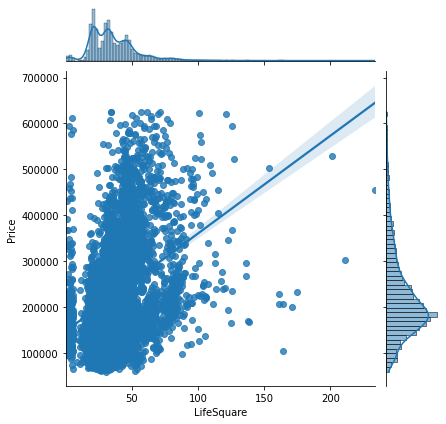

In [40]:
grid = sns.jointplot(df_num_features['LifeSquare'], df_num_features['Price'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


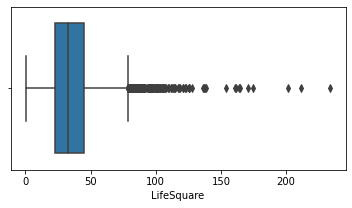

In [41]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_num_features['LifeSquare'])
plt.xlabel('LifeSquare')
plt.show()

In [42]:
df_num_features[df_num_features['LifeSquare'] < 5].count()

DistrictId       162
Rooms            162
Square           162
LifeSquare       162
KitchenSquare    162
Floor            162
HouseFloor       162
HouseYear        162
Ecology_1        162
Social_1         162
Social_2         162
Social_3         162
Healthcare_1      76
Helthcare_2      162
Shops_1          162
Price            162
dtype: int64

In [43]:
df_fill['LifeSquare'].isnull().sum()

2113

In [44]:
df_fill[df_fill['LifeSquare'] > df_fill['Square']]['LifeSquare'].count()

482

In [45]:
df_fill[df_fill['LifeSquare'] == 0]['LifeSquare'].count()

0

Обработка выбросов:
- Если LifeSquare = NaN или LifeSquare > Square, тогда LifeSquare будет изменена на медианные значения.

**Kitchen Square**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


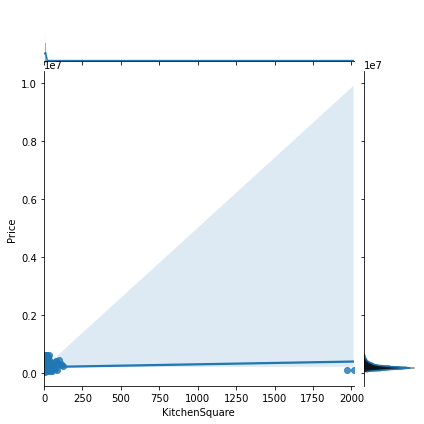

In [46]:
grid = sns.jointplot(df_fill['KitchenSquare'], df_fill['Price'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


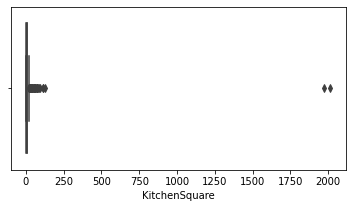

In [47]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['KitchenSquare'])
plt.xlabel('KitchenSquare')
plt.show()

In [48]:
# df_fill['KitchenSquare'].value_counts().sort_values()
df_fill['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [49]:
df_fill[(df['KitchenSquare'] > 80)]['KitchenSquare'].count()

7

In [50]:
df_fill[(df['KitchenSquare'] > df_fill['LifeSquare'])]['KitchenSquare'].count()

23

Обработка выбросов:
- если Kitchen square > 100 она будет преобразована в медианное значение
- если Kitchen square < 3 будет преобразована в 3
- если Kitchen square > general square она будет преобразорвана

**Floor and house floor**

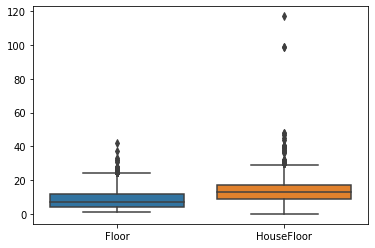

In [51]:
ax = sns.boxplot(data = df_fill[['Floor', 'HouseFloor']]                )
plt.show()

In [52]:
df_fill[df_fill['Floor'] == 0]['Floor'].count()

0

In [53]:
df_fill[df_fill['HouseFloor'] == 0]['HouseFloor'].count()

269

In [54]:
df_fill[(df_fill['HouseFloor'] < df_fill['Floor']) ]['Floor'].count()

1825

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


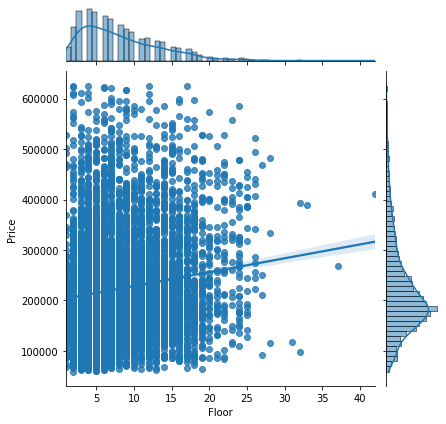

In [55]:
grid = sns.jointplot(df_num_features['Floor'], df_num_features['Price'], kind='reg')
grid.fig.set_figwidth(6)
grid.fig.set_figheight(6)

In [56]:
df_num_features['Floor'][df_num_features['Floor'] == 0].count()

0

In [57]:
df_num_features['HouseFloor'][df_num_features['HouseFloor'] == 0].count()

54

In [58]:
df_num_features['HouseFloor'][df_num_features['Floor'] > df_num_features['HouseFloor']].count()

1208

Обработка выбросов
- Если HouseFloor == 0, оно будет изменено на Floor (или не медианное значение по датасету - в зависимости от финального значение)
- Если Floor > HouseFloor, величина будет изменена на случайное значение в пределах этажности дома

**HouseYear**

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


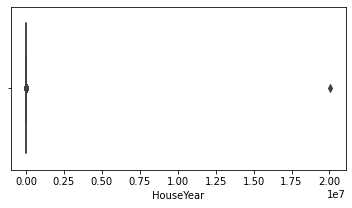

In [59]:
plt.figure(figsize=(6, 3))
sns.boxplot(df_fill['HouseYear'])
plt.xlabel('HouseYear')
plt.show()

In [60]:
df_fill[df_fill['HouseYear'] == 0]['HouseYear'].count()

0

In [61]:
df_fill[df_fill['HouseYear'] < 1900]['HouseYear'].count()

0

In [62]:
df_fill[df_fill['HouseYear'] > 2021]['HouseYear'].count()

2

Обработка выбросов:
- Если year > 2021 оно будет изменено на медианное значение по датасету

**Healthcare_1**

Из-за большого количества NaN величин оно может быть удалено или заменено на среднее значение по датасету.

In [63]:
df_fill.shape

(10000, 19)

In [64]:
df_fill.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Сохранение датафрэйма в пикл файл.

In [65]:
df_fill.to_pickle("D:/Learning/GeekBrains/numpy and pandas/df_fill.pkl")

In [66]:
#df_fill = pd.read_pickle("D:/Learning/GeekBrains/numpy and pandas/df_fill.pkl")

### Обработка категориальных значений

В изначальном датасете содержатся три категориальных величины:
- Ecology_2
- Ecology_3
- Shops_2

Каждая из колонок имеет два возможных значения.

In [67]:
df_cat_features = df_fill.select_dtypes(include=['object', 'category'])

In [68]:
df_cat_features.head()

,Ecology_2,Ecology_3,Shops_2
Id,,,
14038,B,B,B
15053,B,B,B
4765,B,B,B
5809,B,B,B
10783,B,B,B


<ipython-input-69-e8200df81e79>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


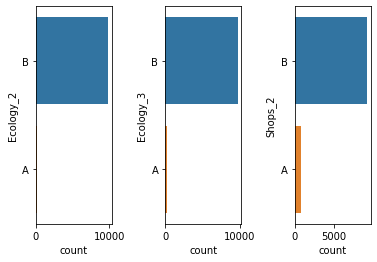

In [69]:
fig, ax =plt.subplots(1,3)
fig.subplots_adjust(wspace=0.7, hspace=0.7)
sns.countplot(y = 'Ecology_2',data = df_cat_features, ax=ax[0])
sns.countplot(y = 'Ecology_3',data = df_cat_features, ax=ax[1])
sns.countplot(y = 'Shops_2',data = df_cat_features, ax=ax[2])
fig.show()

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


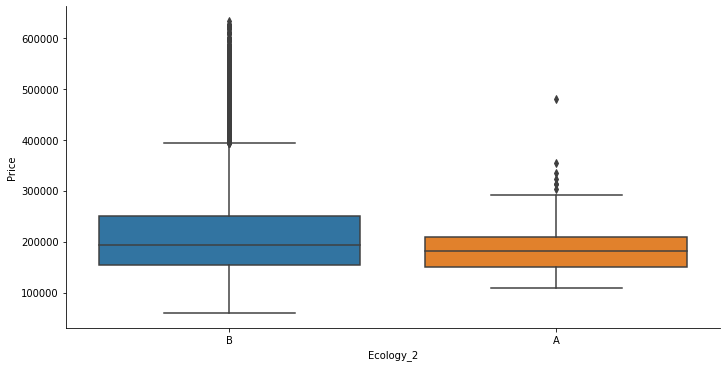

In [70]:
sns.catplot('Ecology_2', 'Price', kind="box", data=df_fill, aspect=2/1);

In [71]:
df_cat_features['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

Категориальные величины будут конвертированы в числовые используя get_dummies метод.


In [72]:
df_fill.to_pickle("D:/Learning/GeekBrains/numpy and pandas/df_fill_processed.pkl")

In [86]:
df_fill = pd.read_pickle("D:/Learning/GeekBrains/numpy and pandas/df_fill_processed.pkl")

# 5. Создание и применение моделей <a class='anchor' id='models'>

Обработка тренировочного датасета

In [66]:
dp = Data_preprocessing()

In [67]:
dp.median_calculation(df_fill)

In [68]:
df_fill = dp.data_clearing(df_fill)

In [69]:
df_fill = dp.add_features(df_fill)

In [70]:
df_fill.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,hl_pd,Avg_Price_per_district,AppCount
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,B,...,7976,5,35,0,11,B,184966.930730,35.0,219720.0,22
15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,B,...,10309,1,41,1,16,B,300009.450063,41.0,225919.0,87
4765,53,2.0,44.947953,29.197612,3.0,8.0,12.0,1968.0,0.049637,B,...,7759,0,53,1,3,B,220925.908524,53.0,255736.0,174
5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,B,...,5735,3,58,0,5,B,175616.227217,58.0,162287.0,179
10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,B,...,5776,1,99,2,4,B,150226.531644,99.0,184157.0,97


In [71]:
df_fill = df_fill.drop('DistrictId', axis = 1)

In [72]:
df_fill = df_fill.drop('hl_pd', axis = 1)

In [73]:
# df_fill = pd.get_dummies(df_fill, columns = df_cat_features.columns)

In [74]:
df_fill.shape

(10000, 20)

**Импорт и обработка проверочного датасета**

In [75]:
df_real_cb = pd.read_csv("test.csv", index_col='Id')

In [76]:
df_real_cb = dp.data_clearing (df_real_cb)

In [77]:
df_real_cb = dp.add_features(df_real_cb)

In [78]:
df_real_cb = df_real_cb.drop('DistrictId', axis = 1)

In [79]:
df_real_cb = df_real_cb.drop('hl_pd', axis = 1)

In [80]:
# df_real_cb = pd.get_dummies(df_real_cb, columns = df_cat_features.columns)

In [81]:
df_real_cb.shape

(5000, 19)

## CatBoost

**Подготовка тернировочного датасета**

In [82]:
X_cb = df_fill.copy()

In [83]:
y_cb = X_cb['Price']

In [84]:
X_cb = X_cb.drop('Price', axis = 1)

In [85]:
X_cb.columns == df_real_cb.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

**Выбор параметров дл я применения в модели**

In [86]:
model_cb = CatBoostRegressor(iterations = 1190
                             , depth = 8
                             , learning_rate = 0.1                             
                             , eval_metric = 'R2')

In [87]:
k_fold = KFold(n_splits=5
               , random_state=42
               , shuffle=True)

In [88]:
cv_score = cross_val_score(model_cb, X_cb, y_cb, scoring='r2', cv=k_fold, verbose = 0)

c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "_catboost.pyx", line 1980, in _catboost.get_float_feature
  File "_catboost.pyx", line 1085, in _catboost._FloatOrNan
  File "_catboost.pyx", line 917, in _catboost._FloatOrNanFromString
TypeError: Cannot convert 'b'B'' to float

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\пк\appdata\local\programs\python\python39\lib\site-packages\catboost\core.py", line 4849, in fit
    return self._fit(X, y, cat_features, None, None, None, sample_weig

In [111]:
print('R2: {:.5f}'.format(cv_score.mean()))

R2: 0.75867


In [90]:
index_no = []
index_no.append(X_cb.columns.get_loc('Ecology_2'))
index_no.append(X_cb.columns.get_loc('Ecology_3'))
index_no.append(X_cb.columns.get_loc('Shops_2'))

In [91]:
index_no.sort()

In [92]:
model_cb.fit(X_cb, y_cb, cat_features = index_no)

0:	learn: 0.1188362	total: 169ms	remaining: 3m 21s
1:	learn: 0.2192478	total: 178ms	remaining: 1m 45s
2:	learn: 0.2990559	total: 186ms	remaining: 1m 13s
3:	learn: 0.3668505	total: 193ms	remaining: 57.3s
4:	learn: 0.4209402	total: 201ms	remaining: 47.6s
5:	learn: 0.4685631	total: 208ms	remaining: 41.1s
6:	learn: 0.5103996	total: 215ms	remaining: 36.4s
7:	learn: 0.5452153	total: 223ms	remaining: 32.9s
8:	learn: 0.5738046	total: 230ms	remaining: 30.2s
9:	learn: 0.5978806	total: 237ms	remaining: 28s
10:	learn: 0.6179778	total: 245ms	remaining: 26.2s
11:	learn: 0.6353356	total: 252ms	remaining: 24.7s
12:	learn: 0.6509267	total: 259ms	remaining: 23.4s
13:	learn: 0.6651338	total: 266ms	remaining: 22.4s
14:	learn: 0.6765417	total: 274ms	remaining: 21.4s
15:	learn: 0.6862464	total: 281ms	remaining: 20.6s
16:	learn: 0.6935761	total: 288ms	remaining: 19.9s
17:	learn: 0.7004847	total: 295ms	remaining: 19.2s
18:	learn: 0.7086018	total: 302ms	remaining: 18.6s
19:	learn: 0.7150093	total: 310ms	remain

162:	learn: 0.8578220	total: 1.48s	remaining: 9.32s
163:	learn: 0.8581712	total: 1.49s	remaining: 9.32s
164:	learn: 0.8585874	total: 1.5s	remaining: 9.31s
165:	learn: 0.8586395	total: 1.51s	remaining: 9.3s
166:	learn: 0.8586882	total: 1.51s	remaining: 9.28s
167:	learn: 0.8589417	total: 1.52s	remaining: 9.27s
168:	learn: 0.8593305	total: 1.53s	remaining: 9.27s
169:	learn: 0.8596201	total: 1.54s	remaining: 9.26s
170:	learn: 0.8599302	total: 1.55s	remaining: 9.25s
171:	learn: 0.8602126	total: 1.56s	remaining: 9.24s
172:	learn: 0.8604784	total: 1.57s	remaining: 9.23s
173:	learn: 0.8608635	total: 1.58s	remaining: 9.22s
174:	learn: 0.8616181	total: 1.59s	remaining: 9.21s
175:	learn: 0.8622665	total: 1.6s	remaining: 9.21s
176:	learn: 0.8625962	total: 1.61s	remaining: 9.19s
177:	learn: 0.8629795	total: 1.61s	remaining: 9.18s
178:	learn: 0.8633716	total: 1.62s	remaining: 9.17s
179:	learn: 0.8637414	total: 1.63s	remaining: 9.16s
180:	learn: 0.8639467	total: 1.64s	remaining: 9.15s
181:	learn: 0.8

338:	learn: 0.9023518	total: 2.93s	remaining: 7.35s
339:	learn: 0.9025066	total: 2.94s	remaining: 7.34s
340:	learn: 0.9027875	total: 2.95s	remaining: 7.34s
341:	learn: 0.9028462	total: 2.96s	remaining: 7.33s
342:	learn: 0.9029086	total: 2.97s	remaining: 7.33s
343:	learn: 0.9031975	total: 2.97s	remaining: 7.31s
344:	learn: 0.9032971	total: 2.98s	remaining: 7.3s
345:	learn: 0.9034873	total: 2.99s	remaining: 7.3s
346:	learn: 0.9036674	total: 3s	remaining: 7.29s
347:	learn: 0.9040240	total: 3.01s	remaining: 7.27s
348:	learn: 0.9041738	total: 3.01s	remaining: 7.26s
349:	learn: 0.9043645	total: 3.02s	remaining: 7.25s
350:	learn: 0.9044315	total: 3.03s	remaining: 7.24s
351:	learn: 0.9046440	total: 3.04s	remaining: 7.22s
352:	learn: 0.9048711	total: 3.04s	remaining: 7.21s
353:	learn: 0.9050046	total: 3.05s	remaining: 7.2s
354:	learn: 0.9051744	total: 3.06s	remaining: 7.19s
355:	learn: 0.9053166	total: 3.06s	remaining: 7.18s
356:	learn: 0.9054370	total: 3.07s	remaining: 7.17s
357:	learn: 0.9056

518:	learn: 0.9281967	total: 4.41s	remaining: 5.71s
519:	learn: 0.9283078	total: 4.42s	remaining: 5.7s
520:	learn: 0.9284093	total: 4.43s	remaining: 5.69s
521:	learn: 0.9285177	total: 4.44s	remaining: 5.68s
522:	learn: 0.9286475	total: 4.45s	remaining: 5.67s
523:	learn: 0.9286993	total: 4.46s	remaining: 5.66s
524:	learn: 0.9287683	total: 4.46s	remaining: 5.65s
525:	learn: 0.9288954	total: 4.47s	remaining: 5.64s
526:	learn: 0.9289399	total: 4.48s	remaining: 5.63s
527:	learn: 0.9290081	total: 4.49s	remaining: 5.63s
528:	learn: 0.9290538	total: 4.49s	remaining: 5.62s
529:	learn: 0.9291184	total: 4.5s	remaining: 5.6s
530:	learn: 0.9293104	total: 4.51s	remaining: 5.59s
531:	learn: 0.9294054	total: 4.51s	remaining: 5.58s
532:	learn: 0.9295870	total: 4.52s	remaining: 5.57s
533:	learn: 0.9296738	total: 4.53s	remaining: 5.56s
534:	learn: 0.9298385	total: 4.54s	remaining: 5.55s
535:	learn: 0.9299090	total: 4.54s	remaining: 5.54s
536:	learn: 0.9300308	total: 4.55s	remaining: 5.53s
537:	learn: 0.9

697:	learn: 0.9435905	total: 5.89s	remaining: 4.15s
698:	learn: 0.9436611	total: 5.9s	remaining: 4.14s
699:	learn: 0.9437569	total: 5.91s	remaining: 4.14s
700:	learn: 0.9438505	total: 5.92s	remaining: 4.13s
701:	learn: 0.9439145	total: 5.93s	remaining: 4.12s
702:	learn: 0.9439900	total: 5.94s	remaining: 4.11s
703:	learn: 0.9440498	total: 5.95s	remaining: 4.1s
704:	learn: 0.9441559	total: 5.95s	remaining: 4.09s
705:	learn: 0.9441925	total: 5.96s	remaining: 4.09s
706:	learn: 0.9442453	total: 5.97s	remaining: 4.08s
707:	learn: 0.9443279	total: 5.97s	remaining: 4.07s
708:	learn: 0.9443637	total: 5.98s	remaining: 4.06s
709:	learn: 0.9444460	total: 5.99s	remaining: 4.05s
710:	learn: 0.9445286	total: 6s	remaining: 4.04s
711:	learn: 0.9445850	total: 6s	remaining: 4.03s
712:	learn: 0.9446475	total: 6.01s	remaining: 4.02s
713:	learn: 0.9446703	total: 6.02s	remaining: 4.01s
714:	learn: 0.9447406	total: 6.03s	remaining: 4s
715:	learn: 0.9448559	total: 6.03s	remaining: 3.99s
716:	learn: 0.9449851	t

860:	learn: 0.9539580	total: 7.44s	remaining: 2.84s
861:	learn: 0.9540435	total: 7.45s	remaining: 2.83s
862:	learn: 0.9541643	total: 7.46s	remaining: 2.83s
863:	learn: 0.9542396	total: 7.47s	remaining: 2.82s
864:	learn: 0.9543078	total: 7.48s	remaining: 2.81s
865:	learn: 0.9543609	total: 7.49s	remaining: 2.8s
866:	learn: 0.9544164	total: 7.5s	remaining: 2.79s
867:	learn: 0.9544799	total: 7.51s	remaining: 2.79s
868:	learn: 0.9545677	total: 7.51s	remaining: 2.78s
869:	learn: 0.9546083	total: 7.52s	remaining: 2.77s
870:	learn: 0.9546366	total: 7.53s	remaining: 2.76s
871:	learn: 0.9546596	total: 7.54s	remaining: 2.75s
872:	learn: 0.9547608	total: 7.55s	remaining: 2.74s
873:	learn: 0.9548287	total: 7.55s	remaining: 2.73s
874:	learn: 0.9548842	total: 7.56s	remaining: 2.72s
875:	learn: 0.9549757	total: 7.57s	remaining: 2.71s
876:	learn: 0.9550490	total: 7.58s	remaining: 2.7s
877:	learn: 0.9551175	total: 7.58s	remaining: 2.69s
878:	learn: 0.9551600	total: 7.59s	remaining: 2.69s
879:	learn: 0.9

1027:	learn: 0.9617157	total: 8.96s	remaining: 1.41s
1028:	learn: 0.9617638	total: 8.97s	remaining: 1.4s
1029:	learn: 0.9618201	total: 8.98s	remaining: 1.39s
1030:	learn: 0.9618827	total: 8.99s	remaining: 1.39s
1031:	learn: 0.9619258	total: 9s	remaining: 1.38s
1032:	learn: 0.9620014	total: 9.01s	remaining: 1.37s
1033:	learn: 0.9620422	total: 9.02s	remaining: 1.36s
1034:	learn: 0.9621161	total: 9.03s	remaining: 1.35s
1035:	learn: 0.9621543	total: 9.04s	remaining: 1.34s
1036:	learn: 0.9621936	total: 9.05s	remaining: 1.33s
1037:	learn: 0.9622490	total: 9.06s	remaining: 1.33s
1038:	learn: 0.9622766	total: 9.06s	remaining: 1.32s
1039:	learn: 0.9622974	total: 9.07s	remaining: 1.31s
1040:	learn: 0.9623525	total: 9.08s	remaining: 1.3s
1041:	learn: 0.9623926	total: 9.09s	remaining: 1.29s
1042:	learn: 0.9624119	total: 9.1s	remaining: 1.28s
1043:	learn: 0.9624518	total: 9.1s	remaining: 1.27s
1044:	learn: 0.9625180	total: 9.11s	remaining: 1.26s
1045:	learn: 0.9625512	total: 9.12s	remaining: 1.25s


1186:	learn: 0.9677570	total: 10.5s	remaining: 26.5ms
1187:	learn: 0.9677614	total: 10.5s	remaining: 17.6ms
1188:	learn: 0.9677993	total: 10.5s	remaining: 8.83ms
1189:	learn: 0.9678396	total: 10.5s	remaining: 0us


In [93]:
y_pred_train_cb = model_cb.predict(X_cb)

In [94]:
cb_r2_full_score = r2_score(y_pred_train_cb, y_cb)
cb_r2_full_score

0.9647387911909188

**Важность признаков**

In [95]:
feature_importances_df = pd.DataFrame(zip(X_cb.columns, 
                                           model_cb.feature_importances_), 
                                           columns=['feature_name', 'importance'])

feature_importances_df.sort_values(by='importance', ascending=False, inplace=True)

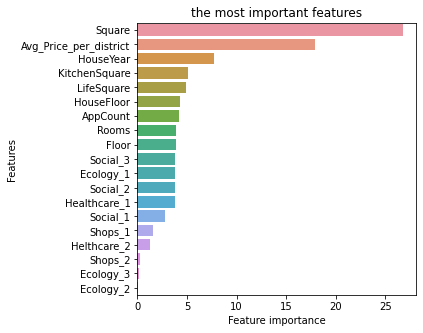

In [96]:
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(y=feature_importances_df.feature_name, x=feature_importances_df.importance)

plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.title("the most important features")
plt.show()

In [97]:
importances = model_cb.feature_importances_

In [98]:
feature = feature_importances_df['feature_name'].tolist()

**Определение R2 в зависимости от использованного набора признаков**

In [99]:
best_tmp_score = 0
best_tmp_list = []
for i in (range(1,len(feature))):
        features = feature[0:i]
        X_tmp = X_cb[features]
        model_cb.fit(X_tmp, y_cb)
        y_tmp_train_cb = model_cb.predict(X_tmp)
        cb_r2_tmp_score = r2_score(y_tmp_train_cb, y_cb)
        if cb_r2_tmp_score > best_tmp_score:
            best_tmp_score = cb_r2_tmp_score
            best_tmp_list = features.copy()

0:	learn: 0.0696931	total: 5.59ms	remaining: 6.65s
1:	learn: 0.1236493	total: 10.5ms	remaining: 6.21s
2:	learn: 0.1698434	total: 15.3ms	remaining: 6.07s
3:	learn: 0.2069917	total: 20.6ms	remaining: 6.12s
4:	learn: 0.2377283	total: 25.8ms	remaining: 6.1s
5:	learn: 0.2623991	total: 31.9ms	remaining: 6.3s
6:	learn: 0.2824865	total: 37.3ms	remaining: 6.29s
7:	learn: 0.2985052	total: 42.5ms	remaining: 6.27s
8:	learn: 0.3121242	total: 47.4ms	remaining: 6.21s
9:	learn: 0.3227872	total: 52.7ms	remaining: 6.22s
10:	learn: 0.3320221	total: 57.7ms	remaining: 6.18s
11:	learn: 0.3393535	total: 63.4ms	remaining: 6.22s
12:	learn: 0.3455271	total: 68.6ms	remaining: 6.21s
13:	learn: 0.3502705	total: 73.7ms	remaining: 6.19s
14:	learn: 0.3544677	total: 78.8ms	remaining: 6.17s
15:	learn: 0.3576093	total: 84.2ms	remaining: 6.18s
16:	learn: 0.3601878	total: 89.4ms	remaining: 6.17s
17:	learn: 0.3632490	total: 94.9ms	remaining: 6.18s
18:	learn: 0.3658044	total: 100ms	remaining: 6.17s
19:	learn: 0.3679769	tota

179:	learn: 0.3887908	total: 898ms	remaining: 5.04s
180:	learn: 0.3888238	total: 903ms	remaining: 5.03s
181:	learn: 0.3888586	total: 908ms	remaining: 5.03s
182:	learn: 0.3889406	total: 913ms	remaining: 5.02s
183:	learn: 0.3889962	total: 919ms	remaining: 5.03s
184:	learn: 0.3890056	total: 924ms	remaining: 5.02s
185:	learn: 0.3890281	total: 929ms	remaining: 5.01s
186:	learn: 0.3890401	total: 934ms	remaining: 5.01s
187:	learn: 0.3890700	total: 939ms	remaining: 5s
188:	learn: 0.3891210	total: 944ms	remaining: 5s
189:	learn: 0.3891676	total: 948ms	remaining: 4.99s
190:	learn: 0.3892079	total: 953ms	remaining: 4.98s
191:	learn: 0.3893012	total: 958ms	remaining: 4.98s
192:	learn: 0.3893622	total: 962ms	remaining: 4.97s
193:	learn: 0.3893906	total: 967ms	remaining: 4.96s
194:	learn: 0.3894064	total: 972ms	remaining: 4.96s
195:	learn: 0.3894411	total: 976ms	remaining: 4.95s
196:	learn: 0.3895012	total: 981ms	remaining: 4.94s
197:	learn: 0.3895147	total: 985ms	remaining: 4.94s
198:	learn: 0.3895

355:	learn: 0.3922344	total: 1.78s	remaining: 4.17s
356:	learn: 0.3922380	total: 1.78s	remaining: 4.17s
357:	learn: 0.3922409	total: 1.79s	remaining: 4.16s
358:	learn: 0.3922525	total: 1.79s	remaining: 4.16s
359:	learn: 0.3922538	total: 1.8s	remaining: 4.16s
360:	learn: 0.3922701	total: 1.81s	remaining: 4.15s
361:	learn: 0.3922753	total: 1.81s	remaining: 4.14s
362:	learn: 0.3922840	total: 1.82s	remaining: 4.14s
363:	learn: 0.3922902	total: 1.82s	remaining: 4.13s
364:	learn: 0.3923024	total: 1.83s	remaining: 4.13s
365:	learn: 0.3923046	total: 1.83s	remaining: 4.12s
366:	learn: 0.3923093	total: 1.84s	remaining: 4.12s
367:	learn: 0.3923143	total: 1.84s	remaining: 4.11s
368:	learn: 0.3923161	total: 1.85s	remaining: 4.11s
369:	learn: 0.3923246	total: 1.85s	remaining: 4.1s
370:	learn: 0.3923317	total: 1.85s	remaining: 4.1s
371:	learn: 0.3923432	total: 1.86s	remaining: 4.09s
372:	learn: 0.3923440	total: 1.86s	remaining: 4.08s
373:	learn: 0.3923487	total: 1.87s	remaining: 4.08s
374:	learn: 0.3

528:	learn: 0.3930380	total: 2.67s	remaining: 3.34s
529:	learn: 0.3930385	total: 2.68s	remaining: 3.33s
530:	learn: 0.3930388	total: 2.68s	remaining: 3.33s
531:	learn: 0.3930395	total: 2.69s	remaining: 3.33s
532:	learn: 0.3930458	total: 2.69s	remaining: 3.32s
533:	learn: 0.3930467	total: 2.7s	remaining: 3.32s
534:	learn: 0.3930469	total: 2.71s	remaining: 3.31s
535:	learn: 0.3930485	total: 2.71s	remaining: 3.31s
536:	learn: 0.3930496	total: 2.72s	remaining: 3.3s
537:	learn: 0.3930546	total: 2.72s	remaining: 3.3s
538:	learn: 0.3930549	total: 2.73s	remaining: 3.3s
539:	learn: 0.3930580	total: 2.74s	remaining: 3.29s
540:	learn: 0.3930586	total: 2.74s	remaining: 3.29s
541:	learn: 0.3930605	total: 2.75s	remaining: 3.29s
542:	learn: 0.3930605	total: 2.75s	remaining: 3.28s
543:	learn: 0.3930612	total: 2.76s	remaining: 3.28s
544:	learn: 0.3930619	total: 2.77s	remaining: 3.27s
545:	learn: 0.3930658	total: 2.77s	remaining: 3.27s
546:	learn: 0.3930662	total: 2.78s	remaining: 3.27s
547:	learn: 0.39

715:	learn: 0.3932950	total: 3.73s	remaining: 2.47s
716:	learn: 0.3932959	total: 3.74s	remaining: 2.46s
717:	learn: 0.3932968	total: 3.74s	remaining: 2.46s
718:	learn: 0.3932969	total: 3.75s	remaining: 2.46s
719:	learn: 0.3932974	total: 3.76s	remaining: 2.45s
720:	learn: 0.3932981	total: 3.76s	remaining: 2.45s
721:	learn: 0.3932985	total: 3.77s	remaining: 2.44s
722:	learn: 0.3932994	total: 3.77s	remaining: 2.44s
723:	learn: 0.3932995	total: 3.77s	remaining: 2.43s
724:	learn: 0.3933017	total: 3.78s	remaining: 2.42s
725:	learn: 0.3933030	total: 3.78s	remaining: 2.42s
726:	learn: 0.3933046	total: 3.79s	remaining: 2.41s
727:	learn: 0.3933047	total: 3.79s	remaining: 2.41s
728:	learn: 0.3933048	total: 3.8s	remaining: 2.4s
729:	learn: 0.3933050	total: 3.81s	remaining: 2.4s
730:	learn: 0.3933059	total: 3.81s	remaining: 2.39s
731:	learn: 0.3933083	total: 3.82s	remaining: 2.39s
732:	learn: 0.3933084	total: 3.82s	remaining: 2.38s
733:	learn: 0.3933086	total: 3.83s	remaining: 2.38s
734:	learn: 0.3

885:	learn: 0.3933953	total: 4.62s	remaining: 1.58s
886:	learn: 0.3933953	total: 4.63s	remaining: 1.58s
887:	learn: 0.3933962	total: 4.63s	remaining: 1.57s
888:	learn: 0.3933971	total: 4.64s	remaining: 1.57s
889:	learn: 0.3933972	total: 4.64s	remaining: 1.56s
890:	learn: 0.3933972	total: 4.65s	remaining: 1.56s
891:	learn: 0.3933973	total: 4.65s	remaining: 1.55s
892:	learn: 0.3933973	total: 4.66s	remaining: 1.55s
893:	learn: 0.3933981	total: 4.66s	remaining: 1.54s
894:	learn: 0.3933989	total: 4.67s	remaining: 1.54s
895:	learn: 0.3933993	total: 4.67s	remaining: 1.53s
896:	learn: 0.3933995	total: 4.68s	remaining: 1.53s
897:	learn: 0.3933996	total: 4.68s	remaining: 1.52s
898:	learn: 0.3933999	total: 4.69s	remaining: 1.52s
899:	learn: 0.3934001	total: 4.69s	remaining: 1.51s
900:	learn: 0.3934002	total: 4.7s	remaining: 1.51s
901:	learn: 0.3934005	total: 4.7s	remaining: 1.5s
902:	learn: 0.3934009	total: 4.71s	remaining: 1.5s
903:	learn: 0.3934011	total: 4.71s	remaining: 1.49s
904:	learn: 0.39

1074:	learn: 0.3934497	total: 5.69s	remaining: 609ms
1075:	learn: 0.3934497	total: 5.7s	remaining: 604ms
1076:	learn: 0.3934501	total: 5.71s	remaining: 599ms
1077:	learn: 0.3934503	total: 5.73s	remaining: 595ms
1078:	learn: 0.3934504	total: 5.74s	remaining: 590ms
1079:	learn: 0.3934508	total: 5.74s	remaining: 585ms
1080:	learn: 0.3934510	total: 5.75s	remaining: 580ms
1081:	learn: 0.3934511	total: 5.76s	remaining: 575ms
1082:	learn: 0.3934516	total: 5.76s	remaining: 570ms
1083:	learn: 0.3934519	total: 5.77s	remaining: 564ms
1084:	learn: 0.3934520	total: 5.78s	remaining: 559ms
1085:	learn: 0.3934520	total: 5.79s	remaining: 554ms
1086:	learn: 0.3934520	total: 5.79s	remaining: 549ms
1087:	learn: 0.3934521	total: 5.8s	remaining: 544ms
1088:	learn: 0.3934521	total: 5.81s	remaining: 539ms
1089:	learn: 0.3934522	total: 5.82s	remaining: 534ms
1090:	learn: 0.3934525	total: 5.82s	remaining: 528ms
1091:	learn: 0.3934527	total: 5.83s	remaining: 523ms
1092:	learn: 0.3934529	total: 5.84s	remaining: 5

65:	learn: 0.7228677	total: 360ms	remaining: 6.12s
66:	learn: 0.7232759	total: 368ms	remaining: 6.17s
67:	learn: 0.7238082	total: 373ms	remaining: 6.16s
68:	learn: 0.7240719	total: 379ms	remaining: 6.15s
69:	learn: 0.7241957	total: 384ms	remaining: 6.15s
70:	learn: 0.7243807	total: 390ms	remaining: 6.14s
71:	learn: 0.7248500	total: 395ms	remaining: 6.13s
72:	learn: 0.7252438	total: 400ms	remaining: 6.12s
73:	learn: 0.7255665	total: 405ms	remaining: 6.1s
74:	learn: 0.7258354	total: 410ms	remaining: 6.09s
75:	learn: 0.7265236	total: 414ms	remaining: 6.07s
76:	learn: 0.7271024	total: 419ms	remaining: 6.06s
77:	learn: 0.7274862	total: 424ms	remaining: 6.05s
78:	learn: 0.7276604	total: 429ms	remaining: 6.04s
79:	learn: 0.7280351	total: 434ms	remaining: 6.03s
80:	learn: 0.7282057	total: 439ms	remaining: 6.01s
81:	learn: 0.7284482	total: 444ms	remaining: 6s
82:	learn: 0.7287602	total: 449ms	remaining: 5.99s
83:	learn: 0.7289974	total: 454ms	remaining: 5.97s
84:	learn: 0.7293695	total: 459ms	r

237:	learn: 0.7668469	total: 1.25s	remaining: 5s
238:	learn: 0.7670136	total: 1.26s	remaining: 5s
239:	learn: 0.7671010	total: 1.26s	remaining: 5s
240:	learn: 0.7672164	total: 1.27s	remaining: 5s
241:	learn: 0.7674615	total: 1.27s	remaining: 4.99s
242:	learn: 0.7676467	total: 1.28s	remaining: 4.99s
243:	learn: 0.7677618	total: 1.28s	remaining: 4.98s
244:	learn: 0.7678442	total: 1.29s	remaining: 4.97s
245:	learn: 0.7680457	total: 1.29s	remaining: 4.97s
246:	learn: 0.7682110	total: 1.3s	remaining: 4.96s
247:	learn: 0.7684527	total: 1.3s	remaining: 4.95s
248:	learn: 0.7685402	total: 1.31s	remaining: 4.95s
249:	learn: 0.7688761	total: 1.31s	remaining: 4.94s
250:	learn: 0.7689866	total: 1.32s	remaining: 4.93s
251:	learn: 0.7690886	total: 1.32s	remaining: 4.93s
252:	learn: 0.7692360	total: 1.33s	remaining: 4.92s
253:	learn: 0.7694871	total: 1.33s	remaining: 4.91s
254:	learn: 0.7696824	total: 1.34s	remaining: 4.91s
255:	learn: 0.7699983	total: 1.34s	remaining: 4.9s
256:	learn: 0.7701542	total

411:	learn: 0.7905197	total: 2.14s	remaining: 4.04s
412:	learn: 0.7906527	total: 2.15s	remaining: 4.04s
413:	learn: 0.7908063	total: 2.15s	remaining: 4.03s
414:	learn: 0.7909212	total: 2.16s	remaining: 4.03s
415:	learn: 0.7909974	total: 2.16s	remaining: 4.03s
416:	learn: 0.7910570	total: 2.17s	remaining: 4.02s
417:	learn: 0.7910994	total: 2.17s	remaining: 4.01s
418:	learn: 0.7912761	total: 2.18s	remaining: 4.01s
419:	learn: 0.7913447	total: 2.18s	remaining: 4s
420:	learn: 0.7914574	total: 2.19s	remaining: 4s
421:	learn: 0.7916170	total: 2.19s	remaining: 3.99s
422:	learn: 0.7917024	total: 2.2s	remaining: 3.98s
423:	learn: 0.7918336	total: 2.2s	remaining: 3.98s
424:	learn: 0.7919890	total: 2.21s	remaining: 3.97s
425:	learn: 0.7920504	total: 2.21s	remaining: 3.97s
426:	learn: 0.7921204	total: 2.22s	remaining: 3.96s
427:	learn: 0.7922333	total: 2.22s	remaining: 3.96s
428:	learn: 0.7923050	total: 2.23s	remaining: 3.95s
429:	learn: 0.7923892	total: 2.23s	remaining: 3.94s
430:	learn: 0.792444

585:	learn: 0.8066120	total: 3.05s	remaining: 3.14s
586:	learn: 0.8067183	total: 3.05s	remaining: 3.13s
587:	learn: 0.8068631	total: 3.06s	remaining: 3.13s
588:	learn: 0.8069705	total: 3.06s	remaining: 3.12s
589:	learn: 0.8070281	total: 3.07s	remaining: 3.12s
590:	learn: 0.8071026	total: 3.07s	remaining: 3.11s
591:	learn: 0.8071934	total: 3.08s	remaining: 3.11s
592:	learn: 0.8072622	total: 3.08s	remaining: 3.1s
593:	learn: 0.8073196	total: 3.09s	remaining: 3.1s
594:	learn: 0.8074614	total: 3.09s	remaining: 3.09s
595:	learn: 0.8075248	total: 3.1s	remaining: 3.09s
596:	learn: 0.8075843	total: 3.1s	remaining: 3.08s
597:	learn: 0.8076106	total: 3.11s	remaining: 3.08s
598:	learn: 0.8076963	total: 3.11s	remaining: 3.07s
599:	learn: 0.8078163	total: 3.12s	remaining: 3.06s
600:	learn: 0.8078895	total: 3.12s	remaining: 3.06s
601:	learn: 0.8079319	total: 3.13s	remaining: 3.06s
602:	learn: 0.8080610	total: 3.13s	remaining: 3.05s
603:	learn: 0.8080858	total: 3.14s	remaining: 3.04s
604:	learn: 0.80

759:	learn: 0.8189065	total: 3.94s	remaining: 2.23s
760:	learn: 0.8189780	total: 3.95s	remaining: 2.23s
761:	learn: 0.8190408	total: 3.96s	remaining: 2.22s
762:	learn: 0.8190674	total: 3.96s	remaining: 2.22s
763:	learn: 0.8191760	total: 3.97s	remaining: 2.21s
764:	learn: 0.8192153	total: 3.98s	remaining: 2.21s
765:	learn: 0.8192619	total: 3.98s	remaining: 2.2s
766:	learn: 0.8192979	total: 3.99s	remaining: 2.2s
767:	learn: 0.8193609	total: 3.99s	remaining: 2.19s
768:	learn: 0.8193813	total: 4s	remaining: 2.19s
769:	learn: 0.8194712	total: 4s	remaining: 2.18s
770:	learn: 0.8195687	total: 4.01s	remaining: 2.18s
771:	learn: 0.8196413	total: 4.01s	remaining: 2.17s
772:	learn: 0.8196978	total: 4.02s	remaining: 2.17s
773:	learn: 0.8197231	total: 4.02s	remaining: 2.16s
774:	learn: 0.8197813	total: 4.03s	remaining: 2.16s
775:	learn: 0.8198543	total: 4.04s	remaining: 2.15s
776:	learn: 0.8199854	total: 4.04s	remaining: 2.15s
777:	learn: 0.8200121	total: 4.04s	remaining: 2.14s
778:	learn: 0.820049

932:	learn: 0.8295401	total: 4.83s	remaining: 1.33s
933:	learn: 0.8295732	total: 4.83s	remaining: 1.32s
934:	learn: 0.8296033	total: 4.84s	remaining: 1.32s
935:	learn: 0.8296391	total: 4.84s	remaining: 1.31s
936:	learn: 0.8296986	total: 4.85s	remaining: 1.31s
937:	learn: 0.8297483	total: 4.85s	remaining: 1.3s
938:	learn: 0.8297969	total: 4.86s	remaining: 1.3s
939:	learn: 0.8298113	total: 4.86s	remaining: 1.29s
940:	learn: 0.8299022	total: 4.87s	remaining: 1.29s
941:	learn: 0.8299187	total: 4.87s	remaining: 1.28s
942:	learn: 0.8299883	total: 4.88s	remaining: 1.28s
943:	learn: 0.8300843	total: 4.88s	remaining: 1.27s
944:	learn: 0.8301047	total: 4.89s	remaining: 1.27s
945:	learn: 0.8301684	total: 4.89s	remaining: 1.26s
946:	learn: 0.8301929	total: 4.9s	remaining: 1.26s
947:	learn: 0.8302599	total: 4.9s	remaining: 1.25s
948:	learn: 0.8303037	total: 4.91s	remaining: 1.25s
949:	learn: 0.8303370	total: 4.91s	remaining: 1.24s
950:	learn: 0.8303701	total: 4.92s	remaining: 1.24s
951:	learn: 0.83

1105:	learn: 0.8391458	total: 5.72s	remaining: 434ms
1106:	learn: 0.8391650	total: 5.72s	remaining: 429ms
1107:	learn: 0.8391759	total: 5.73s	remaining: 424ms
1108:	learn: 0.8391987	total: 5.73s	remaining: 419ms
1109:	learn: 0.8392262	total: 5.74s	remaining: 414ms
1110:	learn: 0.8392558	total: 5.75s	remaining: 409ms
1111:	learn: 0.8392747	total: 5.75s	remaining: 403ms
1112:	learn: 0.8393150	total: 5.76s	remaining: 398ms
1113:	learn: 0.8393961	total: 5.76s	remaining: 393ms
1114:	learn: 0.8394569	total: 5.77s	remaining: 388ms
1115:	learn: 0.8394914	total: 5.77s	remaining: 383ms
1116:	learn: 0.8395228	total: 5.78s	remaining: 378ms
1117:	learn: 0.8395567	total: 5.78s	remaining: 372ms
1118:	learn: 0.8395887	total: 5.79s	remaining: 367ms
1119:	learn: 0.8396451	total: 5.79s	remaining: 362ms
1120:	learn: 0.8396757	total: 5.8s	remaining: 357ms
1121:	learn: 0.8397421	total: 5.8s	remaining: 352ms
1122:	learn: 0.8398357	total: 5.81s	remaining: 346ms
1123:	learn: 0.8398707	total: 5.81s	remaining: 3

101:	learn: 0.7660461	total: 546ms	remaining: 5.82s
102:	learn: 0.7663919	total: 558ms	remaining: 5.88s
103:	learn: 0.7668961	total: 563ms	remaining: 5.88s
104:	learn: 0.7673441	total: 569ms	remaining: 5.88s
105:	learn: 0.7679134	total: 575ms	remaining: 5.88s
106:	learn: 0.7683860	total: 580ms	remaining: 5.87s
107:	learn: 0.7692195	total: 585ms	remaining: 5.86s
108:	learn: 0.7695637	total: 590ms	remaining: 5.85s
109:	learn: 0.7699126	total: 595ms	remaining: 5.85s
110:	learn: 0.7701928	total: 600ms	remaining: 5.84s
111:	learn: 0.7706626	total: 606ms	remaining: 5.83s
112:	learn: 0.7707322	total: 611ms	remaining: 5.82s
113:	learn: 0.7707767	total: 615ms	remaining: 5.8s
114:	learn: 0.7714689	total: 620ms	remaining: 5.79s
115:	learn: 0.7720056	total: 625ms	remaining: 5.78s
116:	learn: 0.7726714	total: 630ms	remaining: 5.77s
117:	learn: 0.7730904	total: 635ms	remaining: 5.77s
118:	learn: 0.7735358	total: 640ms	remaining: 5.76s
119:	learn: 0.7737237	total: 645ms	remaining: 5.75s
120:	learn: 0

270:	learn: 0.8168647	total: 1.44s	remaining: 4.88s
271:	learn: 0.8169201	total: 1.45s	remaining: 4.88s
272:	learn: 0.8172006	total: 1.45s	remaining: 4.88s
273:	learn: 0.8174410	total: 1.46s	remaining: 4.87s
274:	learn: 0.8177662	total: 1.46s	remaining: 4.87s
275:	learn: 0.8179606	total: 1.47s	remaining: 4.86s
276:	learn: 0.8181825	total: 1.47s	remaining: 4.86s
277:	learn: 0.8185546	total: 1.48s	remaining: 4.85s
278:	learn: 0.8188356	total: 1.48s	remaining: 4.84s
279:	learn: 0.8190665	total: 1.49s	remaining: 4.84s
280:	learn: 0.8191993	total: 1.49s	remaining: 4.83s
281:	learn: 0.8195694	total: 1.5s	remaining: 4.83s
282:	learn: 0.8197063	total: 1.5s	remaining: 4.82s
283:	learn: 0.8199152	total: 1.51s	remaining: 4.82s
284:	learn: 0.8201147	total: 1.51s	remaining: 4.81s
285:	learn: 0.8202853	total: 1.52s	remaining: 4.8s
286:	learn: 0.8204569	total: 1.52s	remaining: 4.8s
287:	learn: 0.8206720	total: 1.53s	remaining: 4.79s
288:	learn: 0.8208380	total: 1.53s	remaining: 4.79s
289:	learn: 0.82

438:	learn: 0.8437335	total: 2.33s	remaining: 3.99s
439:	learn: 0.8438744	total: 2.34s	remaining: 3.98s
440:	learn: 0.8440796	total: 2.34s	remaining: 3.98s
441:	learn: 0.8441072	total: 2.35s	remaining: 3.98s
442:	learn: 0.8442780	total: 2.36s	remaining: 3.97s
443:	learn: 0.8443763	total: 2.36s	remaining: 3.97s
444:	learn: 0.8445736	total: 2.37s	remaining: 3.96s
445:	learn: 0.8446779	total: 2.37s	remaining: 3.96s
446:	learn: 0.8448943	total: 2.38s	remaining: 3.95s
447:	learn: 0.8450449	total: 2.38s	remaining: 3.94s
448:	learn: 0.8452570	total: 2.39s	remaining: 3.94s
449:	learn: 0.8454056	total: 2.39s	remaining: 3.93s
450:	learn: 0.8455856	total: 2.4s	remaining: 3.93s
451:	learn: 0.8456927	total: 2.4s	remaining: 3.92s
452:	learn: 0.8457880	total: 2.41s	remaining: 3.92s
453:	learn: 0.8458871	total: 2.41s	remaining: 3.91s
454:	learn: 0.8459826	total: 2.42s	remaining: 3.91s
455:	learn: 0.8460557	total: 2.42s	remaining: 3.9s
456:	learn: 0.8461986	total: 2.43s	remaining: 3.89s
457:	learn: 0.8

607:	learn: 0.8625391	total: 3.22s	remaining: 3.09s
608:	learn: 0.8626524	total: 3.23s	remaining: 3.08s
609:	learn: 0.8627832	total: 3.23s	remaining: 3.08s
610:	learn: 0.8628606	total: 3.24s	remaining: 3.07s
611:	learn: 0.8628973	total: 3.25s	remaining: 3.07s
612:	learn: 0.8630160	total: 3.25s	remaining: 3.06s
613:	learn: 0.8631049	total: 3.26s	remaining: 3.06s
614:	learn: 0.8631697	total: 3.26s	remaining: 3.05s
615:	learn: 0.8632183	total: 3.27s	remaining: 3.04s
616:	learn: 0.8632564	total: 3.27s	remaining: 3.04s
617:	learn: 0.8634177	total: 3.28s	remaining: 3.03s
618:	learn: 0.8634715	total: 3.28s	remaining: 3.03s
619:	learn: 0.8635043	total: 3.29s	remaining: 3.02s
620:	learn: 0.8635530	total: 3.29s	remaining: 3.02s
621:	learn: 0.8636484	total: 3.3s	remaining: 3.01s
622:	learn: 0.8637773	total: 3.3s	remaining: 3.01s
623:	learn: 0.8638850	total: 3.31s	remaining: 3s
624:	learn: 0.8639990	total: 3.31s	remaining: 3s
625:	learn: 0.8640876	total: 3.32s	remaining: 2.99s
626:	learn: 0.864120

775:	learn: 0.8763306	total: 4.11s	remaining: 2.19s
776:	learn: 0.8764444	total: 4.12s	remaining: 2.19s
777:	learn: 0.8765099	total: 4.13s	remaining: 2.19s
778:	learn: 0.8766461	total: 4.13s	remaining: 2.18s
779:	learn: 0.8767388	total: 4.14s	remaining: 2.17s
780:	learn: 0.8768427	total: 4.14s	remaining: 2.17s
781:	learn: 0.8768492	total: 4.15s	remaining: 2.16s
782:	learn: 0.8768659	total: 4.15s	remaining: 2.16s
783:	learn: 0.8769158	total: 4.16s	remaining: 2.15s
784:	learn: 0.8769430	total: 4.16s	remaining: 2.15s
785:	learn: 0.8769847	total: 4.17s	remaining: 2.14s
786:	learn: 0.8770671	total: 4.17s	remaining: 2.14s
787:	learn: 0.8771270	total: 4.18s	remaining: 2.13s
788:	learn: 0.8772273	total: 4.18s	remaining: 2.13s
789:	learn: 0.8773208	total: 4.19s	remaining: 2.12s
790:	learn: 0.8773548	total: 4.19s	remaining: 2.12s
791:	learn: 0.8773828	total: 4.2s	remaining: 2.11s
792:	learn: 0.8774555	total: 4.2s	remaining: 2.1s
793:	learn: 0.8775560	total: 4.21s	remaining: 2.1s
794:	learn: 0.87

945:	learn: 0.8876297	total: 5s	remaining: 1.29s
946:	learn: 0.8876485	total: 5.01s	remaining: 1.28s
947:	learn: 0.8877198	total: 5.01s	remaining: 1.28s
948:	learn: 0.8877763	total: 5.02s	remaining: 1.27s
949:	learn: 0.8878858	total: 5.03s	remaining: 1.27s
950:	learn: 0.8879161	total: 5.03s	remaining: 1.26s
951:	learn: 0.8880192	total: 5.04s	remaining: 1.26s
952:	learn: 0.8880557	total: 5.04s	remaining: 1.25s
953:	learn: 0.8880635	total: 5.05s	remaining: 1.25s
954:	learn: 0.8881075	total: 5.05s	remaining: 1.24s
955:	learn: 0.8882093	total: 5.06s	remaining: 1.24s
956:	learn: 0.8883128	total: 5.06s	remaining: 1.23s
957:	learn: 0.8883893	total: 5.07s	remaining: 1.23s
958:	learn: 0.8884549	total: 5.07s	remaining: 1.22s
959:	learn: 0.8885373	total: 5.08s	remaining: 1.22s
960:	learn: 0.8886016	total: 5.08s	remaining: 1.21s
961:	learn: 0.8886780	total: 5.09s	remaining: 1.21s
962:	learn: 0.8887117	total: 5.09s	remaining: 1.2s
963:	learn: 0.8887543	total: 5.1s	remaining: 1.2s
964:	learn: 0.8888

1115:	learn: 0.8973920	total: 5.89s	remaining: 391ms
1116:	learn: 0.8974052	total: 5.9s	remaining: 386ms
1117:	learn: 0.8974501	total: 5.91s	remaining: 380ms
1118:	learn: 0.8975126	total: 5.91s	remaining: 375ms
1119:	learn: 0.8975148	total: 5.92s	remaining: 370ms
1120:	learn: 0.8975554	total: 5.92s	remaining: 365ms
1121:	learn: 0.8975894	total: 5.93s	remaining: 359ms
1122:	learn: 0.8976075	total: 5.93s	remaining: 354ms
1123:	learn: 0.8976535	total: 5.94s	remaining: 349ms
1124:	learn: 0.8976825	total: 5.95s	remaining: 343ms
1125:	learn: 0.8976962	total: 5.95s	remaining: 338ms
1126:	learn: 0.8977555	total: 5.96s	remaining: 333ms
1127:	learn: 0.8978153	total: 5.96s	remaining: 328ms
1128:	learn: 0.8978434	total: 5.96s	remaining: 322ms
1129:	learn: 0.8978983	total: 5.97s	remaining: 317ms
1130:	learn: 0.8979535	total: 5.97s	remaining: 312ms
1131:	learn: 0.8979801	total: 5.98s	remaining: 306ms
1132:	learn: 0.8980567	total: 5.99s	remaining: 301ms
1133:	learn: 0.8981031	total: 5.99s	remaining: 

102:	learn: 0.7788929	total: 547ms	remaining: 5.77s
103:	learn: 0.7792890	total: 553ms	remaining: 5.77s
104:	learn: 0.7797830	total: 558ms	remaining: 5.77s
105:	learn: 0.7799985	total: 564ms	remaining: 5.76s
106:	learn: 0.7806547	total: 570ms	remaining: 5.77s
107:	learn: 0.7813570	total: 576ms	remaining: 5.77s
108:	learn: 0.7818027	total: 581ms	remaining: 5.76s
109:	learn: 0.7820613	total: 586ms	remaining: 5.75s
110:	learn: 0.7826582	total: 591ms	remaining: 5.75s
111:	learn: 0.7829456	total: 597ms	remaining: 5.74s
112:	learn: 0.7835747	total: 602ms	remaining: 5.74s
113:	learn: 0.7840024	total: 607ms	remaining: 5.72s
114:	learn: 0.7848037	total: 612ms	remaining: 5.72s
115:	learn: 0.7855962	total: 616ms	remaining: 5.71s
116:	learn: 0.7857062	total: 621ms	remaining: 5.7s
117:	learn: 0.7861959	total: 626ms	remaining: 5.69s
118:	learn: 0.7867244	total: 631ms	remaining: 5.68s
119:	learn: 0.7870382	total: 637ms	remaining: 5.68s
120:	learn: 0.7876876	total: 642ms	remaining: 5.67s
121:	learn: 0

272:	learn: 0.8332144	total: 1.44s	remaining: 4.83s
273:	learn: 0.8333579	total: 1.44s	remaining: 4.83s
274:	learn: 0.8334464	total: 1.45s	remaining: 4.82s
275:	learn: 0.8335897	total: 1.45s	remaining: 4.82s
276:	learn: 0.8336793	total: 1.46s	remaining: 4.81s
277:	learn: 0.8340289	total: 1.47s	remaining: 4.81s
278:	learn: 0.8342270	total: 1.47s	remaining: 4.8s
279:	learn: 0.8344456	total: 1.48s	remaining: 4.8s
280:	learn: 0.8345779	total: 1.48s	remaining: 4.79s
281:	learn: 0.8347729	total: 1.49s	remaining: 4.79s
282:	learn: 0.8350108	total: 1.49s	remaining: 4.78s
283:	learn: 0.8352240	total: 1.5s	remaining: 4.78s
284:	learn: 0.8353137	total: 1.5s	remaining: 4.77s
285:	learn: 0.8354563	total: 1.51s	remaining: 4.76s
286:	learn: 0.8356034	total: 1.51s	remaining: 4.76s
287:	learn: 0.8357323	total: 1.52s	remaining: 4.75s
288:	learn: 0.8360752	total: 1.52s	remaining: 4.75s
289:	learn: 0.8363375	total: 1.53s	remaining: 4.74s
290:	learn: 0.8365655	total: 1.53s	remaining: 4.74s
291:	learn: 0.83

438:	learn: 0.8595703	total: 2.33s	remaining: 3.98s
439:	learn: 0.8597947	total: 2.33s	remaining: 3.98s
440:	learn: 0.8600001	total: 2.34s	remaining: 3.97s
441:	learn: 0.8601118	total: 2.35s	remaining: 3.97s
442:	learn: 0.8602529	total: 2.35s	remaining: 3.97s
443:	learn: 0.8604298	total: 2.36s	remaining: 3.96s
444:	learn: 0.8605308	total: 2.36s	remaining: 3.96s
445:	learn: 0.8606530	total: 2.37s	remaining: 3.95s
446:	learn: 0.8608684	total: 2.37s	remaining: 3.95s
447:	learn: 0.8609506	total: 2.38s	remaining: 3.94s
448:	learn: 0.8610959	total: 2.38s	remaining: 3.94s
449:	learn: 0.8611747	total: 2.39s	remaining: 3.93s
450:	learn: 0.8612682	total: 2.4s	remaining: 3.92s
451:	learn: 0.8613318	total: 2.4s	remaining: 3.92s
452:	learn: 0.8615301	total: 2.4s	remaining: 3.91s
453:	learn: 0.8617071	total: 2.41s	remaining: 3.91s
454:	learn: 0.8618034	total: 2.42s	remaining: 3.9s
455:	learn: 0.8618039	total: 2.42s	remaining: 3.9s
456:	learn: 0.8618048	total: 2.42s	remaining: 3.89s
457:	learn: 0.861

606:	learn: 0.8769443	total: 3.22s	remaining: 3.1s
607:	learn: 0.8770933	total: 3.23s	remaining: 3.09s
608:	learn: 0.8772216	total: 3.23s	remaining: 3.09s
609:	learn: 0.8772913	total: 3.24s	remaining: 3.08s
610:	learn: 0.8773331	total: 3.25s	remaining: 3.08s
611:	learn: 0.8773952	total: 3.25s	remaining: 3.07s
612:	learn: 0.8774505	total: 3.26s	remaining: 3.06s
613:	learn: 0.8775742	total: 3.26s	remaining: 3.06s
614:	learn: 0.8776966	total: 3.27s	remaining: 3.05s
615:	learn: 0.8778328	total: 3.27s	remaining: 3.05s
616:	learn: 0.8779725	total: 3.28s	remaining: 3.04s
617:	learn: 0.8779989	total: 3.28s	remaining: 3.04s
618:	learn: 0.8780360	total: 3.29s	remaining: 3.03s
619:	learn: 0.8781295	total: 3.29s	remaining: 3.03s
620:	learn: 0.8782126	total: 3.3s	remaining: 3.02s
621:	learn: 0.8782790	total: 3.31s	remaining: 3.02s
622:	learn: 0.8783676	total: 3.31s	remaining: 3.01s
623:	learn: 0.8784914	total: 3.32s	remaining: 3.01s
624:	learn: 0.8786079	total: 3.32s	remaining: 3s
625:	learn: 0.878

771:	learn: 0.8906965	total: 4.11s	remaining: 2.23s
772:	learn: 0.8907233	total: 4.12s	remaining: 2.22s
773:	learn: 0.8908187	total: 4.12s	remaining: 2.22s
774:	learn: 0.8909157	total: 4.13s	remaining: 2.21s
775:	learn: 0.8910029	total: 4.13s	remaining: 2.21s
776:	learn: 0.8910697	total: 4.14s	remaining: 2.2s
777:	learn: 0.8910874	total: 4.14s	remaining: 2.19s
778:	learn: 0.8911640	total: 4.15s	remaining: 2.19s
779:	learn: 0.8912525	total: 4.16s	remaining: 2.18s
780:	learn: 0.8913003	total: 4.16s	remaining: 2.18s
781:	learn: 0.8913554	total: 4.17s	remaining: 2.17s
782:	learn: 0.8914465	total: 4.17s	remaining: 2.17s
783:	learn: 0.8914518	total: 4.18s	remaining: 2.16s
784:	learn: 0.8914860	total: 4.18s	remaining: 2.16s
785:	learn: 0.8915518	total: 4.19s	remaining: 2.15s
786:	learn: 0.8915767	total: 4.19s	remaining: 2.15s
787:	learn: 0.8915828	total: 4.2s	remaining: 2.14s
788:	learn: 0.8916076	total: 4.2s	remaining: 2.14s
789:	learn: 0.8916078	total: 4.21s	remaining: 2.13s
790:	learn: 0.8

937:	learn: 0.9020262	total: 5s	remaining: 1.34s
938:	learn: 0.9021455	total: 5.01s	remaining: 1.34s
939:	learn: 0.9021976	total: 5.01s	remaining: 1.33s
940:	learn: 0.9022892	total: 5.02s	remaining: 1.33s
941:	learn: 0.9023490	total: 5.03s	remaining: 1.32s
942:	learn: 0.9023827	total: 5.04s	remaining: 1.32s
943:	learn: 0.9025143	total: 5.04s	remaining: 1.31s
944:	learn: 0.9025962	total: 5.05s	remaining: 1.31s
945:	learn: 0.9026292	total: 5.05s	remaining: 1.3s
946:	learn: 0.9026895	total: 5.06s	remaining: 1.3s
947:	learn: 0.9027432	total: 5.06s	remaining: 1.29s
948:	learn: 0.9027880	total: 5.07s	remaining: 1.29s
949:	learn: 0.9029142	total: 5.07s	remaining: 1.28s
950:	learn: 0.9029171	total: 5.08s	remaining: 1.27s
951:	learn: 0.9029462	total: 5.08s	remaining: 1.27s
952:	learn: 0.9030607	total: 5.08s	remaining: 1.26s
953:	learn: 0.9031058	total: 5.09s	remaining: 1.26s
954:	learn: 0.9031457	total: 5.1s	remaining: 1.25s
955:	learn: 0.9032039	total: 5.1s	remaining: 1.25s
956:	learn: 0.90325

1104:	learn: 0.9109903	total: 5.89s	remaining: 453ms
1105:	learn: 0.9110231	total: 5.9s	remaining: 448ms
1106:	learn: 0.9111018	total: 5.9s	remaining: 443ms
1107:	learn: 0.9111180	total: 5.91s	remaining: 437ms
1108:	learn: 0.9111759	total: 5.92s	remaining: 432ms
1109:	learn: 0.9112088	total: 5.92s	remaining: 427ms
1110:	learn: 0.9112463	total: 5.93s	remaining: 422ms
1111:	learn: 0.9113012	total: 5.93s	remaining: 416ms
1112:	learn: 0.9113245	total: 5.94s	remaining: 411ms
1113:	learn: 0.9114003	total: 5.94s	remaining: 406ms
1114:	learn: 0.9114383	total: 5.95s	remaining: 400ms
1115:	learn: 0.9114619	total: 5.95s	remaining: 395ms
1116:	learn: 0.9114957	total: 5.96s	remaining: 389ms
1117:	learn: 0.9115200	total: 5.97s	remaining: 384ms
1118:	learn: 0.9115854	total: 5.97s	remaining: 379ms
1119:	learn: 0.9116396	total: 5.98s	remaining: 374ms
1120:	learn: 0.9116657	total: 5.98s	remaining: 368ms
1121:	learn: 0.9116908	total: 5.99s	remaining: 363ms
1122:	learn: 0.9117437	total: 5.99s	remaining: 3

91:	learn: 0.7769084	total: 544ms	remaining: 6.49s
92:	learn: 0.7773226	total: 551ms	remaining: 6.5s
93:	learn: 0.7783256	total: 558ms	remaining: 6.51s
94:	learn: 0.7789977	total: 566ms	remaining: 6.52s
95:	learn: 0.7792386	total: 572ms	remaining: 6.51s
96:	learn: 0.7797344	total: 579ms	remaining: 6.52s
97:	learn: 0.7798972	total: 585ms	remaining: 6.52s
98:	learn: 0.7801204	total: 592ms	remaining: 6.52s
99:	learn: 0.7804726	total: 598ms	remaining: 6.51s
100:	learn: 0.7811908	total: 603ms	remaining: 6.5s
101:	learn: 0.7818299	total: 609ms	remaining: 6.49s
102:	learn: 0.7824468	total: 614ms	remaining: 6.48s
103:	learn: 0.7831425	total: 620ms	remaining: 6.48s
104:	learn: 0.7839222	total: 626ms	remaining: 6.46s
105:	learn: 0.7840516	total: 631ms	remaining: 6.45s
106:	learn: 0.7846130	total: 637ms	remaining: 6.45s
107:	learn: 0.7850408	total: 643ms	remaining: 6.44s
108:	learn: 0.7855170	total: 648ms	remaining: 6.43s
109:	learn: 0.7862168	total: 654ms	remaining: 6.42s
110:	learn: 0.7863633	t

267:	learn: 0.8378431	total: 1.61s	remaining: 5.53s
268:	learn: 0.8380383	total: 1.61s	remaining: 5.53s
269:	learn: 0.8383000	total: 1.62s	remaining: 5.53s
270:	learn: 0.8385314	total: 1.63s	remaining: 5.53s
271:	learn: 0.8386756	total: 1.64s	remaining: 5.52s
272:	learn: 0.8388013	total: 1.64s	remaining: 5.51s
273:	learn: 0.8389450	total: 1.65s	remaining: 5.51s
274:	learn: 0.8392540	total: 1.65s	remaining: 5.5s
275:	learn: 0.8394825	total: 1.66s	remaining: 5.5s
276:	learn: 0.8396758	total: 1.67s	remaining: 5.49s
277:	learn: 0.8398629	total: 1.67s	remaining: 5.48s
278:	learn: 0.8399800	total: 1.68s	remaining: 5.48s
279:	learn: 0.8401920	total: 1.68s	remaining: 5.47s
280:	learn: 0.8404656	total: 1.69s	remaining: 5.46s
281:	learn: 0.8406597	total: 1.69s	remaining: 5.46s
282:	learn: 0.8409376	total: 1.7s	remaining: 5.45s
283:	learn: 0.8411575	total: 1.71s	remaining: 5.44s
284:	learn: 0.8413330	total: 1.71s	remaining: 5.43s
285:	learn: 0.8415871	total: 1.72s	remaining: 5.43s
286:	learn: 0.8

448:	learn: 0.8694870	total: 2.68s	remaining: 4.43s
449:	learn: 0.8697233	total: 2.69s	remaining: 4.42s
450:	learn: 0.8699136	total: 2.7s	remaining: 4.42s
451:	learn: 0.8700309	total: 2.7s	remaining: 4.42s
452:	learn: 0.8701155	total: 2.71s	remaining: 4.41s
453:	learn: 0.8701888	total: 2.71s	remaining: 4.4s
454:	learn: 0.8703341	total: 2.72s	remaining: 4.4s
455:	learn: 0.8703924	total: 2.73s	remaining: 4.39s
456:	learn: 0.8704900	total: 2.73s	remaining: 4.38s
457:	learn: 0.8705807	total: 2.74s	remaining: 4.38s
458:	learn: 0.8706792	total: 2.74s	remaining: 4.37s
459:	learn: 0.8708629	total: 2.75s	remaining: 4.36s
460:	learn: 0.8709825	total: 2.75s	remaining: 4.36s
461:	learn: 0.8710906	total: 2.76s	remaining: 4.35s
462:	learn: 0.8712333	total: 2.77s	remaining: 4.34s
463:	learn: 0.8713807	total: 2.77s	remaining: 4.34s
464:	learn: 0.8714711	total: 2.78s	remaining: 4.33s
465:	learn: 0.8716525	total: 2.78s	remaining: 4.33s
466:	learn: 0.8718225	total: 2.79s	remaining: 4.32s
467:	learn: 0.87

631:	learn: 0.8903838	total: 3.77s	remaining: 3.33s
632:	learn: 0.8904066	total: 3.78s	remaining: 3.33s
633:	learn: 0.8905002	total: 3.79s	remaining: 3.32s
634:	learn: 0.8905626	total: 3.79s	remaining: 3.31s
635:	learn: 0.8907315	total: 3.8s	remaining: 3.31s
636:	learn: 0.8907844	total: 3.81s	remaining: 3.3s
637:	learn: 0.8909217	total: 3.81s	remaining: 3.3s
638:	learn: 0.8910138	total: 3.82s	remaining: 3.29s
639:	learn: 0.8911009	total: 3.82s	remaining: 3.28s
640:	learn: 0.8911369	total: 3.83s	remaining: 3.28s
641:	learn: 0.8912479	total: 3.83s	remaining: 3.27s
642:	learn: 0.8913747	total: 3.84s	remaining: 3.27s
643:	learn: 0.8915103	total: 3.84s	remaining: 3.26s
644:	learn: 0.8916588	total: 3.85s	remaining: 3.25s
645:	learn: 0.8917441	total: 3.85s	remaining: 3.25s
646:	learn: 0.8918178	total: 3.86s	remaining: 3.24s
647:	learn: 0.8918614	total: 3.87s	remaining: 3.23s
648:	learn: 0.8920580	total: 3.87s	remaining: 3.23s
649:	learn: 0.8921729	total: 3.88s	remaining: 3.22s
650:	learn: 0.8

799:	learn: 0.9043271	total: 4.86s	remaining: 2.37s
800:	learn: 0.9043726	total: 4.87s	remaining: 2.36s
801:	learn: 0.9045031	total: 4.88s	remaining: 2.36s
802:	learn: 0.9045522	total: 4.88s	remaining: 2.35s
803:	learn: 0.9046141	total: 4.89s	remaining: 2.35s
804:	learn: 0.9046864	total: 4.9s	remaining: 2.34s
805:	learn: 0.9047749	total: 4.9s	remaining: 2.33s
806:	learn: 0.9048251	total: 4.91s	remaining: 2.33s
807:	learn: 0.9048940	total: 4.91s	remaining: 2.32s
808:	learn: 0.9050192	total: 4.92s	remaining: 2.32s
809:	learn: 0.9051254	total: 4.92s	remaining: 2.31s
810:	learn: 0.9052339	total: 4.93s	remaining: 2.3s
811:	learn: 0.9052970	total: 4.94s	remaining: 2.3s
812:	learn: 0.9053436	total: 4.94s	remaining: 2.29s
813:	learn: 0.9053945	total: 4.95s	remaining: 2.29s
814:	learn: 0.9054557	total: 4.95s	remaining: 2.28s
815:	learn: 0.9055296	total: 4.96s	remaining: 2.27s
816:	learn: 0.9055986	total: 4.96s	remaining: 2.27s
817:	learn: 0.9056477	total: 4.97s	remaining: 2.26s
818:	learn: 0.90

980:	learn: 0.9157879	total: 5.94s	remaining: 1.26s
981:	learn: 0.9158679	total: 5.95s	remaining: 1.26s
982:	learn: 0.9159229	total: 5.95s	remaining: 1.25s
983:	learn: 0.9159948	total: 5.96s	remaining: 1.25s
984:	learn: 0.9160387	total: 5.97s	remaining: 1.24s
985:	learn: 0.9161069	total: 5.97s	remaining: 1.24s
986:	learn: 0.9161506	total: 5.98s	remaining: 1.23s
987:	learn: 0.9161913	total: 5.98s	remaining: 1.22s
988:	learn: 0.9162199	total: 5.99s	remaining: 1.22s
989:	learn: 0.9163012	total: 6s	remaining: 1.21s
990:	learn: 0.9163874	total: 6s	remaining: 1.21s
991:	learn: 0.9164456	total: 6.01s	remaining: 1.2s
992:	learn: 0.9164830	total: 6.01s	remaining: 1.19s
993:	learn: 0.9165117	total: 6.02s	remaining: 1.19s
994:	learn: 0.9165390	total: 6.02s	remaining: 1.18s
995:	learn: 0.9165684	total: 6.03s	remaining: 1.17s
996:	learn: 0.9166302	total: 6.04s	remaining: 1.17s
997:	learn: 0.9167192	total: 6.04s	remaining: 1.16s
998:	learn: 0.9167535	total: 6.05s	remaining: 1.16s
999:	learn: 0.91680

1160:	learn: 0.9253756	total: 7.01s	remaining: 175ms
1161:	learn: 0.9254034	total: 7.02s	remaining: 169ms
1162:	learn: 0.9254308	total: 7.03s	remaining: 163ms
1163:	learn: 0.9254753	total: 7.03s	remaining: 157ms
1164:	learn: 0.9255043	total: 7.04s	remaining: 151ms
1165:	learn: 0.9255632	total: 7.05s	remaining: 145ms
1166:	learn: 0.9256108	total: 7.05s	remaining: 139ms
1167:	learn: 0.9256384	total: 7.06s	remaining: 133ms
1168:	learn: 0.9256506	total: 7.07s	remaining: 127ms
1169:	learn: 0.9257042	total: 7.07s	remaining: 121ms
1170:	learn: 0.9257329	total: 7.08s	remaining: 115ms
1171:	learn: 0.9257858	total: 7.08s	remaining: 109ms
1172:	learn: 0.9258314	total: 7.09s	remaining: 103ms
1173:	learn: 0.9258561	total: 7.09s	remaining: 96.7ms
1174:	learn: 0.9258944	total: 7.1s	remaining: 90.6ms
1175:	learn: 0.9259250	total: 7.11s	remaining: 84.6ms
1176:	learn: 0.9260145	total: 7.11s	remaining: 78.5ms
1177:	learn: 0.9260696	total: 7.12s	remaining: 72.5ms
1178:	learn: 0.9261007	total: 7.12s	remain

151:	learn: 0.8128791	total: 897ms	remaining: 6.13s
152:	learn: 0.8131850	total: 904ms	remaining: 6.13s
153:	learn: 0.8137135	total: 911ms	remaining: 6.13s
154:	learn: 0.8142261	total: 919ms	remaining: 6.13s
155:	learn: 0.8146780	total: 924ms	remaining: 6.13s
156:	learn: 0.8150572	total: 930ms	remaining: 6.12s
157:	learn: 0.8153487	total: 936ms	remaining: 6.11s
158:	learn: 0.8156959	total: 942ms	remaining: 6.11s
159:	learn: 0.8159069	total: 947ms	remaining: 6.1s
160:	learn: 0.8166330	total: 953ms	remaining: 6.09s
161:	learn: 0.8172582	total: 959ms	remaining: 6.08s
162:	learn: 0.8177984	total: 964ms	remaining: 6.07s
163:	learn: 0.8180637	total: 970ms	remaining: 6.07s
164:	learn: 0.8183840	total: 975ms	remaining: 6.06s
165:	learn: 0.8186129	total: 980ms	remaining: 6.05s
166:	learn: 0.8189436	total: 986ms	remaining: 6.04s
167:	learn: 0.8189830	total: 991ms	remaining: 6.03s
168:	learn: 0.8190203	total: 996ms	remaining: 6.02s
169:	learn: 0.8195681	total: 1s	remaining: 6.01s
170:	learn: 0.82

336:	learn: 0.8620354	total: 1.97s	remaining: 5s
337:	learn: 0.8621716	total: 1.98s	remaining: 4.99s
338:	learn: 0.8623740	total: 1.99s	remaining: 4.99s
339:	learn: 0.8625024	total: 1.99s	remaining: 4.98s
340:	learn: 0.8626725	total: 2s	remaining: 4.98s
341:	learn: 0.8629237	total: 2.01s	remaining: 4.97s
342:	learn: 0.8631847	total: 2.01s	remaining: 4.97s
343:	learn: 0.8632999	total: 2.02s	remaining: 4.96s
344:	learn: 0.8634942	total: 2.02s	remaining: 4.96s
345:	learn: 0.8636305	total: 2.03s	remaining: 4.95s
346:	learn: 0.8637653	total: 2.03s	remaining: 4.94s
347:	learn: 0.8641343	total: 2.04s	remaining: 4.93s
348:	learn: 0.8641592	total: 2.04s	remaining: 4.93s
349:	learn: 0.8645484	total: 2.05s	remaining: 4.92s
350:	learn: 0.8647562	total: 2.06s	remaining: 4.92s
351:	learn: 0.8649313	total: 2.06s	remaining: 4.91s
352:	learn: 0.8651060	total: 2.07s	remaining: 4.9s
353:	learn: 0.8653437	total: 2.07s	remaining: 4.89s
354:	learn: 0.8655295	total: 2.08s	remaining: 4.89s
355:	learn: 0.86572

515:	learn: 0.8883272	total: 3.05s	remaining: 3.98s
516:	learn: 0.8883910	total: 3.05s	remaining: 3.98s
517:	learn: 0.8884708	total: 3.06s	remaining: 3.97s
518:	learn: 0.8886605	total: 3.07s	remaining: 3.97s
519:	learn: 0.8887926	total: 3.07s	remaining: 3.96s
520:	learn: 0.8888989	total: 3.08s	remaining: 3.95s
521:	learn: 0.8890033	total: 3.08s	remaining: 3.95s
522:	learn: 0.8890632	total: 3.09s	remaining: 3.94s
523:	learn: 0.8891041	total: 3.1s	remaining: 3.94s
524:	learn: 0.8891841	total: 3.1s	remaining: 3.93s
525:	learn: 0.8892734	total: 3.11s	remaining: 3.92s
526:	learn: 0.8893142	total: 3.11s	remaining: 3.92s
527:	learn: 0.8893692	total: 3.12s	remaining: 3.91s
528:	learn: 0.8894207	total: 3.12s	remaining: 3.9s
529:	learn: 0.8894807	total: 3.13s	remaining: 3.9s
530:	learn: 0.8895393	total: 3.14s	remaining: 3.9s
531:	learn: 0.8896178	total: 3.14s	remaining: 3.89s
532:	learn: 0.8897592	total: 3.15s	remaining: 3.88s
533:	learn: 0.8898494	total: 3.16s	remaining: 3.88s
534:	learn: 0.889

685:	learn: 0.9046198	total: 4.12s	remaining: 3.03s
686:	learn: 0.9047674	total: 4.13s	remaining: 3.02s
687:	learn: 0.9048104	total: 4.14s	remaining: 3.02s
688:	learn: 0.9049292	total: 4.14s	remaining: 3.01s
689:	learn: 0.9050296	total: 4.15s	remaining: 3.01s
690:	learn: 0.9050656	total: 4.16s	remaining: 3s
691:	learn: 0.9051265	total: 4.16s	remaining: 3s
692:	learn: 0.9052248	total: 4.17s	remaining: 2.99s
693:	learn: 0.9053277	total: 4.17s	remaining: 2.98s
694:	learn: 0.9055198	total: 4.18s	remaining: 2.98s
695:	learn: 0.9056104	total: 4.18s	remaining: 2.97s
696:	learn: 0.9056470	total: 4.19s	remaining: 2.96s
697:	learn: 0.9057178	total: 4.2s	remaining: 2.96s
698:	learn: 0.9057537	total: 4.2s	remaining: 2.95s
699:	learn: 0.9058935	total: 4.21s	remaining: 2.94s
700:	learn: 0.9059997	total: 4.21s	remaining: 2.94s
701:	learn: 0.9060839	total: 4.22s	remaining: 2.93s
702:	learn: 0.9061373	total: 4.22s	remaining: 2.92s
703:	learn: 0.9062694	total: 4.23s	remaining: 2.92s
704:	learn: 0.906329

860:	learn: 0.9175133	total: 5.22s	remaining: 1.99s
861:	learn: 0.9175326	total: 5.22s	remaining: 1.99s
862:	learn: 0.9176031	total: 5.23s	remaining: 1.98s
863:	learn: 0.9176422	total: 5.24s	remaining: 1.98s
864:	learn: 0.9177048	total: 5.24s	remaining: 1.97s
865:	learn: 0.9177686	total: 5.25s	remaining: 1.96s
866:	learn: 0.9178579	total: 5.25s	remaining: 1.96s
867:	learn: 0.9178625	total: 5.26s	remaining: 1.95s
868:	learn: 0.9179803	total: 5.27s	remaining: 1.95s
869:	learn: 0.9181029	total: 5.27s	remaining: 1.94s
870:	learn: 0.9182218	total: 5.28s	remaining: 1.93s
871:	learn: 0.9183049	total: 5.29s	remaining: 1.93s
872:	learn: 0.9183611	total: 5.29s	remaining: 1.92s
873:	learn: 0.9184206	total: 5.3s	remaining: 1.92s
874:	learn: 0.9184952	total: 5.31s	remaining: 1.91s
875:	learn: 0.9185555	total: 5.31s	remaining: 1.9s
876:	learn: 0.9186060	total: 5.32s	remaining: 1.9s
877:	learn: 0.9187673	total: 5.33s	remaining: 1.89s
878:	learn: 0.9188158	total: 5.34s	remaining: 1.89s
879:	learn: 0.9

1031:	learn: 0.9278793	total: 6.3s	remaining: 965ms
1032:	learn: 0.9279197	total: 6.31s	remaining: 959ms
1033:	learn: 0.9279655	total: 6.32s	remaining: 953ms
1034:	learn: 0.9280442	total: 6.33s	remaining: 947ms
1035:	learn: 0.9280897	total: 6.33s	remaining: 941ms
1036:	learn: 0.9281350	total: 6.34s	remaining: 935ms
1037:	learn: 0.9282488	total: 6.34s	remaining: 929ms
1038:	learn: 0.9282643	total: 6.35s	remaining: 923ms
1039:	learn: 0.9283053	total: 6.36s	remaining: 917ms
1040:	learn: 0.9283495	total: 6.36s	remaining: 910ms
1041:	learn: 0.9284025	total: 6.37s	remaining: 904ms
1042:	learn: 0.9284949	total: 6.37s	remaining: 898ms
1043:	learn: 0.9285136	total: 6.38s	remaining: 892ms
1044:	learn: 0.9285937	total: 6.38s	remaining: 886ms
1045:	learn: 0.9286420	total: 6.39s	remaining: 880ms
1046:	learn: 0.9286637	total: 6.39s	remaining: 873ms
1047:	learn: 0.9286822	total: 6.4s	remaining: 867ms
1048:	learn: 0.9287187	total: 6.41s	remaining: 861ms
1049:	learn: 0.9287680	total: 6.41s	remaining: 8

0:	learn: 0.1214342	total: 5.81ms	remaining: 6.91s
1:	learn: 0.2203044	total: 11.9ms	remaining: 7.05s
2:	learn: 0.3022450	total: 17.5ms	remaining: 6.91s
3:	learn: 0.3718598	total: 23.6ms	remaining: 6.98s
4:	learn: 0.4265357	total: 29.9ms	remaining: 7.08s
5:	learn: 0.4734035	total: 36.3ms	remaining: 7.15s
6:	learn: 0.5129203	total: 42.5ms	remaining: 7.19s
7:	learn: 0.5461672	total: 48.2ms	remaining: 7.12s
8:	learn: 0.5735312	total: 53.5ms	remaining: 7.02s
9:	learn: 0.5967064	total: 60ms	remaining: 7.08s
10:	learn: 0.6170122	total: 65.5ms	remaining: 7.02s
11:	learn: 0.6324521	total: 71.3ms	remaining: 7s
12:	learn: 0.6478678	total: 77.6ms	remaining: 7.02s
13:	learn: 0.6609494	total: 83.2ms	remaining: 6.99s
14:	learn: 0.6713639	total: 88.6ms	remaining: 6.94s
15:	learn: 0.6809429	total: 95.4ms	remaining: 7s
16:	learn: 0.6890741	total: 101ms	remaining: 7s
17:	learn: 0.6958789	total: 107ms	remaining: 6.97s
18:	learn: 0.7016580	total: 113ms	remaining: 6.94s
19:	learn: 0.7075209	total: 118ms	re

181:	learn: 0.8349984	total: 1.09s	remaining: 6.04s
182:	learn: 0.8354097	total: 1.1s	remaining: 6.05s
183:	learn: 0.8358799	total: 1.11s	remaining: 6.05s
184:	learn: 0.8360264	total: 1.11s	remaining: 6.05s
185:	learn: 0.8362957	total: 1.12s	remaining: 6.04s
186:	learn: 0.8366824	total: 1.13s	remaining: 6.03s
187:	learn: 0.8370215	total: 1.13s	remaining: 6.03s
188:	learn: 0.8372476	total: 1.14s	remaining: 6.02s
189:	learn: 0.8375545	total: 1.14s	remaining: 6.01s
190:	learn: 0.8378080	total: 1.15s	remaining: 6.01s
191:	learn: 0.8380269	total: 1.15s	remaining: 6s
192:	learn: 0.8386920	total: 1.16s	remaining: 5.99s
193:	learn: 0.8389002	total: 1.16s	remaining: 5.98s
194:	learn: 0.8390826	total: 1.17s	remaining: 5.97s
195:	learn: 0.8393252	total: 1.18s	remaining: 5.97s
196:	learn: 0.8394913	total: 1.18s	remaining: 5.96s
197:	learn: 0.8398099	total: 1.19s	remaining: 5.95s
198:	learn: 0.8399694	total: 1.19s	remaining: 5.94s
199:	learn: 0.8403052	total: 1.2s	remaining: 5.94s
200:	learn: 0.840

361:	learn: 0.8794503	total: 2.17s	remaining: 4.96s
362:	learn: 0.8797057	total: 2.18s	remaining: 4.96s
363:	learn: 0.8799706	total: 2.19s	remaining: 4.96s
364:	learn: 0.8801032	total: 2.19s	remaining: 4.96s
365:	learn: 0.8802105	total: 2.2s	remaining: 4.95s
366:	learn: 0.8804484	total: 2.2s	remaining: 4.94s
367:	learn: 0.8805586	total: 2.21s	remaining: 4.94s
368:	learn: 0.8808519	total: 2.22s	remaining: 4.93s
369:	learn: 0.8810335	total: 2.22s	remaining: 4.92s
370:	learn: 0.8812138	total: 2.23s	remaining: 4.92s
371:	learn: 0.8814552	total: 2.23s	remaining: 4.91s
372:	learn: 0.8817067	total: 2.24s	remaining: 4.9s
373:	learn: 0.8819157	total: 2.24s	remaining: 4.9s
374:	learn: 0.8820501	total: 2.25s	remaining: 4.89s
375:	learn: 0.8822100	total: 2.26s	remaining: 4.88s
376:	learn: 0.8823176	total: 2.26s	remaining: 4.88s
377:	learn: 0.8825196	total: 2.27s	remaining: 4.87s
378:	learn: 0.8826902	total: 2.27s	remaining: 4.87s
379:	learn: 0.8828127	total: 2.28s	remaining: 4.86s
380:	learn: 0.88

536:	learn: 0.9026528	total: 3.25s	remaining: 3.95s
537:	learn: 0.9028186	total: 3.26s	remaining: 3.95s
538:	learn: 0.9029545	total: 3.27s	remaining: 3.94s
539:	learn: 0.9031315	total: 3.27s	remaining: 3.94s
540:	learn: 0.9033051	total: 3.28s	remaining: 3.93s
541:	learn: 0.9035090	total: 3.28s	remaining: 3.93s
542:	learn: 0.9036190	total: 3.29s	remaining: 3.92s
543:	learn: 0.9037355	total: 3.3s	remaining: 3.91s
544:	learn: 0.9037936	total: 3.3s	remaining: 3.91s
545:	learn: 0.9038821	total: 3.31s	remaining: 3.9s
546:	learn: 0.9040766	total: 3.31s	remaining: 3.9s
547:	learn: 0.9041866	total: 3.32s	remaining: 3.89s
548:	learn: 0.9043884	total: 3.32s	remaining: 3.88s
549:	learn: 0.9044626	total: 3.33s	remaining: 3.88s
550:	learn: 0.9045891	total: 3.34s	remaining: 3.87s
551:	learn: 0.9046519	total: 3.34s	remaining: 3.86s
552:	learn: 0.9047578	total: 3.35s	remaining: 3.85s
553:	learn: 0.9049160	total: 3.35s	remaining: 3.85s
554:	learn: 0.9050475	total: 3.36s	remaining: 3.84s
555:	learn: 0.90

714:	learn: 0.9198667	total: 4.32s	remaining: 2.87s
715:	learn: 0.9201067	total: 4.33s	remaining: 2.87s
716:	learn: 0.9201483	total: 4.33s	remaining: 2.86s
717:	learn: 0.9201690	total: 4.34s	remaining: 2.85s
718:	learn: 0.9202576	total: 4.35s	remaining: 2.85s
719:	learn: 0.9203355	total: 4.35s	remaining: 2.84s
720:	learn: 0.9204294	total: 4.36s	remaining: 2.84s
721:	learn: 0.9204796	total: 4.37s	remaining: 2.83s
722:	learn: 0.9205501	total: 4.37s	remaining: 2.82s
723:	learn: 0.9205933	total: 4.38s	remaining: 2.82s
724:	learn: 0.9207385	total: 4.38s	remaining: 2.81s
725:	learn: 0.9207966	total: 4.39s	remaining: 2.8s
726:	learn: 0.9208529	total: 4.39s	remaining: 2.8s
727:	learn: 0.9209806	total: 4.4s	remaining: 2.79s
728:	learn: 0.9210326	total: 4.41s	remaining: 2.79s
729:	learn: 0.9211233	total: 4.41s	remaining: 2.78s
730:	learn: 0.9211787	total: 4.42s	remaining: 2.77s
731:	learn: 0.9212906	total: 4.42s	remaining: 2.77s
732:	learn: 0.9213564	total: 4.43s	remaining: 2.76s
733:	learn: 0.9

890:	learn: 0.9320363	total: 5.4s	remaining: 1.81s
891:	learn: 0.9321271	total: 5.41s	remaining: 1.8s
892:	learn: 0.9321537	total: 5.41s	remaining: 1.8s
893:	learn: 0.9322741	total: 5.42s	remaining: 1.79s
894:	learn: 0.9323261	total: 5.43s	remaining: 1.79s
895:	learn: 0.9324087	total: 5.43s	remaining: 1.78s
896:	learn: 0.9324779	total: 5.44s	remaining: 1.78s
897:	learn: 0.9325290	total: 5.45s	remaining: 1.77s
898:	learn: 0.9325687	total: 5.45s	remaining: 1.76s
899:	learn: 0.9326446	total: 5.46s	remaining: 1.76s
900:	learn: 0.9327030	total: 5.46s	remaining: 1.75s
901:	learn: 0.9327436	total: 5.47s	remaining: 1.75s
902:	learn: 0.9327902	total: 5.47s	remaining: 1.74s
903:	learn: 0.9328649	total: 5.48s	remaining: 1.73s
904:	learn: 0.9329375	total: 5.49s	remaining: 1.73s
905:	learn: 0.9330002	total: 5.49s	remaining: 1.72s
906:	learn: 0.9330116	total: 5.5s	remaining: 1.72s
907:	learn: 0.9330313	total: 5.5s	remaining: 1.71s
908:	learn: 0.9330686	total: 5.51s	remaining: 1.7s
909:	learn: 0.9331

1071:	learn: 0.9410558	total: 6.48s	remaining: 713ms
1072:	learn: 0.9411216	total: 6.49s	remaining: 707ms
1073:	learn: 0.9411436	total: 6.49s	remaining: 701ms
1074:	learn: 0.9412152	total: 6.5s	remaining: 696ms
1075:	learn: 0.9412607	total: 6.51s	remaining: 690ms
1076:	learn: 0.9412955	total: 6.51s	remaining: 683ms
1077:	learn: 0.9413627	total: 6.52s	remaining: 678ms
1078:	learn: 0.9413950	total: 6.53s	remaining: 671ms
1079:	learn: 0.9414418	total: 6.53s	remaining: 665ms
1080:	learn: 0.9414975	total: 6.54s	remaining: 659ms
1081:	learn: 0.9415256	total: 6.54s	remaining: 653ms
1082:	learn: 0.9415941	total: 6.55s	remaining: 647ms
1083:	learn: 0.9416518	total: 6.55s	remaining: 641ms
1084:	learn: 0.9417035	total: 6.56s	remaining: 635ms
1085:	learn: 0.9417185	total: 6.57s	remaining: 629ms
1086:	learn: 0.9417730	total: 6.57s	remaining: 623ms
1087:	learn: 0.9417972	total: 6.58s	remaining: 617ms
1088:	learn: 0.9418040	total: 6.59s	remaining: 611ms
1089:	learn: 0.9418294	total: 6.59s	remaining: 

59:	learn: 0.7760852	total: 360ms	remaining: 6.79s
60:	learn: 0.7770947	total: 368ms	remaining: 6.81s
61:	learn: 0.7778925	total: 375ms	remaining: 6.82s
62:	learn: 0.7785804	total: 383ms	remaining: 6.85s
63:	learn: 0.7797418	total: 389ms	remaining: 6.85s
64:	learn: 0.7803366	total: 395ms	remaining: 6.84s
65:	learn: 0.7811369	total: 401ms	remaining: 6.83s
66:	learn: 0.7819076	total: 406ms	remaining: 6.81s
67:	learn: 0.7830220	total: 412ms	remaining: 6.8s
68:	learn: 0.7833736	total: 418ms	remaining: 6.79s
69:	learn: 0.7840046	total: 423ms	remaining: 6.77s
70:	learn: 0.7845926	total: 429ms	remaining: 6.76s
71:	learn: 0.7853638	total: 435ms	remaining: 6.75s
72:	learn: 0.7858179	total: 441ms	remaining: 6.74s
73:	learn: 0.7863876	total: 446ms	remaining: 6.73s
74:	learn: 0.7869346	total: 452ms	remaining: 6.72s
75:	learn: 0.7880729	total: 457ms	remaining: 6.71s
76:	learn: 0.7889237	total: 463ms	remaining: 6.7s
77:	learn: 0.7894903	total: 469ms	remaining: 6.69s
78:	learn: 0.7901690	total: 475ms

243:	learn: 0.8539168	total: 1.45s	remaining: 5.63s
244:	learn: 0.8544041	total: 1.46s	remaining: 5.63s
245:	learn: 0.8546283	total: 1.47s	remaining: 5.63s
246:	learn: 0.8549793	total: 1.47s	remaining: 5.63s
247:	learn: 0.8551532	total: 1.48s	remaining: 5.62s
248:	learn: 0.8555541	total: 1.49s	remaining: 5.61s
249:	learn: 0.8559602	total: 1.49s	remaining: 5.61s
250:	learn: 0.8561674	total: 1.5s	remaining: 5.6s
251:	learn: 0.8563775	total: 1.5s	remaining: 5.59s
252:	learn: 0.8565869	total: 1.51s	remaining: 5.58s
253:	learn: 0.8570944	total: 1.51s	remaining: 5.58s
254:	learn: 0.8573582	total: 1.52s	remaining: 5.57s
255:	learn: 0.8575254	total: 1.52s	remaining: 5.56s
256:	learn: 0.8577768	total: 1.53s	remaining: 5.56s
257:	learn: 0.8580651	total: 1.54s	remaining: 5.55s
258:	learn: 0.8581538	total: 1.54s	remaining: 5.54s
259:	learn: 0.8583510	total: 1.55s	remaining: 5.54s
260:	learn: 0.8585011	total: 1.55s	remaining: 5.53s
261:	learn: 0.8586841	total: 1.56s	remaining: 5.52s
262:	learn: 0.8

421:	learn: 0.8888402	total: 2.53s	remaining: 4.6s
422:	learn: 0.8889234	total: 2.53s	remaining: 4.59s
423:	learn: 0.8890668	total: 2.54s	remaining: 4.59s
424:	learn: 0.8892319	total: 2.55s	remaining: 4.59s
425:	learn: 0.8893648	total: 2.56s	remaining: 4.58s
426:	learn: 0.8895517	total: 2.56s	remaining: 4.58s
427:	learn: 0.8896359	total: 2.57s	remaining: 4.57s
428:	learn: 0.8896828	total: 2.57s	remaining: 4.57s
429:	learn: 0.8899094	total: 2.58s	remaining: 4.56s
430:	learn: 0.8899776	total: 2.59s	remaining: 4.55s
431:	learn: 0.8901688	total: 2.59s	remaining: 4.55s
432:	learn: 0.8904006	total: 2.6s	remaining: 4.54s
433:	learn: 0.8904988	total: 2.6s	remaining: 4.53s
434:	learn: 0.8906066	total: 2.61s	remaining: 4.53s
435:	learn: 0.8907417	total: 2.61s	remaining: 4.52s
436:	learn: 0.8907815	total: 2.62s	remaining: 4.51s
437:	learn: 0.8908822	total: 2.63s	remaining: 4.51s
438:	learn: 0.8909973	total: 2.63s	remaining: 4.5s
439:	learn: 0.8910573	total: 2.64s	remaining: 4.49s
440:	learn: 0.89

600:	learn: 0.9096966	total: 3.6s	remaining: 3.53s
601:	learn: 0.9097675	total: 3.61s	remaining: 3.52s
602:	learn: 0.9098343	total: 3.62s	remaining: 3.52s
603:	learn: 0.9099795	total: 3.62s	remaining: 3.52s
604:	learn: 0.9100835	total: 3.63s	remaining: 3.51s
605:	learn: 0.9101223	total: 3.64s	remaining: 3.5s
606:	learn: 0.9101580	total: 3.64s	remaining: 3.5s
607:	learn: 0.9103461	total: 3.65s	remaining: 3.49s
608:	learn: 0.9104346	total: 3.65s	remaining: 3.48s
609:	learn: 0.9105366	total: 3.66s	remaining: 3.48s
610:	learn: 0.9106182	total: 3.67s	remaining: 3.47s
611:	learn: 0.9107215	total: 3.67s	remaining: 3.47s
612:	learn: 0.9108218	total: 3.68s	remaining: 3.46s
613:	learn: 0.9109381	total: 3.68s	remaining: 3.45s
614:	learn: 0.9110342	total: 3.69s	remaining: 3.45s
615:	learn: 0.9111762	total: 3.69s	remaining: 3.44s
616:	learn: 0.9112833	total: 3.7s	remaining: 3.44s
617:	learn: 0.9113714	total: 3.71s	remaining: 3.43s
618:	learn: 0.9114550	total: 3.71s	remaining: 3.42s
619:	learn: 0.91

780:	learn: 0.9239631	total: 4.7s	remaining: 2.46s
781:	learn: 0.9240009	total: 4.71s	remaining: 2.46s
782:	learn: 0.9240321	total: 4.72s	remaining: 2.45s
783:	learn: 0.9240819	total: 4.72s	remaining: 2.45s
784:	learn: 0.9241351	total: 4.73s	remaining: 2.44s
785:	learn: 0.9241833	total: 4.74s	remaining: 2.44s
786:	learn: 0.9242314	total: 4.75s	remaining: 2.43s
787:	learn: 0.9243475	total: 4.76s	remaining: 2.43s
788:	learn: 0.9243788	total: 4.76s	remaining: 2.42s
789:	learn: 0.9245112	total: 4.77s	remaining: 2.42s
790:	learn: 0.9245552	total: 4.78s	remaining: 2.41s
791:	learn: 0.9246253	total: 4.79s	remaining: 2.41s
792:	learn: 0.9246408	total: 4.8s	remaining: 2.4s
793:	learn: 0.9246730	total: 4.8s	remaining: 2.4s
794:	learn: 0.9247501	total: 4.81s	remaining: 2.39s
795:	learn: 0.9248182	total: 4.82s	remaining: 2.38s
796:	learn: 0.9249985	total: 4.83s	remaining: 2.38s
797:	learn: 0.9250706	total: 4.83s	remaining: 2.37s
798:	learn: 0.9251553	total: 4.84s	remaining: 2.37s
799:	learn: 0.925

942:	learn: 0.9344586	total: 5.77s	remaining: 1.51s
943:	learn: 0.9345163	total: 5.78s	remaining: 1.51s
944:	learn: 0.9345539	total: 5.79s	remaining: 1.5s
945:	learn: 0.9345724	total: 5.79s	remaining: 1.49s
946:	learn: 0.9346191	total: 5.8s	remaining: 1.49s
947:	learn: 0.9346922	total: 5.8s	remaining: 1.48s
948:	learn: 0.9347367	total: 5.81s	remaining: 1.48s
949:	learn: 0.9348037	total: 5.82s	remaining: 1.47s
950:	learn: 0.9348418	total: 5.82s	remaining: 1.46s
951:	learn: 0.9349014	total: 5.83s	remaining: 1.46s
952:	learn: 0.9349719	total: 5.83s	remaining: 1.45s
953:	learn: 0.9350536	total: 5.84s	remaining: 1.45s
954:	learn: 0.9351183	total: 5.85s	remaining: 1.44s
955:	learn: 0.9351430	total: 5.85s	remaining: 1.43s
956:	learn: 0.9352070	total: 5.86s	remaining: 1.43s
957:	learn: 0.9353116	total: 5.87s	remaining: 1.42s
958:	learn: 0.9353506	total: 5.87s	remaining: 1.41s
959:	learn: 0.9354055	total: 5.88s	remaining: 1.41s
960:	learn: 0.9354724	total: 5.88s	remaining: 1.4s
961:	learn: 0.93

1121:	learn: 0.9432056	total: 6.85s	remaining: 415ms
1122:	learn: 0.9432229	total: 6.85s	remaining: 409ms
1123:	learn: 0.9432426	total: 6.86s	remaining: 403ms
1124:	learn: 0.9432954	total: 6.87s	remaining: 397ms
1125:	learn: 0.9433503	total: 6.88s	remaining: 391ms
1126:	learn: 0.9433849	total: 6.88s	remaining: 385ms
1127:	learn: 0.9434337	total: 6.89s	remaining: 379ms
1128:	learn: 0.9434987	total: 6.9s	remaining: 373ms
1129:	learn: 0.9435387	total: 6.9s	remaining: 367ms
1130:	learn: 0.9435771	total: 6.91s	remaining: 360ms
1131:	learn: 0.9436152	total: 6.91s	remaining: 354ms
1132:	learn: 0.9436390	total: 6.92s	remaining: 348ms
1133:	learn: 0.9437182	total: 6.92s	remaining: 342ms
1134:	learn: 0.9437843	total: 6.93s	remaining: 336ms
1135:	learn: 0.9438006	total: 6.94s	remaining: 330ms
1136:	learn: 0.9438106	total: 6.94s	remaining: 324ms
1137:	learn: 0.9438805	total: 6.95s	remaining: 318ms
1138:	learn: 0.9439437	total: 6.95s	remaining: 311ms
1139:	learn: 0.9439741	total: 6.96s	remaining: 3

117:	learn: 0.8133975	total: 740ms	remaining: 6.72s
118:	learn: 0.8137948	total: 748ms	remaining: 6.73s
119:	learn: 0.8142121	total: 757ms	remaining: 6.75s
120:	learn: 0.8149188	total: 764ms	remaining: 6.75s
121:	learn: 0.8153224	total: 771ms	remaining: 6.75s
122:	learn: 0.8155605	total: 778ms	remaining: 6.75s
123:	learn: 0.8160169	total: 784ms	remaining: 6.74s
124:	learn: 0.8165048	total: 791ms	remaining: 6.74s
125:	learn: 0.8168452	total: 797ms	remaining: 6.73s
126:	learn: 0.8174123	total: 803ms	remaining: 6.72s
127:	learn: 0.8179061	total: 809ms	remaining: 6.71s
128:	learn: 0.8184749	total: 816ms	remaining: 6.71s
129:	learn: 0.8189110	total: 824ms	remaining: 6.71s
130:	learn: 0.8198506	total: 830ms	remaining: 6.71s
131:	learn: 0.8204892	total: 837ms	remaining: 6.7s
132:	learn: 0.8208356	total: 842ms	remaining: 6.69s
133:	learn: 0.8209943	total: 848ms	remaining: 6.68s
134:	learn: 0.8218667	total: 854ms	remaining: 6.67s
135:	learn: 0.8220451	total: 860ms	remaining: 6.66s
136:	learn: 0

280:	learn: 0.8700832	total: 1.81s	remaining: 5.86s
281:	learn: 0.8704286	total: 1.82s	remaining: 5.86s
282:	learn: 0.8706236	total: 1.83s	remaining: 5.86s
283:	learn: 0.8708357	total: 1.84s	remaining: 5.87s
284:	learn: 0.8710159	total: 1.84s	remaining: 5.86s
285:	learn: 0.8713080	total: 1.85s	remaining: 5.85s
286:	learn: 0.8714555	total: 1.86s	remaining: 5.85s
287:	learn: 0.8715389	total: 1.87s	remaining: 5.84s
288:	learn: 0.8717819	total: 1.87s	remaining: 5.84s
289:	learn: 0.8720841	total: 1.88s	remaining: 5.83s
290:	learn: 0.8722613	total: 1.89s	remaining: 5.83s
291:	learn: 0.8724633	total: 1.89s	remaining: 5.82s
292:	learn: 0.8727514	total: 1.9s	remaining: 5.82s
293:	learn: 0.8729294	total: 1.91s	remaining: 5.81s
294:	learn: 0.8731976	total: 1.91s	remaining: 5.8s
295:	learn: 0.8735191	total: 1.92s	remaining: 5.79s
296:	learn: 0.8737743	total: 1.92s	remaining: 5.79s
297:	learn: 0.8739707	total: 1.93s	remaining: 5.78s
298:	learn: 0.8741858	total: 1.94s	remaining: 5.77s
299:	learn: 0.

460:	learn: 0.9024231	total: 3.08s	remaining: 4.86s
461:	learn: 0.9025524	total: 3.08s	remaining: 4.86s
462:	learn: 0.9025820	total: 3.09s	remaining: 4.85s
463:	learn: 0.9026601	total: 3.1s	remaining: 4.84s
464:	learn: 0.9028104	total: 3.1s	remaining: 4.84s
465:	learn: 0.9029636	total: 3.11s	remaining: 4.83s
466:	learn: 0.9031101	total: 3.12s	remaining: 4.83s
467:	learn: 0.9033106	total: 3.13s	remaining: 4.82s
468:	learn: 0.9035002	total: 3.13s	remaining: 4.82s
469:	learn: 0.9036435	total: 3.14s	remaining: 4.81s
470:	learn: 0.9036968	total: 3.15s	remaining: 4.8s
471:	learn: 0.9037784	total: 3.15s	remaining: 4.8s
472:	learn: 0.9039441	total: 3.16s	remaining: 4.79s
473:	learn: 0.9041306	total: 3.17s	remaining: 4.78s
474:	learn: 0.9042709	total: 3.17s	remaining: 4.78s
475:	learn: 0.9043106	total: 3.18s	remaining: 4.77s
476:	learn: 0.9045628	total: 3.18s	remaining: 4.76s
477:	learn: 0.9047683	total: 3.19s	remaining: 4.75s
478:	learn: 0.9049214	total: 3.2s	remaining: 4.75s
479:	learn: 0.905

633:	learn: 0.9217655	total: 4.14s	remaining: 3.63s
634:	learn: 0.9218247	total: 4.15s	remaining: 3.63s
635:	learn: 0.9219508	total: 4.16s	remaining: 3.62s
636:	learn: 0.9220901	total: 4.17s	remaining: 3.62s
637:	learn: 0.9221952	total: 4.18s	remaining: 3.62s
638:	learn: 0.9222771	total: 4.18s	remaining: 3.61s
639:	learn: 0.9223664	total: 4.19s	remaining: 3.6s
640:	learn: 0.9224980	total: 4.2s	remaining: 3.59s
641:	learn: 0.9225561	total: 4.2s	remaining: 3.59s
642:	learn: 0.9226548	total: 4.21s	remaining: 3.58s
643:	learn: 0.9228062	total: 4.21s	remaining: 3.57s
644:	learn: 0.9228855	total: 4.22s	remaining: 3.56s
645:	learn: 0.9229638	total: 4.22s	remaining: 3.56s
646:	learn: 0.9230464	total: 4.23s	remaining: 3.55s
647:	learn: 0.9231525	total: 4.24s	remaining: 3.54s
648:	learn: 0.9232383	total: 4.24s	remaining: 3.54s
649:	learn: 0.9233726	total: 4.25s	remaining: 3.53s
650:	learn: 0.9234361	total: 4.25s	remaining: 3.52s
651:	learn: 0.9235007	total: 4.26s	remaining: 3.52s
652:	learn: 0.9

802:	learn: 0.9358904	total: 5.22s	remaining: 2.52s
803:	learn: 0.9359322	total: 5.23s	remaining: 2.51s
804:	learn: 0.9360262	total: 5.24s	remaining: 2.5s
805:	learn: 0.9361000	total: 5.25s	remaining: 2.5s
806:	learn: 0.9362089	total: 5.25s	remaining: 2.49s
807:	learn: 0.9363007	total: 5.26s	remaining: 2.49s
808:	learn: 0.9363787	total: 5.26s	remaining: 2.48s
809:	learn: 0.9364028	total: 5.27s	remaining: 2.47s
810:	learn: 0.9364272	total: 5.28s	remaining: 2.47s
811:	learn: 0.9365172	total: 5.28s	remaining: 2.46s
812:	learn: 0.9365761	total: 5.29s	remaining: 2.45s
813:	learn: 0.9366901	total: 5.3s	remaining: 2.45s
814:	learn: 0.9367602	total: 5.3s	remaining: 2.44s
815:	learn: 0.9367810	total: 5.31s	remaining: 2.43s
816:	learn: 0.9368932	total: 5.31s	remaining: 2.42s
817:	learn: 0.9369105	total: 5.32s	remaining: 2.42s
818:	learn: 0.9369736	total: 5.33s	remaining: 2.41s
819:	learn: 0.9369910	total: 5.33s	remaining: 2.4s
820:	learn: 0.9370469	total: 5.34s	remaining: 2.4s
821:	learn: 0.9370

979:	learn: 0.9462833	total: 6.31s	remaining: 1.35s
980:	learn: 0.9463597	total: 6.32s	remaining: 1.35s
981:	learn: 0.9463871	total: 6.33s	remaining: 1.34s
982:	learn: 0.9464307	total: 6.34s	remaining: 1.33s
983:	learn: 0.9464777	total: 6.34s	remaining: 1.33s
984:	learn: 0.9465448	total: 6.35s	remaining: 1.32s
985:	learn: 0.9465817	total: 6.36s	remaining: 1.31s
986:	learn: 0.9466031	total: 6.36s	remaining: 1.31s
987:	learn: 0.9466589	total: 6.37s	remaining: 1.3s
988:	learn: 0.9466835	total: 6.37s	remaining: 1.29s
989:	learn: 0.9467144	total: 6.38s	remaining: 1.29s
990:	learn: 0.9467924	total: 6.38s	remaining: 1.28s
991:	learn: 0.9468348	total: 6.39s	remaining: 1.27s
992:	learn: 0.9468601	total: 6.4s	remaining: 1.27s
993:	learn: 0.9468891	total: 6.4s	remaining: 1.26s
994:	learn: 0.9469228	total: 6.41s	remaining: 1.25s
995:	learn: 0.9469785	total: 6.41s	remaining: 1.25s
996:	learn: 0.9470131	total: 6.42s	remaining: 1.24s
997:	learn: 0.9470453	total: 6.43s	remaining: 1.24s
998:	learn: 0.9

1154:	learn: 0.9540608	total: 7.39s	remaining: 224ms
1155:	learn: 0.9541221	total: 7.4s	remaining: 218ms
1156:	learn: 0.9541461	total: 7.41s	remaining: 211ms
1157:	learn: 0.9541767	total: 7.42s	remaining: 205ms
1158:	learn: 0.9542312	total: 7.42s	remaining: 199ms
1159:	learn: 0.9542901	total: 7.43s	remaining: 192ms
1160:	learn: 0.9543041	total: 7.43s	remaining: 186ms
1161:	learn: 0.9543551	total: 7.44s	remaining: 179ms
1162:	learn: 0.9543873	total: 7.45s	remaining: 173ms
1163:	learn: 0.9544600	total: 7.45s	remaining: 166ms
1164:	learn: 0.9544956	total: 7.46s	remaining: 160ms
1165:	learn: 0.9545275	total: 7.46s	remaining: 154ms
1166:	learn: 0.9545663	total: 7.47s	remaining: 147ms
1167:	learn: 0.9546047	total: 7.48s	remaining: 141ms
1168:	learn: 0.9546398	total: 7.48s	remaining: 134ms
1169:	learn: 0.9546730	total: 7.49s	remaining: 128ms
1170:	learn: 0.9547079	total: 7.49s	remaining: 122ms
1171:	learn: 0.9547280	total: 7.5s	remaining: 115ms
1172:	learn: 0.9547762	total: 7.5s	remaining: 10

149:	learn: 0.8389650	total: 923ms	remaining: 6.4s
150:	learn: 0.8393238	total: 930ms	remaining: 6.4s
151:	learn: 0.8397117	total: 937ms	remaining: 6.4s
152:	learn: 0.8403197	total: 945ms	remaining: 6.4s
153:	learn: 0.8404127	total: 952ms	remaining: 6.41s
154:	learn: 0.8409461	total: 958ms	remaining: 6.4s
155:	learn: 0.8410171	total: 963ms	remaining: 6.38s
156:	learn: 0.8416577	total: 969ms	remaining: 6.38s
157:	learn: 0.8421991	total: 976ms	remaining: 6.37s
158:	learn: 0.8425844	total: 981ms	remaining: 6.36s
159:	learn: 0.8429509	total: 987ms	remaining: 6.35s
160:	learn: 0.8433049	total: 992ms	remaining: 6.34s
161:	learn: 0.8437638	total: 998ms	remaining: 6.33s
162:	learn: 0.8442810	total: 1s	remaining: 6.32s
163:	learn: 0.8446031	total: 1.01s	remaining: 6.31s
164:	learn: 0.8446646	total: 1.01s	remaining: 6.31s
165:	learn: 0.8449857	total: 1.02s	remaining: 6.3s
166:	learn: 0.8453600	total: 1.03s	remaining: 6.29s
167:	learn: 0.8460417	total: 1.03s	remaining: 6.29s
168:	learn: 0.8465694

326:	learn: 0.8899706	total: 2s	remaining: 5.28s
327:	learn: 0.8901185	total: 2.01s	remaining: 5.28s
328:	learn: 0.8905184	total: 2.02s	remaining: 5.27s
329:	learn: 0.8907307	total: 2.02s	remaining: 5.27s
330:	learn: 0.8910225	total: 2.03s	remaining: 5.27s
331:	learn: 0.8912365	total: 2.04s	remaining: 5.26s
332:	learn: 0.8914624	total: 2.04s	remaining: 5.26s
333:	learn: 0.8917770	total: 2.05s	remaining: 5.25s
334:	learn: 0.8920302	total: 2.06s	remaining: 5.25s
335:	learn: 0.8922196	total: 2.06s	remaining: 5.24s
336:	learn: 0.8923825	total: 2.07s	remaining: 5.23s
337:	learn: 0.8926128	total: 2.07s	remaining: 5.22s
338:	learn: 0.8927859	total: 2.08s	remaining: 5.22s
339:	learn: 0.8930414	total: 2.08s	remaining: 5.21s
340:	learn: 0.8932747	total: 2.09s	remaining: 5.2s
341:	learn: 0.8933805	total: 2.1s	remaining: 5.2s
342:	learn: 0.8936958	total: 2.1s	remaining: 5.2s
343:	learn: 0.8937823	total: 2.11s	remaining: 5.19s
344:	learn: 0.8939178	total: 2.12s	remaining: 5.18s
345:	learn: 0.894095

504:	learn: 0.9164164	total: 3.1s	remaining: 4.2s
505:	learn: 0.9165949	total: 3.1s	remaining: 4.2s
506:	learn: 0.9166787	total: 3.11s	remaining: 4.19s
507:	learn: 0.9167670	total: 3.12s	remaining: 4.19s
508:	learn: 0.9169126	total: 3.13s	remaining: 4.18s
509:	learn: 0.9169990	total: 3.13s	remaining: 4.18s
510:	learn: 0.9171205	total: 3.14s	remaining: 4.17s
511:	learn: 0.9173284	total: 3.14s	remaining: 4.16s
512:	learn: 0.9174182	total: 3.15s	remaining: 4.16s
513:	learn: 0.9175367	total: 3.15s	remaining: 4.15s
514:	learn: 0.9176933	total: 3.16s	remaining: 4.14s
515:	learn: 0.9178770	total: 3.17s	remaining: 4.14s
516:	learn: 0.9179546	total: 3.17s	remaining: 4.13s
517:	learn: 0.9180814	total: 3.18s	remaining: 4.12s
518:	learn: 0.9182246	total: 3.19s	remaining: 4.12s
519:	learn: 0.9183399	total: 3.19s	remaining: 4.11s
520:	learn: 0.9185196	total: 3.2s	remaining: 4.11s
521:	learn: 0.9185673	total: 3.2s	remaining: 4.1s
522:	learn: 0.9186468	total: 3.21s	remaining: 4.09s
523:	learn: 0.91872

682:	learn: 0.9333475	total: 4.19s	remaining: 3.11s
683:	learn: 0.9334107	total: 4.2s	remaining: 3.1s
684:	learn: 0.9334522	total: 4.2s	remaining: 3.1s
685:	learn: 0.9335289	total: 4.21s	remaining: 3.09s
686:	learn: 0.9336207	total: 4.22s	remaining: 3.09s
687:	learn: 0.9337665	total: 4.22s	remaining: 3.08s
688:	learn: 0.9337968	total: 4.23s	remaining: 3.08s
689:	learn: 0.9339031	total: 4.24s	remaining: 3.07s
690:	learn: 0.9340665	total: 4.24s	remaining: 3.06s
691:	learn: 0.9341156	total: 4.25s	remaining: 3.06s
692:	learn: 0.9341890	total: 4.25s	remaining: 3.05s
693:	learn: 0.9343338	total: 4.26s	remaining: 3.04s
694:	learn: 0.9343989	total: 4.26s	remaining: 3.04s
695:	learn: 0.9345063	total: 4.27s	remaining: 3.03s
696:	learn: 0.9346014	total: 4.28s	remaining: 3.02s
697:	learn: 0.9346744	total: 4.28s	remaining: 3.02s
698:	learn: 0.9347209	total: 4.29s	remaining: 3.01s
699:	learn: 0.9347779	total: 4.29s	remaining: 3.01s
700:	learn: 0.9348730	total: 4.3s	remaining: 3s
701:	learn: 0.934946

859:	learn: 0.9454145	total: 5.28s	remaining: 2.02s
860:	learn: 0.9454619	total: 5.28s	remaining: 2.02s
861:	learn: 0.9455195	total: 5.29s	remaining: 2.01s
862:	learn: 0.9455911	total: 5.3s	remaining: 2.01s
863:	learn: 0.9456817	total: 5.31s	remaining: 2s
864:	learn: 0.9457677	total: 5.31s	remaining: 2s
865:	learn: 0.9458244	total: 5.32s	remaining: 1.99s
866:	learn: 0.9458926	total: 5.33s	remaining: 1.98s
867:	learn: 0.9459279	total: 5.33s	remaining: 1.98s
868:	learn: 0.9460245	total: 5.34s	remaining: 1.97s
869:	learn: 0.9460776	total: 5.34s	remaining: 1.97s
870:	learn: 0.9461017	total: 5.35s	remaining: 1.96s
871:	learn: 0.9461504	total: 5.35s	remaining: 1.95s
872:	learn: 0.9461782	total: 5.36s	remaining: 1.95s
873:	learn: 0.9462331	total: 5.37s	remaining: 1.94s
874:	learn: 0.9463478	total: 5.37s	remaining: 1.93s
875:	learn: 0.9464064	total: 5.38s	remaining: 1.93s
876:	learn: 0.9464228	total: 5.38s	remaining: 1.92s
877:	learn: 0.9464714	total: 5.39s	remaining: 1.92s
878:	learn: 0.94654

1034:	learn: 0.9541907	total: 6.35s	remaining: 952ms
1035:	learn: 0.9542613	total: 6.36s	remaining: 946ms
1036:	learn: 0.9542821	total: 6.37s	remaining: 940ms
1037:	learn: 0.9543185	total: 6.38s	remaining: 934ms
1038:	learn: 0.9543603	total: 6.38s	remaining: 928ms
1039:	learn: 0.9543987	total: 6.39s	remaining: 922ms
1040:	learn: 0.9544491	total: 6.4s	remaining: 916ms
1041:	learn: 0.9545200	total: 6.4s	remaining: 910ms
1042:	learn: 0.9545509	total: 6.41s	remaining: 903ms
1043:	learn: 0.9545664	total: 6.42s	remaining: 897ms
1044:	learn: 0.9545954	total: 6.42s	remaining: 891ms
1045:	learn: 0.9546757	total: 6.43s	remaining: 885ms
1046:	learn: 0.9546904	total: 6.43s	remaining: 879ms
1047:	learn: 0.9547190	total: 6.44s	remaining: 872ms
1048:	learn: 0.9547652	total: 6.44s	remaining: 866ms
1049:	learn: 0.9548284	total: 6.45s	remaining: 860ms
1050:	learn: 0.9548683	total: 6.46s	remaining: 854ms
1051:	learn: 0.9549014	total: 6.46s	remaining: 848ms
1052:	learn: 0.9549602	total: 6.47s	remaining: 8

0:	learn: 0.1151164	total: 7.36ms	remaining: 8.76s
1:	learn: 0.2161293	total: 13.8ms	remaining: 8.17s
2:	learn: 0.2983367	total: 20.1ms	remaining: 7.97s
3:	learn: 0.3644073	total: 27.2ms	remaining: 8.05s
4:	learn: 0.4224108	total: 34.3ms	remaining: 8.13s
5:	learn: 0.4720873	total: 40.7ms	remaining: 8.02s
6:	learn: 0.5102635	total: 47.1ms	remaining: 7.96s
7:	learn: 0.5453073	total: 53.7ms	remaining: 7.94s
8:	learn: 0.5739853	total: 60.1ms	remaining: 7.88s
9:	learn: 0.5976841	total: 66.6ms	remaining: 7.86s
10:	learn: 0.6181757	total: 73.1ms	remaining: 7.83s
11:	learn: 0.6367273	total: 79.9ms	remaining: 7.84s
12:	learn: 0.6502948	total: 86ms	remaining: 7.79s
13:	learn: 0.6624913	total: 92.2ms	remaining: 7.75s
14:	learn: 0.6741319	total: 98.8ms	remaining: 7.74s
15:	learn: 0.6845199	total: 105ms	remaining: 7.72s
16:	learn: 0.6938049	total: 112ms	remaining: 7.74s
17:	learn: 0.7006798	total: 118ms	remaining: 7.71s
18:	learn: 0.7070893	total: 125ms	remaining: 7.68s
19:	learn: 0.7129723	total: 

163:	learn: 0.8521204	total: 1.09s	remaining: 6.82s
164:	learn: 0.8524158	total: 1.1s	remaining: 6.82s
165:	learn: 0.8529621	total: 1.11s	remaining: 6.83s
166:	learn: 0.8533046	total: 1.11s	remaining: 6.83s
167:	learn: 0.8539041	total: 1.12s	remaining: 6.82s
168:	learn: 0.8541958	total: 1.13s	remaining: 6.82s
169:	learn: 0.8544905	total: 1.14s	remaining: 6.81s
170:	learn: 0.8547936	total: 1.14s	remaining: 6.8s
171:	learn: 0.8550559	total: 1.15s	remaining: 6.8s
172:	learn: 0.8553384	total: 1.16s	remaining: 6.79s
173:	learn: 0.8555651	total: 1.16s	remaining: 6.78s
174:	learn: 0.8559224	total: 1.17s	remaining: 6.78s
175:	learn: 0.8561536	total: 1.17s	remaining: 6.77s
176:	learn: 0.8563722	total: 1.18s	remaining: 6.75s
177:	learn: 0.8567474	total: 1.19s	remaining: 6.75s
178:	learn: 0.8570488	total: 1.19s	remaining: 6.74s
179:	learn: 0.8573504	total: 1.2s	remaining: 6.73s
180:	learn: 0.8576450	total: 1.21s	remaining: 6.72s
181:	learn: 0.8579274	total: 1.21s	remaining: 6.71s
182:	learn: 0.85

323:	learn: 0.8946696	total: 2.17s	remaining: 5.8s
324:	learn: 0.8948611	total: 2.18s	remaining: 5.8s
325:	learn: 0.8950167	total: 2.19s	remaining: 5.79s
326:	learn: 0.8952117	total: 2.2s	remaining: 5.8s
327:	learn: 0.8954772	total: 2.2s	remaining: 5.79s
328:	learn: 0.8955527	total: 2.21s	remaining: 5.79s
329:	learn: 0.8957225	total: 2.22s	remaining: 5.78s
330:	learn: 0.8959345	total: 2.22s	remaining: 5.77s
331:	learn: 0.8961685	total: 2.23s	remaining: 5.76s
332:	learn: 0.8963793	total: 2.24s	remaining: 5.76s
333:	learn: 0.8965331	total: 2.24s	remaining: 5.75s
334:	learn: 0.8969256	total: 2.25s	remaining: 5.74s
335:	learn: 0.8972574	total: 2.26s	remaining: 5.74s
336:	learn: 0.8973446	total: 2.26s	remaining: 5.73s
337:	learn: 0.8974216	total: 2.27s	remaining: 5.72s
338:	learn: 0.8976761	total: 2.27s	remaining: 5.71s
339:	learn: 0.8978943	total: 2.28s	remaining: 5.71s
340:	learn: 0.8981151	total: 2.29s	remaining: 5.7s
341:	learn: 0.8982959	total: 2.29s	remaining: 5.69s
342:	learn: 0.8984

486:	learn: 0.9182448	total: 3.27s	remaining: 4.72s
487:	learn: 0.9183553	total: 3.27s	remaining: 4.71s
488:	learn: 0.9185454	total: 3.28s	remaining: 4.71s
489:	learn: 0.9187341	total: 3.29s	remaining: 4.7s
490:	learn: 0.9188526	total: 3.3s	remaining: 4.7s
491:	learn: 0.9189907	total: 3.31s	remaining: 4.69s
492:	learn: 0.9191209	total: 3.31s	remaining: 4.68s
493:	learn: 0.9193084	total: 3.32s	remaining: 4.68s
494:	learn: 0.9193433	total: 3.33s	remaining: 4.67s
495:	learn: 0.9194939	total: 3.33s	remaining: 4.66s
496:	learn: 0.9196426	total: 3.34s	remaining: 4.66s
497:	learn: 0.9198253	total: 3.35s	remaining: 4.65s
498:	learn: 0.9199883	total: 3.35s	remaining: 4.64s
499:	learn: 0.9201173	total: 3.36s	remaining: 4.64s
500:	learn: 0.9202191	total: 3.37s	remaining: 4.63s
501:	learn: 0.9203102	total: 3.37s	remaining: 4.62s
502:	learn: 0.9206259	total: 3.38s	remaining: 4.61s
503:	learn: 0.9208510	total: 3.38s	remaining: 4.61s
504:	learn: 0.9211087	total: 3.39s	remaining: 4.6s
505:	learn: 0.92

646:	learn: 0.9346509	total: 4.35s	remaining: 3.65s
647:	learn: 0.9347907	total: 4.36s	remaining: 3.65s
648:	learn: 0.9348876	total: 4.37s	remaining: 3.64s
649:	learn: 0.9349254	total: 4.38s	remaining: 3.63s
650:	learn: 0.9350165	total: 4.38s	remaining: 3.63s
651:	learn: 0.9350997	total: 4.39s	remaining: 3.62s
652:	learn: 0.9351559	total: 4.39s	remaining: 3.61s
653:	learn: 0.9352548	total: 4.4s	remaining: 3.61s
654:	learn: 0.9353376	total: 4.41s	remaining: 3.6s
655:	learn: 0.9355191	total: 4.41s	remaining: 3.59s
656:	learn: 0.9355438	total: 4.42s	remaining: 3.59s
657:	learn: 0.9357233	total: 4.43s	remaining: 3.58s
658:	learn: 0.9357941	total: 4.43s	remaining: 3.57s
659:	learn: 0.9358434	total: 4.44s	remaining: 3.56s
660:	learn: 0.9359203	total: 4.45s	remaining: 3.56s
661:	learn: 0.9359737	total: 4.45s	remaining: 3.55s
662:	learn: 0.9359987	total: 4.46s	remaining: 3.54s
663:	learn: 0.9360741	total: 4.47s	remaining: 3.54s
664:	learn: 0.9361348	total: 4.47s	remaining: 3.53s
665:	learn: 0.

806:	learn: 0.9461316	total: 5.45s	remaining: 2.59s
807:	learn: 0.9461639	total: 5.46s	remaining: 2.58s
808:	learn: 0.9461995	total: 5.46s	remaining: 2.57s
809:	learn: 0.9462827	total: 5.47s	remaining: 2.57s
810:	learn: 0.9463457	total: 5.48s	remaining: 2.56s
811:	learn: 0.9463845	total: 5.49s	remaining: 2.55s
812:	learn: 0.9464390	total: 5.49s	remaining: 2.55s
813:	learn: 0.9464927	total: 5.5s	remaining: 2.54s
814:	learn: 0.9465639	total: 5.5s	remaining: 2.53s
815:	learn: 0.9465925	total: 5.51s	remaining: 2.53s
816:	learn: 0.9466436	total: 5.52s	remaining: 2.52s
817:	learn: 0.9467061	total: 5.52s	remaining: 2.51s
818:	learn: 0.9467284	total: 5.53s	remaining: 2.5s
819:	learn: 0.9468016	total: 5.54s	remaining: 2.5s
820:	learn: 0.9468454	total: 5.54s	remaining: 2.49s
821:	learn: 0.9469347	total: 5.55s	remaining: 2.48s
822:	learn: 0.9470034	total: 5.56s	remaining: 2.48s
823:	learn: 0.9470415	total: 5.56s	remaining: 2.47s
824:	learn: 0.9470541	total: 5.57s	remaining: 2.46s
825:	learn: 0.94

985:	learn: 0.9555952	total: 6.74s	remaining: 1.39s
986:	learn: 0.9556250	total: 6.75s	remaining: 1.39s
987:	learn: 0.9556781	total: 6.76s	remaining: 1.38s
988:	learn: 0.9557526	total: 6.77s	remaining: 1.38s
989:	learn: 0.9558185	total: 6.77s	remaining: 1.37s
990:	learn: 0.9558622	total: 6.78s	remaining: 1.36s
991:	learn: 0.9559123	total: 6.79s	remaining: 1.35s
992:	learn: 0.9559415	total: 6.79s	remaining: 1.35s
993:	learn: 0.9559918	total: 6.8s	remaining: 1.34s
994:	learn: 0.9560172	total: 6.81s	remaining: 1.33s
995:	learn: 0.9560947	total: 6.82s	remaining: 1.33s
996:	learn: 0.9561617	total: 6.83s	remaining: 1.32s
997:	learn: 0.9562178	total: 6.83s	remaining: 1.31s
998:	learn: 0.9562592	total: 6.84s	remaining: 1.31s
999:	learn: 0.9562796	total: 6.85s	remaining: 1.3s
1000:	learn: 0.9563195	total: 6.86s	remaining: 1.29s
1001:	learn: 0.9564111	total: 6.87s	remaining: 1.29s
1002:	learn: 0.9564769	total: 6.87s	remaining: 1.28s
1003:	learn: 0.9565037	total: 6.88s	remaining: 1.27s
1004:	lear

1158:	learn: 0.9629074	total: 8.02s	remaining: 214ms
1159:	learn: 0.9629326	total: 8.02s	remaining: 208ms
1160:	learn: 0.9629616	total: 8.03s	remaining: 201ms
1161:	learn: 0.9629719	total: 8.04s	remaining: 194ms
1162:	learn: 0.9629922	total: 8.05s	remaining: 187ms
1163:	learn: 0.9630144	total: 8.05s	remaining: 180ms
1164:	learn: 0.9630746	total: 8.06s	remaining: 173ms
1165:	learn: 0.9631255	total: 8.07s	remaining: 166ms
1166:	learn: 0.9631543	total: 8.07s	remaining: 159ms
1167:	learn: 0.9631917	total: 8.08s	remaining: 152ms
1168:	learn: 0.9632316	total: 8.09s	remaining: 145ms
1169:	learn: 0.9632507	total: 8.09s	remaining: 138ms
1170:	learn: 0.9632896	total: 8.1s	remaining: 131ms
1171:	learn: 0.9633492	total: 8.11s	remaining: 125ms
1172:	learn: 0.9633764	total: 8.11s	remaining: 118ms
1173:	learn: 0.9634150	total: 8.12s	remaining: 111ms
1174:	learn: 0.9634400	total: 8.13s	remaining: 104ms
1175:	learn: 0.9634571	total: 8.13s	remaining: 96.8ms
1176:	learn: 0.9634667	total: 8.14s	remaining:

129:	learn: 0.8393078	total: 915ms	remaining: 7.46s
130:	learn: 0.8399517	total: 928ms	remaining: 7.5s
131:	learn: 0.8404050	total: 937ms	remaining: 7.51s
132:	learn: 0.8408885	total: 945ms	remaining: 7.51s
133:	learn: 0.8414307	total: 954ms	remaining: 7.52s
134:	learn: 0.8417932	total: 962ms	remaining: 7.51s
135:	learn: 0.8422942	total: 969ms	remaining: 7.51s
136:	learn: 0.8428750	total: 977ms	remaining: 7.5s
137:	learn: 0.8431045	total: 984ms	remaining: 7.5s
138:	learn: 0.8440110	total: 991ms	remaining: 7.49s
139:	learn: 0.8449244	total: 1000ms	remaining: 7.5s
140:	learn: 0.8451048	total: 1.01s	remaining: 7.49s
141:	learn: 0.8456394	total: 1.01s	remaining: 7.48s
142:	learn: 0.8459113	total: 1.02s	remaining: 7.48s
143:	learn: 0.8462447	total: 1.03s	remaining: 7.47s
144:	learn: 0.8466958	total: 1.04s	remaining: 7.47s
145:	learn: 0.8474273	total: 1.04s	remaining: 7.46s
146:	learn: 0.8478118	total: 1.05s	remaining: 7.46s
147:	learn: 0.8483662	total: 1.06s	remaining: 7.45s
148:	learn: 0.8

297:	learn: 0.8940497	total: 2.18s	remaining: 6.52s
298:	learn: 0.8943928	total: 2.19s	remaining: 6.52s
299:	learn: 0.8945661	total: 2.19s	remaining: 6.51s
300:	learn: 0.8947979	total: 2.2s	remaining: 6.51s
301:	learn: 0.8950119	total: 2.21s	remaining: 6.5s
302:	learn: 0.8951956	total: 2.22s	remaining: 6.49s
303:	learn: 0.8954530	total: 2.22s	remaining: 6.48s
304:	learn: 0.8956423	total: 2.23s	remaining: 6.47s
305:	learn: 0.8959556	total: 2.24s	remaining: 6.47s
306:	learn: 0.8960569	total: 2.25s	remaining: 6.46s
307:	learn: 0.8962699	total: 2.25s	remaining: 6.45s
308:	learn: 0.8965571	total: 2.26s	remaining: 6.44s
309:	learn: 0.8966074	total: 2.27s	remaining: 6.43s
310:	learn: 0.8967236	total: 2.27s	remaining: 6.42s
311:	learn: 0.8968894	total: 2.28s	remaining: 6.41s
312:	learn: 0.8970982	total: 2.29s	remaining: 6.41s
313:	learn: 0.8972523	total: 2.29s	remaining: 6.39s
314:	learn: 0.8974538	total: 2.3s	remaining: 6.39s
315:	learn: 0.8975097	total: 2.31s	remaining: 6.38s
316:	learn: 0.8

473:	learn: 0.9215114	total: 3.52s	remaining: 5.31s
474:	learn: 0.9215778	total: 3.52s	remaining: 5.3s
475:	learn: 0.9217260	total: 3.53s	remaining: 5.3s
476:	learn: 0.9218096	total: 3.55s	remaining: 5.31s
477:	learn: 0.9219034	total: 3.56s	remaining: 5.3s
478:	learn: 0.9220055	total: 3.57s	remaining: 5.29s
479:	learn: 0.9221996	total: 3.57s	remaining: 5.29s
480:	learn: 0.9223626	total: 3.58s	remaining: 5.28s
481:	learn: 0.9224234	total: 3.59s	remaining: 5.27s
482:	learn: 0.9225923	total: 3.59s	remaining: 5.26s
483:	learn: 0.9227689	total: 3.6s	remaining: 5.25s
484:	learn: 0.9229157	total: 3.61s	remaining: 5.24s
485:	learn: 0.9230549	total: 3.61s	remaining: 5.23s
486:	learn: 0.9232179	total: 3.62s	remaining: 5.22s
487:	learn: 0.9233793	total: 3.63s	remaining: 5.22s
488:	learn: 0.9236490	total: 3.63s	remaining: 5.21s
489:	learn: 0.9239077	total: 3.64s	remaining: 5.2s
490:	learn: 0.9240086	total: 3.65s	remaining: 5.19s
491:	learn: 0.9240960	total: 3.65s	remaining: 5.18s
492:	learn: 0.924

652:	learn: 0.9391831	total: 4.78s	remaining: 3.93s
653:	learn: 0.9392064	total: 4.79s	remaining: 3.92s
654:	learn: 0.9393459	total: 4.79s	remaining: 3.92s
655:	learn: 0.9393843	total: 4.8s	remaining: 3.91s
656:	learn: 0.9394912	total: 4.81s	remaining: 3.9s
657:	learn: 0.9395332	total: 4.82s	remaining: 3.89s
658:	learn: 0.9396693	total: 4.82s	remaining: 3.89s
659:	learn: 0.9397579	total: 4.83s	remaining: 3.88s
660:	learn: 0.9398255	total: 4.84s	remaining: 3.87s
661:	learn: 0.9399216	total: 4.84s	remaining: 3.86s
662:	learn: 0.9400359	total: 4.85s	remaining: 3.86s
663:	learn: 0.9401235	total: 4.86s	remaining: 3.85s
664:	learn: 0.9402090	total: 4.86s	remaining: 3.84s
665:	learn: 0.9403111	total: 4.87s	remaining: 3.83s
666:	learn: 0.9404420	total: 4.88s	remaining: 3.83s
667:	learn: 0.9405015	total: 4.88s	remaining: 3.82s
668:	learn: 0.9405838	total: 4.89s	remaining: 3.81s
669:	learn: 0.9406293	total: 4.9s	remaining: 3.8s
670:	learn: 0.9407000	total: 4.9s	remaining: 3.79s
671:	learn: 0.940

834:	learn: 0.9512938	total: 6.05s	remaining: 2.57s
835:	learn: 0.9513632	total: 6.05s	remaining: 2.56s
836:	learn: 0.9513856	total: 6.06s	remaining: 2.56s
837:	learn: 0.9514537	total: 6.07s	remaining: 2.55s
838:	learn: 0.9515096	total: 6.08s	remaining: 2.54s
839:	learn: 0.9515575	total: 6.08s	remaining: 2.53s
840:	learn: 0.9515948	total: 6.09s	remaining: 2.53s
841:	learn: 0.9516640	total: 6.1s	remaining: 2.52s
842:	learn: 0.9517625	total: 6.11s	remaining: 2.51s
843:	learn: 0.9518099	total: 6.11s	remaining: 2.5s
844:	learn: 0.9518587	total: 6.12s	remaining: 2.5s
845:	learn: 0.9519227	total: 6.13s	remaining: 2.49s
846:	learn: 0.9519727	total: 6.13s	remaining: 2.48s
847:	learn: 0.9520462	total: 6.14s	remaining: 2.48s
848:	learn: 0.9521047	total: 6.14s	remaining: 2.47s
849:	learn: 0.9521633	total: 6.15s	remaining: 2.46s
850:	learn: 0.9522083	total: 6.16s	remaining: 2.45s
851:	learn: 0.9522719	total: 6.16s	remaining: 2.44s
852:	learn: 0.9523511	total: 6.17s	remaining: 2.44s
853:	learn: 0.9

1017:	learn: 0.9598827	total: 7.33s	remaining: 1.24s
1018:	learn: 0.9599058	total: 7.33s	remaining: 1.23s
1019:	learn: 0.9599864	total: 7.34s	remaining: 1.22s
1020:	learn: 0.9600114	total: 7.35s	remaining: 1.22s
1021:	learn: 0.9600716	total: 7.36s	remaining: 1.21s
1022:	learn: 0.9600990	total: 7.36s	remaining: 1.2s
1023:	learn: 0.9601479	total: 7.37s	remaining: 1.19s
1024:	learn: 0.9602300	total: 7.38s	remaining: 1.19s
1025:	learn: 0.9603085	total: 7.38s	remaining: 1.18s
1026:	learn: 0.9603568	total: 7.39s	remaining: 1.17s
1027:	learn: 0.9603988	total: 7.4s	remaining: 1.17s
1028:	learn: 0.9604509	total: 7.4s	remaining: 1.16s
1029:	learn: 0.9604722	total: 7.41s	remaining: 1.15s
1030:	learn: 0.9605154	total: 7.42s	remaining: 1.14s
1031:	learn: 0.9605448	total: 7.42s	remaining: 1.14s
1032:	learn: 0.9605853	total: 7.43s	remaining: 1.13s
1033:	learn: 0.9606438	total: 7.44s	remaining: 1.12s
1034:	learn: 0.9606565	total: 7.44s	remaining: 1.11s
1035:	learn: 0.9606849	total: 7.45s	remaining: 1.

1174:	learn: 0.9657473	total: 8.42s	remaining: 107ms
1175:	learn: 0.9657773	total: 8.43s	remaining: 100ms
1176:	learn: 0.9658237	total: 8.44s	remaining: 93.2ms
1177:	learn: 0.9658822	total: 8.44s	remaining: 86ms
1178:	learn: 0.9659572	total: 8.45s	remaining: 78.9ms
1179:	learn: 0.9659962	total: 8.46s	remaining: 71.7ms
1180:	learn: 0.9660288	total: 8.46s	remaining: 64.5ms
1181:	learn: 0.9660460	total: 8.47s	remaining: 57.3ms
1182:	learn: 0.9660695	total: 8.48s	remaining: 50.2ms
1183:	learn: 0.9660798	total: 8.48s	remaining: 43ms
1184:	learn: 0.9660966	total: 8.49s	remaining: 35.8ms
1185:	learn: 0.9661221	total: 8.5s	remaining: 28.7ms
1186:	learn: 0.9661617	total: 8.51s	remaining: 21.5ms
1187:	learn: 0.9662104	total: 8.51s	remaining: 14.3ms
1188:	learn: 0.9662293	total: 8.52s	remaining: 7.16ms
1189:	learn: 0.9662469	total: 8.53s	remaining: 0us
0:	learn: 0.1177737	total: 8.32ms	remaining: 9.9s
1:	learn: 0.2184940	total: 15.6ms	remaining: 9.29s
2:	learn: 0.3024290	total: 22.7ms	remaining: 

146:	learn: 0.8493616	total: 1.12s	remaining: 7.96s
147:	learn: 0.8500233	total: 1.13s	remaining: 7.96s
148:	learn: 0.8506065	total: 1.14s	remaining: 7.96s
149:	learn: 0.8513839	total: 1.15s	remaining: 7.96s
150:	learn: 0.8518156	total: 1.15s	remaining: 7.94s
151:	learn: 0.8524513	total: 1.17s	remaining: 7.96s
152:	learn: 0.8531852	total: 1.17s	remaining: 7.95s
153:	learn: 0.8534034	total: 1.18s	remaining: 7.94s
154:	learn: 0.8540605	total: 1.19s	remaining: 7.93s
155:	learn: 0.8544832	total: 1.19s	remaining: 7.92s
156:	learn: 0.8552491	total: 1.2s	remaining: 7.92s
157:	learn: 0.8557281	total: 1.21s	remaining: 7.91s
158:	learn: 0.8560665	total: 1.22s	remaining: 7.9s
159:	learn: 0.8565887	total: 1.23s	remaining: 7.89s
160:	learn: 0.8569135	total: 1.23s	remaining: 7.88s
161:	learn: 0.8573056	total: 1.24s	remaining: 7.87s
162:	learn: 0.8577952	total: 1.25s	remaining: 7.86s
163:	learn: 0.8584658	total: 1.25s	remaining: 7.85s
164:	learn: 0.8588086	total: 1.26s	remaining: 7.84s
165:	learn: 0.

316:	learn: 0.8994381	total: 2.43s	remaining: 6.7s
317:	learn: 0.8997488	total: 2.44s	remaining: 6.69s
318:	learn: 0.8999189	total: 2.45s	remaining: 6.69s
319:	learn: 0.9000775	total: 2.46s	remaining: 6.68s
320:	learn: 0.9001767	total: 2.46s	remaining: 6.67s
321:	learn: 0.9003035	total: 2.47s	remaining: 6.67s
322:	learn: 0.9005362	total: 2.48s	remaining: 6.66s
323:	learn: 0.9006599	total: 2.49s	remaining: 6.65s
324:	learn: 0.9008373	total: 2.49s	remaining: 6.64s
325:	learn: 0.9011205	total: 2.5s	remaining: 6.63s
326:	learn: 0.9012782	total: 2.51s	remaining: 6.62s
327:	learn: 0.9013927	total: 2.52s	remaining: 6.61s
328:	learn: 0.9015075	total: 2.52s	remaining: 6.61s
329:	learn: 0.9016931	total: 2.53s	remaining: 6.6s
330:	learn: 0.9018112	total: 2.54s	remaining: 6.59s
331:	learn: 0.9019013	total: 2.55s	remaining: 6.58s
332:	learn: 0.9020035	total: 2.55s	remaining: 6.57s
333:	learn: 0.9021754	total: 2.56s	remaining: 6.56s
334:	learn: 0.9023487	total: 2.57s	remaining: 6.55s
335:	learn: 0.9

491:	learn: 0.9241432	total: 3.9s	remaining: 5.53s
492:	learn: 0.9242398	total: 3.91s	remaining: 5.53s
493:	learn: 0.9243112	total: 3.92s	remaining: 5.52s
494:	learn: 0.9243429	total: 3.93s	remaining: 5.51s
495:	learn: 0.9244672	total: 3.94s	remaining: 5.51s
496:	learn: 0.9245938	total: 3.95s	remaining: 5.5s
497:	learn: 0.9247129	total: 3.96s	remaining: 5.5s
498:	learn: 0.9248123	total: 3.96s	remaining: 5.49s
499:	learn: 0.9249573	total: 3.97s	remaining: 5.48s
500:	learn: 0.9250734	total: 3.98s	remaining: 5.48s
501:	learn: 0.9251261	total: 3.99s	remaining: 5.47s
502:	learn: 0.9252807	total: 4s	remaining: 5.46s
503:	learn: 0.9254235	total: 4s	remaining: 5.45s
504:	learn: 0.9254949	total: 4.01s	remaining: 5.44s
505:	learn: 0.9256452	total: 4.02s	remaining: 5.43s
506:	learn: 0.9256974	total: 4.03s	remaining: 5.42s
507:	learn: 0.9258910	total: 4.03s	remaining: 5.42s
508:	learn: 0.9259796	total: 4.04s	remaining: 5.41s
509:	learn: 0.9261370	total: 4.05s	remaining: 5.4s
510:	learn: 0.9262536	

658:	learn: 0.9400481	total: 5.19s	remaining: 4.18s
659:	learn: 0.9401742	total: 5.2s	remaining: 4.18s
660:	learn: 0.9402403	total: 5.21s	remaining: 4.17s
661:	learn: 0.9402908	total: 5.22s	remaining: 4.17s
662:	learn: 0.9403546	total: 5.23s	remaining: 4.16s
663:	learn: 0.9404371	total: 5.24s	remaining: 4.15s
664:	learn: 0.9404939	total: 5.24s	remaining: 4.14s
665:	learn: 0.9405367	total: 5.25s	remaining: 4.13s
666:	learn: 0.9405911	total: 5.26s	remaining: 4.12s
667:	learn: 0.9406810	total: 5.27s	remaining: 4.12s
668:	learn: 0.9407081	total: 5.28s	remaining: 4.11s
669:	learn: 0.9407706	total: 5.29s	remaining: 4.1s
670:	learn: 0.9408486	total: 5.29s	remaining: 4.09s
671:	learn: 0.9408908	total: 5.3s	remaining: 4.08s
672:	learn: 0.9409979	total: 5.31s	remaining: 4.08s
673:	learn: 0.9410435	total: 5.31s	remaining: 4.07s
674:	learn: 0.9410934	total: 5.32s	remaining: 4.06s
675:	learn: 0.9411581	total: 5.33s	remaining: 4.05s
676:	learn: 0.9412267	total: 5.34s	remaining: 4.04s
677:	learn: 0.9

823:	learn: 0.9504405	total: 6.46s	remaining: 2.87s
824:	learn: 0.9504777	total: 6.47s	remaining: 2.86s
825:	learn: 0.9505187	total: 6.48s	remaining: 2.86s
826:	learn: 0.9505966	total: 6.49s	remaining: 2.85s
827:	learn: 0.9506247	total: 6.5s	remaining: 2.84s
828:	learn: 0.9506718	total: 6.51s	remaining: 2.83s
829:	learn: 0.9507533	total: 6.52s	remaining: 2.83s
830:	learn: 0.9508030	total: 6.52s	remaining: 2.82s
831:	learn: 0.9508907	total: 6.53s	remaining: 2.81s
832:	learn: 0.9509658	total: 6.54s	remaining: 2.8s
833:	learn: 0.9510494	total: 6.55s	remaining: 2.79s
834:	learn: 0.9511285	total: 6.55s	remaining: 2.79s
835:	learn: 0.9511850	total: 6.56s	remaining: 2.78s
836:	learn: 0.9512161	total: 6.57s	remaining: 2.77s
837:	learn: 0.9513421	total: 6.58s	remaining: 2.76s
838:	learn: 0.9513797	total: 6.58s	remaining: 2.75s
839:	learn: 0.9514335	total: 6.59s	remaining: 2.75s
840:	learn: 0.9514885	total: 6.6s	remaining: 2.74s
841:	learn: 0.9515941	total: 6.61s	remaining: 2.73s
842:	learn: 0.9

993:	learn: 0.9590179	total: 7.78s	remaining: 1.53s
994:	learn: 0.9590451	total: 7.79s	remaining: 1.53s
995:	learn: 0.9591004	total: 7.8s	remaining: 1.52s
996:	learn: 0.9591459	total: 7.8s	remaining: 1.51s
997:	learn: 0.9592071	total: 7.81s	remaining: 1.5s
998:	learn: 0.9592525	total: 7.82s	remaining: 1.5s
999:	learn: 0.9592740	total: 7.83s	remaining: 1.49s
1000:	learn: 0.9593252	total: 7.83s	remaining: 1.48s
1001:	learn: 0.9593724	total: 7.84s	remaining: 1.47s
1002:	learn: 0.9594060	total: 7.85s	remaining: 1.46s
1003:	learn: 0.9594739	total: 7.86s	remaining: 1.46s
1004:	learn: 0.9595045	total: 7.86s	remaining: 1.45s
1005:	learn: 0.9595510	total: 7.87s	remaining: 1.44s
1006:	learn: 0.9595888	total: 7.88s	remaining: 1.43s
1007:	learn: 0.9596096	total: 7.89s	remaining: 1.42s
1008:	learn: 0.9596546	total: 7.89s	remaining: 1.42s
1009:	learn: 0.9596903	total: 7.9s	remaining: 1.41s
1010:	learn: 0.9597386	total: 7.91s	remaining: 1.4s
1011:	learn: 0.9597960	total: 7.92s	remaining: 1.39s
1012:	

1161:	learn: 0.9655843	total: 9.08s	remaining: 219ms
1162:	learn: 0.9655993	total: 9.09s	remaining: 211ms
1163:	learn: 0.9656236	total: 9.1s	remaining: 203ms
1164:	learn: 0.9656808	total: 9.11s	remaining: 195ms
1165:	learn: 0.9657370	total: 9.12s	remaining: 188ms
1166:	learn: 0.9657411	total: 9.12s	remaining: 180ms
1167:	learn: 0.9657602	total: 9.13s	remaining: 172ms
1168:	learn: 0.9657714	total: 9.14s	remaining: 164ms
1169:	learn: 0.9658163	total: 9.15s	remaining: 156ms
1170:	learn: 0.9658421	total: 9.15s	remaining: 149ms
1171:	learn: 0.9658885	total: 9.16s	remaining: 141ms
1172:	learn: 0.9659117	total: 9.17s	remaining: 133ms
1173:	learn: 0.9659897	total: 9.18s	remaining: 125ms
1174:	learn: 0.9660284	total: 9.18s	remaining: 117ms
1175:	learn: 0.9660707	total: 9.19s	remaining: 109ms
1176:	learn: 0.9661080	total: 9.2s	remaining: 102ms
1177:	learn: 0.9661460	total: 9.21s	remaining: 93.8ms
1178:	learn: 0.9661722	total: 9.21s	remaining: 86ms
1179:	learn: 0.9662318	total: 9.22s	remaining: 7

146:	learn: 0.8494985	total: 1.14s	remaining: 8.09s
147:	learn: 0.8500856	total: 1.15s	remaining: 8.09s
148:	learn: 0.8505681	total: 1.16s	remaining: 8.09s
149:	learn: 0.8510344	total: 1.17s	remaining: 8.09s
150:	learn: 0.8512676	total: 1.18s	remaining: 8.08s
151:	learn: 0.8517327	total: 1.18s	remaining: 8.07s
152:	learn: 0.8523630	total: 1.19s	remaining: 8.06s
153:	learn: 0.8527571	total: 1.2s	remaining: 8.05s
154:	learn: 0.8530304	total: 1.2s	remaining: 8.04s
155:	learn: 0.8534990	total: 1.21s	remaining: 8.03s
156:	learn: 0.8536295	total: 1.22s	remaining: 8.02s
157:	learn: 0.8542243	total: 1.23s	remaining: 8.01s
158:	learn: 0.8548174	total: 1.23s	remaining: 8s
159:	learn: 0.8552075	total: 1.24s	remaining: 7.99s
160:	learn: 0.8556039	total: 1.25s	remaining: 7.98s
161:	learn: 0.8559522	total: 1.26s	remaining: 7.97s
162:	learn: 0.8563766	total: 1.26s	remaining: 7.96s
163:	learn: 0.8569111	total: 1.27s	remaining: 7.95s
164:	learn: 0.8575346	total: 1.28s	remaining: 7.94s
165:	learn: 0.857

313:	learn: 0.8996662	total: 2.45s	remaining: 6.84s
314:	learn: 0.8999115	total: 2.46s	remaining: 6.83s
315:	learn: 0.9001799	total: 2.47s	remaining: 6.84s
316:	learn: 0.9003069	total: 2.48s	remaining: 6.83s
317:	learn: 0.9004983	total: 2.49s	remaining: 6.82s
318:	learn: 0.9005882	total: 2.5s	remaining: 6.82s
319:	learn: 0.9007729	total: 2.5s	remaining: 6.81s
320:	learn: 0.9009194	total: 2.51s	remaining: 6.8s
321:	learn: 0.9010471	total: 2.52s	remaining: 6.79s
322:	learn: 0.9012562	total: 2.53s	remaining: 6.78s
323:	learn: 0.9014461	total: 2.54s	remaining: 6.78s
324:	learn: 0.9016392	total: 2.54s	remaining: 6.77s
325:	learn: 0.9019152	total: 2.55s	remaining: 6.76s
326:	learn: 0.9020931	total: 2.56s	remaining: 6.75s
327:	learn: 0.9022745	total: 2.56s	remaining: 6.74s
328:	learn: 0.9023649	total: 2.57s	remaining: 6.73s
329:	learn: 0.9025446	total: 2.58s	remaining: 6.72s
330:	learn: 0.9026826	total: 2.59s	remaining: 6.71s
331:	learn: 0.9028691	total: 2.59s	remaining: 6.71s
332:	learn: 0.9

475:	learn: 0.9237082	total: 3.73s	remaining: 5.6s
476:	learn: 0.9237889	total: 3.74s	remaining: 5.59s
477:	learn: 0.9238925	total: 3.75s	remaining: 5.59s
478:	learn: 0.9239520	total: 3.76s	remaining: 5.58s
479:	learn: 0.9240763	total: 3.77s	remaining: 5.58s
480:	learn: 0.9241795	total: 3.78s	remaining: 5.57s
481:	learn: 0.9242673	total: 3.79s	remaining: 5.56s
482:	learn: 0.9243713	total: 3.79s	remaining: 5.55s
483:	learn: 0.9244727	total: 3.8s	remaining: 5.54s
484:	learn: 0.9246343	total: 3.81s	remaining: 5.54s
485:	learn: 0.9247116	total: 3.81s	remaining: 5.53s
486:	learn: 0.9248321	total: 3.82s	remaining: 5.52s
487:	learn: 0.9249159	total: 3.83s	remaining: 5.51s
488:	learn: 0.9250859	total: 3.84s	remaining: 5.5s
489:	learn: 0.9252470	total: 3.85s	remaining: 5.5s
490:	learn: 0.9253874	total: 3.85s	remaining: 5.49s
491:	learn: 0.9254514	total: 3.86s	remaining: 5.48s
492:	learn: 0.9255872	total: 3.87s	remaining: 5.47s
493:	learn: 0.9257129	total: 3.88s	remaining: 5.46s
494:	learn: 0.92

642:	learn: 0.9395867	total: 5.05s	remaining: 4.3s
643:	learn: 0.9396985	total: 5.06s	remaining: 4.29s
644:	learn: 0.9397706	total: 5.07s	remaining: 4.29s
645:	learn: 0.9398286	total: 5.08s	remaining: 4.28s
646:	learn: 0.9399017	total: 5.09s	remaining: 4.27s
647:	learn: 0.9400014	total: 5.09s	remaining: 4.26s
648:	learn: 0.9400412	total: 5.1s	remaining: 4.25s
649:	learn: 0.9400844	total: 5.11s	remaining: 4.25s
650:	learn: 0.9401659	total: 5.12s	remaining: 4.24s
651:	learn: 0.9402783	total: 5.13s	remaining: 4.23s
652:	learn: 0.9403733	total: 5.13s	remaining: 4.22s
653:	learn: 0.9404990	total: 5.14s	remaining: 4.21s
654:	learn: 0.9405594	total: 5.15s	remaining: 4.2s
655:	learn: 0.9405641	total: 5.15s	remaining: 4.19s
656:	learn: 0.9406529	total: 5.16s	remaining: 4.18s
657:	learn: 0.9406962	total: 5.17s	remaining: 4.18s
658:	learn: 0.9407797	total: 5.17s	remaining: 4.17s
659:	learn: 0.9408530	total: 5.18s	remaining: 4.16s
660:	learn: 0.9409122	total: 5.19s	remaining: 4.15s
661:	learn: 0.9

813:	learn: 0.9504668	total: 6.37s	remaining: 2.94s
814:	learn: 0.9505469	total: 6.38s	remaining: 2.94s
815:	learn: 0.9506344	total: 6.39s	remaining: 2.93s
816:	learn: 0.9506358	total: 6.4s	remaining: 2.92s
817:	learn: 0.9506893	total: 6.41s	remaining: 2.91s
818:	learn: 0.9507527	total: 6.42s	remaining: 2.9s
819:	learn: 0.9508685	total: 6.42s	remaining: 2.9s
820:	learn: 0.9509229	total: 6.43s	remaining: 2.89s
821:	learn: 0.9509926	total: 6.44s	remaining: 2.88s
822:	learn: 0.9510806	total: 6.44s	remaining: 2.87s
823:	learn: 0.9511011	total: 6.45s	remaining: 2.87s
824:	learn: 0.9511415	total: 6.46s	remaining: 2.86s
825:	learn: 0.9511716	total: 6.46s	remaining: 2.85s
826:	learn: 0.9512174	total: 6.47s	remaining: 2.84s
827:	learn: 0.9512539	total: 6.48s	remaining: 2.83s
828:	learn: 0.9513108	total: 6.49s	remaining: 2.83s
829:	learn: 0.9514011	total: 6.5s	remaining: 2.82s
830:	learn: 0.9514623	total: 6.5s	remaining: 2.81s
831:	learn: 0.9514866	total: 6.51s	remaining: 2.8s
832:	learn: 0.9515

982:	learn: 0.9583585	total: 7.68s	remaining: 1.62s
983:	learn: 0.9583797	total: 7.69s	remaining: 1.61s
984:	learn: 0.9584136	total: 7.7s	remaining: 1.6s
985:	learn: 0.9584447	total: 7.71s	remaining: 1.59s
986:	learn: 0.9584600	total: 7.72s	remaining: 1.59s
987:	learn: 0.9584865	total: 7.73s	remaining: 1.58s
988:	learn: 0.9585464	total: 7.74s	remaining: 1.57s
989:	learn: 0.9586012	total: 7.74s	remaining: 1.56s
990:	learn: 0.9586975	total: 7.75s	remaining: 1.56s
991:	learn: 0.9587386	total: 7.76s	remaining: 1.55s
992:	learn: 0.9587880	total: 7.76s	remaining: 1.54s
993:	learn: 0.9588520	total: 7.77s	remaining: 1.53s
994:	learn: 0.9589351	total: 7.78s	remaining: 1.52s
995:	learn: 0.9589767	total: 7.79s	remaining: 1.52s
996:	learn: 0.9590163	total: 7.79s	remaining: 1.51s
997:	learn: 0.9590458	total: 7.8s	remaining: 1.5s
998:	learn: 0.9591286	total: 7.81s	remaining: 1.49s
999:	learn: 0.9591573	total: 7.82s	remaining: 1.49s
1000:	learn: 0.9592143	total: 7.83s	remaining: 1.48s
1001:	learn: 0.

1138:	learn: 0.9646127	total: 9s	remaining: 403ms
1139:	learn: 0.9646551	total: 9.01s	remaining: 395ms
1140:	learn: 0.9646764	total: 9.02s	remaining: 387ms
1141:	learn: 0.9647047	total: 9.03s	remaining: 379ms
1142:	learn: 0.9647187	total: 9.04s	remaining: 372ms
1143:	learn: 0.9647522	total: 9.04s	remaining: 364ms
1144:	learn: 0.9647907	total: 9.05s	remaining: 356ms
1145:	learn: 0.9648318	total: 9.06s	remaining: 348ms
1146:	learn: 0.9648575	total: 9.07s	remaining: 340ms
1147:	learn: 0.9648909	total: 9.08s	remaining: 332ms
1148:	learn: 0.9649056	total: 9.09s	remaining: 324ms
1149:	learn: 0.9649495	total: 9.1s	remaining: 316ms
1150:	learn: 0.9649690	total: 9.11s	remaining: 309ms
1151:	learn: 0.9650004	total: 9.11s	remaining: 301ms
1152:	learn: 0.9650524	total: 9.12s	remaining: 293ms
1153:	learn: 0.9650822	total: 9.13s	remaining: 285ms
1154:	learn: 0.9651090	total: 9.14s	remaining: 277ms
1155:	learn: 0.9651307	total: 9.15s	remaining: 269ms
1156:	learn: 0.9651502	total: 9.15s	remaining: 261

120:	learn: 0.8352773	total: 949ms	remaining: 8.38s
121:	learn: 0.8356221	total: 958ms	remaining: 8.39s
122:	learn: 0.8361864	total: 967ms	remaining: 8.39s
123:	learn: 0.8368739	total: 977ms	remaining: 8.4s
124:	learn: 0.8372423	total: 984ms	remaining: 8.39s
125:	learn: 0.8378343	total: 992ms	remaining: 8.38s
126:	learn: 0.8383158	total: 1000ms	remaining: 8.37s
127:	learn: 0.8387552	total: 1.01s	remaining: 8.36s
128:	learn: 0.8391523	total: 1.01s	remaining: 8.34s
129:	learn: 0.8395616	total: 1.02s	remaining: 8.34s
130:	learn: 0.8400626	total: 1.03s	remaining: 8.32s
131:	learn: 0.8402183	total: 1.04s	remaining: 8.31s
132:	learn: 0.8408052	total: 1.04s	remaining: 8.29s
133:	learn: 0.8412579	total: 1.05s	remaining: 8.28s
134:	learn: 0.8416798	total: 1.06s	remaining: 8.27s
135:	learn: 0.8422526	total: 1.06s	remaining: 8.26s
136:	learn: 0.8426317	total: 1.07s	remaining: 8.24s
137:	learn: 0.8435780	total: 1.08s	remaining: 8.23s
138:	learn: 0.8438460	total: 1.09s	remaining: 8.21s
139:	learn: 

295:	learn: 0.8953214	total: 2.43s	remaining: 7.33s
296:	learn: 0.8954942	total: 2.44s	remaining: 7.33s
297:	learn: 0.8958979	total: 2.45s	remaining: 7.32s
298:	learn: 0.8961584	total: 2.46s	remaining: 7.32s
299:	learn: 0.8965103	total: 2.46s	remaining: 7.31s
300:	learn: 0.8966397	total: 2.47s	remaining: 7.3s
301:	learn: 0.8967632	total: 2.48s	remaining: 7.29s
302:	learn: 0.8970137	total: 2.48s	remaining: 7.28s
303:	learn: 0.8972389	total: 2.49s	remaining: 7.27s
304:	learn: 0.8973984	total: 2.5s	remaining: 7.26s
305:	learn: 0.8976920	total: 2.51s	remaining: 7.25s
306:	learn: 0.8979546	total: 2.52s	remaining: 7.24s
307:	learn: 0.8980996	total: 2.52s	remaining: 7.22s
308:	learn: 0.8982897	total: 2.53s	remaining: 7.21s
309:	learn: 0.8985287	total: 2.54s	remaining: 7.2s
310:	learn: 0.8986869	total: 2.54s	remaining: 7.19s
311:	learn: 0.8988221	total: 2.55s	remaining: 7.18s
312:	learn: 0.8990857	total: 2.56s	remaining: 7.17s
313:	learn: 0.8993219	total: 2.57s	remaining: 7.16s
314:	learn: 0.8

457:	learn: 0.9210660	total: 3.74s	remaining: 5.99s
458:	learn: 0.9212002	total: 3.75s	remaining: 5.98s
459:	learn: 0.9212653	total: 3.79s	remaining: 6.01s
460:	learn: 0.9213386	total: 3.79s	remaining: 6s
461:	learn: 0.9214606	total: 3.81s	remaining: 6s
462:	learn: 0.9215637	total: 3.81s	remaining: 5.99s
463:	learn: 0.9217807	total: 3.82s	remaining: 5.98s
464:	learn: 0.9218418	total: 3.83s	remaining: 5.97s
465:	learn: 0.9219399	total: 3.84s	remaining: 5.96s
466:	learn: 0.9219886	total: 3.85s	remaining: 5.95s
467:	learn: 0.9220678	total: 3.85s	remaining: 5.95s
468:	learn: 0.9222693	total: 3.86s	remaining: 5.94s
469:	learn: 0.9224119	total: 3.87s	remaining: 5.93s
470:	learn: 0.9225422	total: 3.88s	remaining: 5.92s
471:	learn: 0.9226230	total: 3.88s	remaining: 5.91s
472:	learn: 0.9227627	total: 3.89s	remaining: 5.9s
473:	learn: 0.9228822	total: 3.9s	remaining: 5.89s
474:	learn: 0.9229850	total: 3.91s	remaining: 5.88s
475:	learn: 0.9230884	total: 3.92s	remaining: 5.87s
476:	learn: 0.923161

639:	learn: 0.9394903	total: 5.24s	remaining: 4.51s
640:	learn: 0.9395595	total: 5.25s	remaining: 4.5s
641:	learn: 0.9396368	total: 5.26s	remaining: 4.49s
642:	learn: 0.9396467	total: 5.27s	remaining: 4.49s
643:	learn: 0.9397267	total: 5.28s	remaining: 4.48s
644:	learn: 0.9398315	total: 5.29s	remaining: 4.47s
645:	learn: 0.9398770	total: 5.3s	remaining: 4.46s
646:	learn: 0.9399386	total: 5.3s	remaining: 4.45s
647:	learn: 0.9400349	total: 5.31s	remaining: 4.44s
648:	learn: 0.9400837	total: 5.32s	remaining: 4.43s
649:	learn: 0.9401377	total: 5.33s	remaining: 4.42s
650:	learn: 0.9402721	total: 5.33s	remaining: 4.42s
651:	learn: 0.9402926	total: 5.34s	remaining: 4.41s
652:	learn: 0.9403547	total: 5.35s	remaining: 4.4s
653:	learn: 0.9404386	total: 5.36s	remaining: 4.39s
654:	learn: 0.9405002	total: 5.36s	remaining: 4.38s
655:	learn: 0.9405912	total: 5.37s	remaining: 4.37s
656:	learn: 0.9406911	total: 5.38s	remaining: 4.36s
657:	learn: 0.9407784	total: 5.38s	remaining: 4.35s
658:	learn: 0.94

803:	learn: 0.9498417	total: 6.55s	remaining: 3.15s
804:	learn: 0.9498805	total: 6.56s	remaining: 3.14s
805:	learn: 0.9499673	total: 6.57s	remaining: 3.13s
806:	learn: 0.9499756	total: 6.58s	remaining: 3.12s
807:	learn: 0.9500176	total: 6.59s	remaining: 3.12s
808:	learn: 0.9500678	total: 6.6s	remaining: 3.11s
809:	learn: 0.9501051	total: 6.61s	remaining: 3.1s
810:	learn: 0.9501576	total: 6.61s	remaining: 3.09s
811:	learn: 0.9501710	total: 6.62s	remaining: 3.08s
812:	learn: 0.9501899	total: 6.63s	remaining: 3.07s
813:	learn: 0.9502028	total: 6.64s	remaining: 3.07s
814:	learn: 0.9502526	total: 6.65s	remaining: 3.06s
815:	learn: 0.9503275	total: 6.66s	remaining: 3.05s
816:	learn: 0.9503587	total: 6.66s	remaining: 3.04s
817:	learn: 0.9503787	total: 6.67s	remaining: 3.03s
818:	learn: 0.9504567	total: 6.68s	remaining: 3.02s
819:	learn: 0.9505435	total: 6.69s	remaining: 3.02s
820:	learn: 0.9505942	total: 6.7s	remaining: 3.01s
821:	learn: 0.9506832	total: 6.71s	remaining: 3s
822:	learn: 0.9507

982:	learn: 0.9589851	total: 8.05s	remaining: 1.7s
983:	learn: 0.9590526	total: 8.06s	remaining: 1.69s
984:	learn: 0.9590872	total: 8.07s	remaining: 1.68s
985:	learn: 0.9591656	total: 8.08s	remaining: 1.67s
986:	learn: 0.9592092	total: 8.09s	remaining: 1.66s
987:	learn: 0.9592383	total: 8.09s	remaining: 1.65s
988:	learn: 0.9592809	total: 8.1s	remaining: 1.65s
989:	learn: 0.9593779	total: 8.11s	remaining: 1.64s
990:	learn: 0.9594227	total: 8.12s	remaining: 1.63s
991:	learn: 0.9594332	total: 8.12s	remaining: 1.62s
992:	learn: 0.9594632	total: 8.13s	remaining: 1.61s
993:	learn: 0.9594969	total: 8.14s	remaining: 1.6s
994:	learn: 0.9595304	total: 8.15s	remaining: 1.6s
995:	learn: 0.9595329	total: 8.15s	remaining: 1.59s
996:	learn: 0.9595888	total: 8.16s	remaining: 1.58s
997:	learn: 0.9596329	total: 8.17s	remaining: 1.57s
998:	learn: 0.9597095	total: 8.18s	remaining: 1.56s
999:	learn: 0.9597534	total: 8.19s	remaining: 1.55s
1000:	learn: 0.9597833	total: 8.19s	remaining: 1.55s
1001:	learn: 0.

1145:	learn: 0.9652878	total: 9.33s	remaining: 358ms
1146:	learn: 0.9653470	total: 9.34s	remaining: 350ms
1147:	learn: 0.9653844	total: 9.35s	remaining: 342ms
1148:	learn: 0.9654153	total: 9.36s	remaining: 334ms
1149:	learn: 0.9654406	total: 9.37s	remaining: 326ms
1150:	learn: 0.9654847	total: 9.38s	remaining: 318ms
1151:	learn: 0.9655141	total: 9.38s	remaining: 310ms
1152:	learn: 0.9655440	total: 9.39s	remaining: 301ms
1153:	learn: 0.9655914	total: 9.4s	remaining: 293ms
1154:	learn: 0.9656233	total: 9.41s	remaining: 285ms
1155:	learn: 0.9656744	total: 9.41s	remaining: 277ms
1156:	learn: 0.9657040	total: 9.42s	remaining: 269ms
1157:	learn: 0.9657313	total: 9.43s	remaining: 261ms
1158:	learn: 0.9657648	total: 9.44s	remaining: 252ms
1159:	learn: 0.9658189	total: 9.44s	remaining: 244ms
1160:	learn: 0.9658514	total: 9.45s	remaining: 236ms
1161:	learn: 0.9659192	total: 9.46s	remaining: 228ms
1162:	learn: 0.9659496	total: 9.46s	remaining: 220ms
1163:	learn: 0.9659825	total: 9.47s	remaining: 

123:	learn: 0.8390213	total: 949ms	remaining: 8.15s
124:	learn: 0.8396101	total: 958ms	remaining: 8.16s
125:	learn: 0.8399807	total: 967ms	remaining: 8.16s
126:	learn: 0.8403140	total: 975ms	remaining: 8.16s
127:	learn: 0.8409139	total: 982ms	remaining: 8.15s
128:	learn: 0.8413233	total: 989ms	remaining: 8.14s
129:	learn: 0.8419871	total: 997ms	remaining: 8.13s
130:	learn: 0.8424754	total: 1s	remaining: 8.12s
131:	learn: 0.8430396	total: 1.01s	remaining: 8.11s
132:	learn: 0.8434116	total: 1.02s	remaining: 8.1s
133:	learn: 0.8438823	total: 1.02s	remaining: 8.08s
134:	learn: 0.8443739	total: 1.03s	remaining: 8.07s
135:	learn: 0.8448382	total: 1.04s	remaining: 8.06s
136:	learn: 0.8454959	total: 1.05s	remaining: 8.06s
137:	learn: 0.8458380	total: 1.05s	remaining: 8.05s
138:	learn: 0.8463885	total: 1.06s	remaining: 8.04s
139:	learn: 0.8473101	total: 1.07s	remaining: 8.02s
140:	learn: 0.8475364	total: 1.08s	remaining: 8.01s
141:	learn: 0.8479158	total: 1.08s	remaining: 8s
142:	learn: 0.84830

297:	learn: 0.8970516	total: 2.28s	remaining: 6.83s
298:	learn: 0.8972464	total: 2.29s	remaining: 6.83s
299:	learn: 0.8975882	total: 2.3s	remaining: 6.83s
300:	learn: 0.8976258	total: 2.31s	remaining: 6.82s
301:	learn: 0.8977364	total: 2.32s	remaining: 6.81s
302:	learn: 0.8979053	total: 2.33s	remaining: 6.81s
303:	learn: 0.8982670	total: 2.33s	remaining: 6.8s
304:	learn: 0.8984765	total: 2.34s	remaining: 6.79s
305:	learn: 0.8986673	total: 2.35s	remaining: 6.78s
306:	learn: 0.8988333	total: 2.35s	remaining: 6.77s
307:	learn: 0.8989601	total: 2.36s	remaining: 6.76s
308:	learn: 0.8992146	total: 2.37s	remaining: 6.75s
309:	learn: 0.8993269	total: 2.38s	remaining: 6.75s
310:	learn: 0.8995243	total: 2.38s	remaining: 6.74s
311:	learn: 0.8996784	total: 2.39s	remaining: 6.73s
312:	learn: 0.8998235	total: 2.4s	remaining: 6.72s
313:	learn: 0.8998365	total: 2.4s	remaining: 6.71s
314:	learn: 0.9000097	total: 2.41s	remaining: 6.7s
315:	learn: 0.9002844	total: 2.42s	remaining: 6.69s
316:	learn: 0.900

468:	learn: 0.9236047	total: 3.6s	remaining: 5.53s
469:	learn: 0.9236364	total: 3.61s	remaining: 5.52s
470:	learn: 0.9238057	total: 3.62s	remaining: 5.52s
471:	learn: 0.9238411	total: 3.62s	remaining: 5.51s
472:	learn: 0.9240522	total: 3.63s	remaining: 5.5s
473:	learn: 0.9242335	total: 3.64s	remaining: 5.5s
474:	learn: 0.9243510	total: 3.65s	remaining: 5.49s
475:	learn: 0.9244980	total: 3.65s	remaining: 5.48s
476:	learn: 0.9246039	total: 3.66s	remaining: 5.47s
477:	learn: 0.9247121	total: 3.67s	remaining: 5.46s
478:	learn: 0.9248100	total: 3.67s	remaining: 5.46s
479:	learn: 0.9249091	total: 3.68s	remaining: 5.45s
480:	learn: 0.9250658	total: 3.69s	remaining: 5.44s
481:	learn: 0.9252220	total: 3.7s	remaining: 5.43s
482:	learn: 0.9252976	total: 3.71s	remaining: 5.42s
483:	learn: 0.9253645	total: 3.71s	remaining: 5.41s
484:	learn: 0.9254380	total: 3.72s	remaining: 5.41s
485:	learn: 0.9256352	total: 3.73s	remaining: 5.4s
486:	learn: 0.9257797	total: 3.73s	remaining: 5.39s
487:	learn: 0.925

637:	learn: 0.9396688	total: 4.89s	remaining: 4.23s
638:	learn: 0.9398472	total: 4.9s	remaining: 4.22s
639:	learn: 0.9398838	total: 4.91s	remaining: 4.22s
640:	learn: 0.9399016	total: 4.92s	remaining: 4.21s
641:	learn: 0.9400758	total: 4.93s	remaining: 4.21s
642:	learn: 0.9401965	total: 4.93s	remaining: 4.2s
643:	learn: 0.9401969	total: 4.94s	remaining: 4.19s
644:	learn: 0.9402983	total: 4.95s	remaining: 4.18s
645:	learn: 0.9403646	total: 4.96s	remaining: 4.17s
646:	learn: 0.9404536	total: 4.96s	remaining: 4.17s
647:	learn: 0.9404616	total: 4.97s	remaining: 4.16s
648:	learn: 0.9405339	total: 4.98s	remaining: 4.15s
649:	learn: 0.9405957	total: 4.98s	remaining: 4.14s
650:	learn: 0.9407036	total: 4.99s	remaining: 4.13s
651:	learn: 0.9407508	total: 5s	remaining: 4.13s
652:	learn: 0.9408305	total: 5.01s	remaining: 4.12s
653:	learn: 0.9408989	total: 5.01s	remaining: 4.11s
654:	learn: 0.9409922	total: 5.02s	remaining: 4.1s
655:	learn: 0.9410021	total: 5.03s	remaining: 4.09s
656:	learn: 0.9410

799:	learn: 0.9508593	total: 6.18s	remaining: 3.02s
800:	learn: 0.9509457	total: 6.2s	remaining: 3.01s
801:	learn: 0.9509751	total: 6.2s	remaining: 3s
802:	learn: 0.9510007	total: 6.21s	remaining: 2.99s
803:	learn: 0.9510738	total: 6.22s	remaining: 2.99s
804:	learn: 0.9511059	total: 6.23s	remaining: 2.98s
805:	learn: 0.9512143	total: 6.24s	remaining: 2.97s
806:	learn: 0.9512678	total: 6.25s	remaining: 2.96s
807:	learn: 0.9512862	total: 6.25s	remaining: 2.96s
808:	learn: 0.9513364	total: 6.26s	remaining: 2.95s
809:	learn: 0.9513695	total: 6.27s	remaining: 2.94s
810:	learn: 0.9513967	total: 6.28s	remaining: 2.93s
811:	learn: 0.9514094	total: 6.29s	remaining: 2.93s
812:	learn: 0.9514629	total: 6.29s	remaining: 2.92s
813:	learn: 0.9515109	total: 6.3s	remaining: 2.91s
814:	learn: 0.9515825	total: 6.31s	remaining: 2.9s
815:	learn: 0.9515875	total: 6.32s	remaining: 2.9s
816:	learn: 0.9516737	total: 6.33s	remaining: 2.89s
817:	learn: 0.9517262	total: 6.33s	remaining: 2.88s
818:	learn: 0.951769

971:	learn: 0.9589369	total: 7.68s	remaining: 1.72s
972:	learn: 0.9589766	total: 7.69s	remaining: 1.72s
973:	learn: 0.9590231	total: 7.7s	remaining: 1.71s
974:	learn: 0.9590505	total: 7.71s	remaining: 1.7s
975:	learn: 0.9591178	total: 7.72s	remaining: 1.69s
976:	learn: 0.9591733	total: 7.73s	remaining: 1.68s
977:	learn: 0.9591952	total: 7.73s	remaining: 1.68s
978:	learn: 0.9592126	total: 7.74s	remaining: 1.67s
979:	learn: 0.9593002	total: 7.75s	remaining: 1.66s
980:	learn: 0.9593519	total: 7.76s	remaining: 1.65s
981:	learn: 0.9593870	total: 7.77s	remaining: 1.65s
982:	learn: 0.9594347	total: 7.78s	remaining: 1.64s
983:	learn: 0.9594640	total: 7.78s	remaining: 1.63s
984:	learn: 0.9595268	total: 7.79s	remaining: 1.62s
985:	learn: 0.9595722	total: 7.8s	remaining: 1.61s
986:	learn: 0.9596223	total: 7.81s	remaining: 1.61s
987:	learn: 0.9596552	total: 7.82s	remaining: 1.6s
988:	learn: 0.9597492	total: 7.83s	remaining: 1.59s
989:	learn: 0.9597967	total: 7.83s	remaining: 1.58s
990:	learn: 0.95

1127:	learn: 0.9650400	total: 9s	remaining: 495ms
1128:	learn: 0.9650966	total: 9.01s	remaining: 487ms
1129:	learn: 0.9651166	total: 9.02s	remaining: 479ms
1130:	learn: 0.9651824	total: 9.03s	remaining: 471ms
1131:	learn: 0.9652344	total: 9.04s	remaining: 463ms
1132:	learn: 0.9652586	total: 9.04s	remaining: 455ms
1133:	learn: 0.9653037	total: 9.05s	remaining: 447ms
1134:	learn: 0.9653402	total: 9.06s	remaining: 439ms
1135:	learn: 0.9653597	total: 9.06s	remaining: 431ms
1136:	learn: 0.9654071	total: 9.07s	remaining: 423ms
1137:	learn: 0.9654155	total: 9.08s	remaining: 415ms
1138:	learn: 0.9654586	total: 9.09s	remaining: 407ms
1139:	learn: 0.9654753	total: 9.09s	remaining: 399ms
1140:	learn: 0.9655186	total: 9.1s	remaining: 391ms
1141:	learn: 0.9655377	total: 9.11s	remaining: 383ms
1142:	learn: 0.9655784	total: 9.12s	remaining: 375ms
1143:	learn: 0.9656041	total: 9.12s	remaining: 367ms
1144:	learn: 0.9656298	total: 9.13s	remaining: 359ms
1145:	learn: 0.9656605	total: 9.14s	remaining: 351

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=16]="B": Cannot convert 'b'B'' to float

In [100]:
best_tmp_score

0.9639784438514565

In [101]:
best_tmp_list

['Square',
 'Avg_Price_per_district',
 'HouseYear',
 'KitchenSquare',
 'LifeSquare',
 'HouseFloor',
 'AppCount',
 'Rooms',
 'Floor',
 'Social_3',
 'Ecology_1',
 'Social_2',
 'Healthcare_1',
 'Social_1',
 'Shops_1',
 'Helthcare_2']

In [102]:
X_cb = X_cb[best_tmp_list]

**Выбор оптимальных параметров модели**

In [ ]:
#params = {"iterations": range(800, 1501, 25),
#          "depth": range(6, 14, 1),
#          }

In [ ]:
#gcb = GridSearchCV(model_cb
#                   , params 
#                   , scoring='r2'
#                   , cv= k_fold
#                   , n_jobs=-1
#                  )

In [103]:
X_cb.columns

Index(['Square', 'Avg_Price_per_district', 'HouseYear', 'KitchenSquare',
       'LifeSquare', 'HouseFloor', 'AppCount', 'Rooms', 'Floor', 'Social_3',
       'Ecology_1', 'Social_2', 'Healthcare_1', 'Social_1', 'Shops_1',
       'Helthcare_2'],
      dtype='object')

In [104]:
index_no = []

In [105]:
# index_no.append(X_cb.columns.get_loc('Shops_2_A'))
index_no.append(X_cb.columns.get_loc('Shops_2_B'))

KeyError: 'Shops_2_B'

In [ ]:
# index_no.append(X_cb.columns.get_loc('Ecology_2_A'))
# index_no.append(X_cb.columns.get_loc('Ecology_3_A'))
# index_no.append(X_cb.columns.get_loc('Shops_2_A'))
# index_no.append(X_cb.columns.get_loc('Ecology_2_B'))
# index_no.append(X_cb.columns.get_loc('Ecology_3_B'))
# index_no.append(X_cb.columns.get_loc('Shops_2_B'))

In [126]:
index_no.sort()

In [127]:
index_no

[16]

In [ ]:
#%%time
#gcb.fit(X_cb, y_cb, cat_features = index_no)

In [ ]:
#gcb.best_params_

In [ ]:
#best_cb_model = gcb.best_estimator_

In [106]:
best_cb_model = CatBoostRegressor(iterations = 1190
                             , depth = 8
                             , learning_rate = 0.1                             
                             , eval_metric = 'R2')

In [107]:
best_cb_model.fit(X_cb, y_cb, cat_features = index_no)

0:	learn: 0.1144699	total: 9.05ms	remaining: 10.8s
1:	learn: 0.2151063	total: 16.7ms	remaining: 9.94s
2:	learn: 0.2964662	total: 24.5ms	remaining: 9.71s
3:	learn: 0.3638324	total: 33.1ms	remaining: 9.82s
4:	learn: 0.4206975	total: 41ms	remaining: 9.72s
5:	learn: 0.4707428	total: 49.1ms	remaining: 9.7s
6:	learn: 0.5105399	total: 57.1ms	remaining: 9.65s
7:	learn: 0.5439221	total: 66.5ms	remaining: 9.82s
8:	learn: 0.5730244	total: 74.5ms	remaining: 9.78s
9:	learn: 0.5977301	total: 82.2ms	remaining: 9.7s
10:	learn: 0.6175269	total: 92.5ms	remaining: 9.92s
11:	learn: 0.6347936	total: 106ms	remaining: 10.4s
12:	learn: 0.6487204	total: 116ms	remaining: 10.5s
13:	learn: 0.6613829	total: 131ms	remaining: 11s
14:	learn: 0.6743616	total: 139ms	remaining: 10.9s
15:	learn: 0.6846386	total: 146ms	remaining: 10.7s
16:	learn: 0.6928780	total: 154ms	remaining: 10.6s
17:	learn: 0.7016335	total: 161ms	remaining: 10.5s
18:	learn: 0.7083989	total: 169ms	remaining: 10.4s
19:	learn: 0.7157339	total: 176ms	re

161:	learn: 0.8568038	total: 1.31s	remaining: 8.3s
162:	learn: 0.8570554	total: 1.32s	remaining: 8.29s
163:	learn: 0.8575000	total: 1.33s	remaining: 8.31s
164:	learn: 0.8577490	total: 1.34s	remaining: 8.31s
165:	learn: 0.8580214	total: 1.34s	remaining: 8.29s
166:	learn: 0.8587443	total: 1.35s	remaining: 8.28s
167:	learn: 0.8589447	total: 1.36s	remaining: 8.27s
168:	learn: 0.8593534	total: 1.37s	remaining: 8.26s
169:	learn: 0.8598228	total: 1.37s	remaining: 8.24s
170:	learn: 0.8602550	total: 1.38s	remaining: 8.23s
171:	learn: 0.8606360	total: 1.39s	remaining: 8.22s
172:	learn: 0.8609745	total: 1.4s	remaining: 8.21s
173:	learn: 0.8617896	total: 1.4s	remaining: 8.2s
174:	learn: 0.8622645	total: 1.41s	remaining: 8.19s
175:	learn: 0.8628011	total: 1.42s	remaining: 8.17s
176:	learn: 0.8631600	total: 1.43s	remaining: 8.16s
177:	learn: 0.8635187	total: 1.43s	remaining: 8.15s
178:	learn: 0.8640771	total: 1.44s	remaining: 8.14s
179:	learn: 0.8644339	total: 1.45s	remaining: 8.13s
180:	learn: 0.86

335:	learn: 0.9036051	total: 2.81s	remaining: 7.16s
336:	learn: 0.9036982	total: 2.82s	remaining: 7.15s
337:	learn: 0.9038927	total: 2.84s	remaining: 7.15s
338:	learn: 0.9041080	total: 2.85s	remaining: 7.14s
339:	learn: 0.9043548	total: 2.86s	remaining: 7.14s
340:	learn: 0.9047310	total: 2.86s	remaining: 7.13s
341:	learn: 0.9049141	total: 2.87s	remaining: 7.12s
342:	learn: 0.9051744	total: 2.88s	remaining: 7.11s
343:	learn: 0.9052860	total: 2.89s	remaining: 7.11s
344:	learn: 0.9053728	total: 2.9s	remaining: 7.11s
345:	learn: 0.9056414	total: 2.91s	remaining: 7.1s
346:	learn: 0.9057884	total: 2.92s	remaining: 7.1s
347:	learn: 0.9058085	total: 2.94s	remaining: 7.1s
348:	learn: 0.9058814	total: 2.94s	remaining: 7.09s
349:	learn: 0.9060364	total: 2.95s	remaining: 7.09s
350:	learn: 0.9061878	total: 2.96s	remaining: 7.08s
351:	learn: 0.9063320	total: 2.97s	remaining: 7.07s
352:	learn: 0.9064382	total: 2.98s	remaining: 7.07s
353:	learn: 0.9067237	total: 2.99s	remaining: 7.05s
354:	learn: 0.90

509:	learn: 0.9282836	total: 4.31s	remaining: 5.75s
510:	learn: 0.9285156	total: 4.32s	remaining: 5.74s
511:	learn: 0.9285903	total: 4.33s	remaining: 5.73s
512:	learn: 0.9287453	total: 4.34s	remaining: 5.72s
513:	learn: 0.9288923	total: 4.35s	remaining: 5.72s
514:	learn: 0.9289962	total: 4.35s	remaining: 5.71s
515:	learn: 0.9290767	total: 4.36s	remaining: 5.7s
516:	learn: 0.9291767	total: 4.37s	remaining: 5.69s
517:	learn: 0.9293132	total: 4.38s	remaining: 5.68s
518:	learn: 0.9294323	total: 4.38s	remaining: 5.67s
519:	learn: 0.9295217	total: 4.39s	remaining: 5.66s
520:	learn: 0.9296153	total: 4.4s	remaining: 5.65s
521:	learn: 0.9296651	total: 4.41s	remaining: 5.64s
522:	learn: 0.9297340	total: 4.41s	remaining: 5.63s
523:	learn: 0.9299381	total: 4.42s	remaining: 5.62s
524:	learn: 0.9300657	total: 4.43s	remaining: 5.61s
525:	learn: 0.9301028	total: 4.45s	remaining: 5.61s
526:	learn: 0.9302060	total: 4.46s	remaining: 5.61s
527:	learn: 0.9302552	total: 4.46s	remaining: 5.6s
528:	learn: 0.9

690:	learn: 0.9438782	total: 5.8s	remaining: 4.19s
691:	learn: 0.9439217	total: 5.81s	remaining: 4.18s
692:	learn: 0.9439365	total: 5.82s	remaining: 4.17s
693:	learn: 0.9439764	total: 5.83s	remaining: 4.17s
694:	learn: 0.9440358	total: 5.84s	remaining: 4.16s
695:	learn: 0.9440857	total: 5.84s	remaining: 4.15s
696:	learn: 0.9441456	total: 5.85s	remaining: 4.14s
697:	learn: 0.9442439	total: 5.86s	remaining: 4.13s
698:	learn: 0.9443269	total: 5.87s	remaining: 4.12s
699:	learn: 0.9444003	total: 5.88s	remaining: 4.11s
700:	learn: 0.9444935	total: 5.88s	remaining: 4.1s
701:	learn: 0.9446074	total: 5.89s	remaining: 4.09s
702:	learn: 0.9446077	total: 5.9s	remaining: 4.09s
703:	learn: 0.9446286	total: 5.91s	remaining: 4.08s
704:	learn: 0.9447061	total: 5.92s	remaining: 4.07s
705:	learn: 0.9447677	total: 5.92s	remaining: 4.06s
706:	learn: 0.9448434	total: 5.93s	remaining: 4.05s
707:	learn: 0.9448704	total: 5.94s	remaining: 4.04s
708:	learn: 0.9448833	total: 5.94s	remaining: 4.03s
709:	learn: 0.9

853:	learn: 0.9531647	total: 7.07s	remaining: 2.78s
854:	learn: 0.9532076	total: 7.08s	remaining: 2.77s
855:	learn: 0.9532441	total: 7.09s	remaining: 2.77s
856:	learn: 0.9533293	total: 7.1s	remaining: 2.76s
857:	learn: 0.9533872	total: 7.11s	remaining: 2.75s
858:	learn: 0.9534189	total: 7.11s	remaining: 2.74s
859:	learn: 0.9534933	total: 7.12s	remaining: 2.73s
860:	learn: 0.9534935	total: 7.13s	remaining: 2.72s
861:	learn: 0.9535411	total: 7.13s	remaining: 2.71s
862:	learn: 0.9535905	total: 7.14s	remaining: 2.71s
863:	learn: 0.9536791	total: 7.15s	remaining: 2.7s
864:	learn: 0.9537553	total: 7.16s	remaining: 2.69s
865:	learn: 0.9538570	total: 7.17s	remaining: 2.68s
866:	learn: 0.9538906	total: 7.17s	remaining: 2.67s
867:	learn: 0.9539555	total: 7.18s	remaining: 2.66s
868:	learn: 0.9540017	total: 7.19s	remaining: 2.66s
869:	learn: 0.9540093	total: 7.2s	remaining: 2.65s
870:	learn: 0.9540718	total: 7.21s	remaining: 2.64s
871:	learn: 0.9540720	total: 7.21s	remaining: 2.63s
872:	learn: 0.9

1019:	learn: 0.9610808	total: 8.37s	remaining: 1.39s
1020:	learn: 0.9611356	total: 8.38s	remaining: 1.39s
1021:	learn: 0.9611714	total: 8.39s	remaining: 1.38s
1022:	learn: 0.9611913	total: 8.4s	remaining: 1.37s
1023:	learn: 0.9612160	total: 8.4s	remaining: 1.36s
1024:	learn: 0.9612420	total: 8.41s	remaining: 1.35s
1025:	learn: 0.9612737	total: 8.42s	remaining: 1.34s
1026:	learn: 0.9613249	total: 8.43s	remaining: 1.34s
1027:	learn: 0.9613491	total: 8.43s	remaining: 1.33s
1028:	learn: 0.9613682	total: 8.44s	remaining: 1.32s
1029:	learn: 0.9614196	total: 8.45s	remaining: 1.31s
1030:	learn: 0.9614609	total: 8.46s	remaining: 1.3s
1031:	learn: 0.9615294	total: 8.46s	remaining: 1.29s
1032:	learn: 0.9615695	total: 8.47s	remaining: 1.29s
1033:	learn: 0.9615933	total: 8.48s	remaining: 1.28s
1034:	learn: 0.9616447	total: 8.49s	remaining: 1.27s
1035:	learn: 0.9616765	total: 8.49s	remaining: 1.26s
1036:	learn: 0.9617128	total: 8.5s	remaining: 1.25s
1037:	learn: 0.9617350	total: 8.51s	remaining: 1.2

1181:	learn: 0.9669439	total: 9.64s	remaining: 65.2ms
1182:	learn: 0.9669906	total: 9.65s	remaining: 57.1ms
1183:	learn: 0.9670097	total: 9.66s	remaining: 48.9ms
1184:	learn: 0.9670228	total: 9.67s	remaining: 40.8ms
1185:	learn: 0.9670413	total: 9.67s	remaining: 32.6ms
1186:	learn: 0.9670806	total: 9.68s	remaining: 24.5ms
1187:	learn: 0.9671185	total: 9.69s	remaining: 16.3ms
1188:	learn: 0.9671312	total: 9.7s	remaining: 8.15ms
1189:	learn: 0.9671789	total: 9.7s	remaining: 0us


In [108]:
y_pred_cb = best_cb_model.predict(X_cb)

In [109]:
cb_r2_full_score = r2_score(y_pred_cb, y_cb)
cb_r2_full_score

0.9639784438514565

**Предсказания для основного датасета**

Выполнение предсказания для валидационного датасета.

In [110]:
X_rl_cb = df_real_cb.copy()

In [111]:
X_rl_cb = X_rl_cb[best_tmp_list]

In [112]:
y_pred_rl_cb = best_cb_model.predict(X_rl_cb)

In [113]:
submissions = pd.DataFrame()

In [114]:
submissions['Id'] = X_rl_cb.index

In [115]:
submissions['Price'] = y_pred_rl_cb

In [116]:
submissions.shape

(5000, 2)

In [117]:
submissions.to_csv('D:/Learning/GeekBrains/numpy and pandas/result.csv', index = False)

# 6. Выводы <a class='anchor' id='conclusions'>

Часть признаков в датасете недостоверны и/или ухудшают качество предсказания
В зависимости от применяемой модели результаты предсказания могут различаться
размер тестового датасета недостаточно велик для его разбиения на тренировочнуюи тестовую выборки

Возможные пути улучшения:
  - попробовать применить PCA
  - посмотреть другое значение для попрогов или величин для замены
  - более тонкая настройка метапараметров модели с использованием дополнительных параметров